In [1]:
# State the parameters of the pipeline

disk = '/mnt/pre_epi_seizures/'
baseline_files = 'h5_files/processing_datasets/baseline_datasets_new'
seizure_files = 'h5_files/processing_datasets/seizure_datasets_new'


# Exploratory Data Analysis
from classification.load_for_class import *
import convertpandas as cv_pd
import pandas as pd
import sklearn.preprocessing as pp
from sklearn.kernel_approximation import RBFSampler
from interim_processing import *
import iopes

# Set parameters of analyssis
feature_slot = 'hrv_time_features'

# Chose hyper-parameters of acquisition (ix of saved files)
hyper_param = 0


patient_list = [5]
lead_list = ['ECG-']
scaler = pp.StandardScaler()
rbf_feature = RBFSampler(gamma=1, random_state=1)
interim_processing = [scaler]
hist_bins = None
dist = None
flag_hist = True
flag_andrews = True
flag_series = True
flag_box = True
flag_pair = True
assign_baseline = 'assign_equal_baseline_seizure'
label_struct = {
                        'inter_ictal':{
                            'label': 'Inter-Ictal Data Points',
                            'color': 'blue',
                            'intervals_samples': [(1000 * 0 * 60, 1000 * 0 * 60 )]
                                     },
                        'pre_ictal':{
                            'label': 'Pre-Ictal data points',
                            'color': 'yellow',
                            'intervals_samples': [(1000 * 20 * 60, 1000 * 49 * 60 )]
                                     },
                        'ictal':{
                            'label': 'Ictal data points',
                            'color': 'red',
                            'intervals_samples': [(1000 * 50 * 60, 1000 * 55 * 60 )]
                                 },
                        }
baseline_label_struct = {
                         'baseline':{
                            'label': 'Baseline Data Points',
                            'color': 'green',
                            'intervals_samples': [(0, 1000 * 120 * 60 )]
                                    },
                        }

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
eda_dir = 'EDAnalysis/'

eda_id = iopes.get_eda_params_path(disk=disk,
                                    eda_dir=eda_dir,
                                    patient_list = patient_list,
                                    lead_list = lead_list,
                                    scaler = scaler,
                                    interim_processing = interim_processing,
                                    hist_bins = hist_bins,
                                    dist = dist,
                                    flag_hist = flag_hist,
                                    flag_andrews = flag_andrews,
                                    flag_series = flag_series,
                                    flag_box = flag_box,
                                    assign_baseline = assign_baseline,
                                    label_struct = label_struct,
                                    baseline_label_struct = baseline_label_struct)
path = disk + eda_dir + eda_id + '/'

('flag_box', True)('flag_series', True)('dist', None)('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))('lead_list', ['ECG-'])('interim_processing', [StandardScaler(copy=True, with_mean=True, with_std=True)])('flag_hist', True)('assign_baseline', 'assign_equal_baseline_seizure')('label_struct', {'pre_ictal': {'color': 'yellow', 'intervals_samples': [(1200000, 2940000)], 'label': 'Pre-Ictal data points'}, 'inter_ictal': {'color': 'blue', 'intervals_samples': [(0, 0)], 'label': 'Inter-Ictal Data Points'}, 'ictal': {'color': 'red', 'intervals_samples': [(3000000, 3300000)], 'label': 'Ictal data points'}})('baseline_label_struct', {'baseline': {'color': 'green', 'intervals_samples': [(0, 7200000)], 'label': 'Baseline Data Points'}})('flag_andrews', True)('patient_list', [5])('hist_bins', None)


In [3]:
if not os.path.exists(path):
    os.mkdir(path)

In [4]:
# Ingest Seizure Data
path_to_load = disk + seizure_files + '.h5'
path_to_map = disk + seizure_files + '_map.txt'

# Feature group to analyse -- point of entry
feature_name = get_feature_group_name_list(path_to_map,
                                               feature_slot)[hyper_param]

print feature_name


seizure_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_name,
                        lead_list, label_struct)
seizure_data

[2018-04-11 20:25:12.637535]:get_signal:20:Loading [signal: 5_FA7773TC_ECG-_2016-08-23 08:24:24.000000_0][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:180__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-04-11 20:25:12.638417]:get_signal:20:Loading [signal: 5_FA7773TT_ECG-_2016-08-24 13:48:00.000000_1][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwi

[2018-04-11 20:25:12.644574]:get_signal:20:Loading [signal: 5_FA7773U3_ECG-_2016-08-25 05:44:46.000000_3][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:180__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-04-11 20:25:12.645138]:get_signal:20:Loading [signal: 5_FA7773U4_ECG-_2016-08-25 07:44:59.000000_4][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwi

[2018-04-11 20:25:12.651107]:get_signal:20:Loading [signal: window_5_FA7773U5_ECG-_2016-08-25 09:45:14.000000_6][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:180__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-04-11 20:25:12.651695]:get_signal:20:Loading [signal: window_5_FA7773U6_ECG-_2016-08-25 11:45:26.000000_7][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_re

/3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:180__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_
closed
closed
closed
data
5
0
data
5
1
data
5
2
data
5
3
data
5
4
data
5
5
data
5
6
data
5
7
Empty data passed with indices specified.


mean_NN     SD_NN    p_NN50    var_NN         LF         HF     LF_HF  \
0   0.913726  0.021692  180000.0  0.000471   0.023024   0.030721  0.749454   
1   0.908575  0.020834  180000.0  0.000434   0.019204   0.032833  0.584909   
2   0.905982  0.021870  180000.0  0.000478   0.023787   0.030866  0.770657   
3   0.905615  0.022134  180000.0  0.000490   0.016268   0.029598  0.549614   
4   0.904152  0.021384  180000.0  0.000457   0.007819   0.029565  0.264457   
5   0.901487  0.022514  180000.0  0.000507   0.006330   0.026431  0.239473   
6   0.902972  0.023429  180000.0  0.000549   0.010686   0.024811  0.430713   
7   0.902265  0.023236  180000.0  0.000540   0.009948   0.025911  0.383933   
8   0.902090  0.022717  180000.0  0.000516   0.012286   0.027415  0.448170   
9   0.905456  0.021289  180000.0  0.000453   0.015784   0.027886  0.566016   
10  0.903911  0.020105  180000.0  0.000404   0.013003   0.026956  0.482359   
11  0.904810  0.020283  180000.0  0.000411   0.014438   0.025532  0.565476   
12  0.904113  0.020567  180000.0  0.000423   0.010511   0.024470  0.429542   
13  0.933333  0.266379  178512.0  0.070958   6.113365   3.625944  1.686006   
14  0.932544  0.266537  178512.0  0.071042   6.092207   3.644600  1.671571   
15  0.931478  0.266587  178512.0  0.071069   6.094626   3.640462  1.674135   
16  0.929197  0.266796  178512.0  0.071180   6.105528   3.642747  1.676078   
17  0.897552  0.020042  180000.0  0.000402   0.022282   0.023148  0.962584   
18  0.896345  0.018970  180000.0  0.000360   0.014171   0.022326  0.634712   
19  0.892122  0.019699  180000.0  0.000388   0.015494   0.026844  0.577179   
20  0.891413  0.020166  180000.0  0.000407   0.016387   0.026008  0.630068   
21  0.860245  0.087124  180000.0  0.007591   0.093564   0.165051  0.566881   
22  0.845023  0.096906  180000.0  0.009391   0.162320   0.256084  0.633855   
23  0.835972  0.095131  180000.0  0.009050   0.152936   0.260580  0.586906   
24  0.833329  0.093907  180000.0  0.008819   0.147365   0.270206  0.545381   
25  0.864408  0.057708  180000.0  0.003330   0.186437   0.147764  1.261721   
26  0.880533  0.031816  180000.0  0.001012   0.022388   0.050782  0.440856   
27  0.894830  0.023995  180000.0  0.000576   0.009265   0.046651  0.198605   
28  0.900102  0.021988  180000.0  0.000483   0.005985   0.046152  0.129678   
29  0.903781  0.022478  180000.0  0.000505   0.007740   0.043138  0.179436   
..       ...       ...       ...       ...        ...        ...       ...   
64  0.625792  0.091147  180000.0  0.008308   0.133275   0.195190  0.682795   
65  0.581453  0.146296  180000.0  0.021402   0.148508   0.501543  0.296102   
66  0.940613  0.998716  170684.0  0.997434  29.384749  11.922242  2.464700   
67  0.909159  1.011295  170684.0  1.022717  29.356115  12.556063  2.338003   
68  0.905340  1.010500  170684.0  1.021110  29.461104  12.406615  2.374629   
69  0.940085  1.002805  170684.0  1.005618  30.320547  13.305714  2.278761   
70  0.549422  0.176576  180000.0  0.031179   1.379949   2.012509  0.685686   
71  0.585185  0.322182  178836.0  0.103801   7.184939   7.389420  0.972328   
72  0.612700  0.342075  178836.0  0.117015   7.800200   8.519747  0.915544   
73  0.604614  0.321439  178836.0  0.103323   7.274479   7.382441  0.985376   
74  0.600816  0.321530  178836.0  0.103382   7.305744   7.345138  0.994637   
75  0.568419  0.176432  180000.0  0.031128   1.629145   2.097642  0.776655   
76  0.551580  0.154199  180000.0  0.023777   0.930530   1.717660  0.541743   
77  0.545718  0.178210  180000.0  0.031759   0.626691   1.690010  0.370821   
78  0.559815  0.180768  180000.0  0.032677   0.683117   1.802095  0.379068   
79  0.565012  0.176784  180000.0  0.031253   0.716806   1.722311  0.416189   
80  0.566578  0.160748  180000.0  0.025840   0.531541   1.355214  0.392219   
81  0.568519  0.119669  180000.0  0.014321   0.555348   1.160636  0.478486   
82  0.569673  0.119979  180000.0  0.014395   0.507487   1.224801  0.414342   
83  0.560841  0.113792  180

In [5]:
# Ingest Baseline Data

# set Labeling structure
path_to_load = disk + baseline_files + '.h5'
path_to_map = disk + baseline_files + '_map.txt'

# Feature group to analyse -- point of entry
feature_name = get_feature_group_name_list(path_to_map,
                                               feature_slot)[0]

print feature_name

baseline_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_name,
                        lead_list, baseline_label_struct)

baseline_data

[2018-04-11 20:25:12.711849]:get_signal:20:Loading [signal: 5_FA7773TA_ECG-_2016-08-23 04:23:59.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:180__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]


/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:180__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_


[2018-04-11 20:25:13.108017]:get_signal:20:Loading [signal: 5_FA7773TB_ECG-_2016-08-23 06:24:12.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/hrv_computation_$beginwin_win:0.001__init:rpeaks[0]__finish:rpeaks[-1]__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_/hrv_time_features_$beginwin_win:180__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_method:hamilton__resampling:spline_endparam$_]
[2018-04-11 20:25:13.118172]:get_signal:20:Loading [signal: 5_FA7773TA_ECG-_2016-08-23 04:23:59.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:7200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__fin

closed
closed
closed
data
5
0
data
5
0


mean_NN     SD_NN    p_NN50    var_NN        LF        HF     LF_HF  \
0    0.874281  0.025501  180000.0  0.000650  0.014829  0.043889  0.337866   
1    0.873495  0.025467  180000.0  0.000649  0.008673  0.048548  0.178644   
2    0.868954  0.025604  180000.0  0.000656  0.010703  0.047106  0.227216   
3    0.865560  0.025367  180000.0  0.000643  0.010606  0.048129  0.220366   
4    0.865199  0.029828  180000.0  0.000890  0.030365  0.044574  0.681215   
5    0.853047  0.065251  180000.0  0.004258  0.062622  0.084734  0.739041   
6    0.861679  0.069901  180000.0  0.004886  0.076347  0.089604  0.852050   
7    0.874717  0.074217  180000.0  0.005508  0.081984  0.106337  0.770984   
8    0.875764  0.075075  180000.0  0.005636  0.084031  0.111322  0.754842   
9    0.894982  0.043021  180000.0  0.001851  0.047996  0.073344  0.654394   
10   0.893401  0.043889  180000.0  0.001926  0.041296  0.069869  0.591044   
11   0.894913  0.044339  180000.0  0.001966  0.028512  0.061294  0.465164   
12   0.902673  0.052480  180000.0  0.002754  0.062068  0.132930  0.466923   
13   0.898865  0.052283  180000.0  0.002733  0.062337  0.131956  0.472408   
14   0.900451  0.049374  180000.0  0.002438  0.065446  0.138744  0.471702   
15   0.894243  0.046872  180000.0  0.002197  0.044334  0.135161  0.328010   
16   0.892552  0.026643  180000.0  0.000710  0.018790  0.054265  0.346259   
17   0.893671  0.027940  180000.0  0.000781  0.016812  0.063074  0.266549   
18   0.892020  0.028141  180000.0  0.000792  0.020340  0.064534  0.315183   
19   0.893947  0.030826  180000.0  0.000950  0.026777  0.072216  0.370784   
20   0.893500  0.071346  180000.0  0.005090  0.282955  0.411967  0.686839   
21   0.899486  0.073850  180000.0  0.005454  0.288741  0.429412  0.672409   
22   0.899955  0.075774  180000.0  0.005742  0.293496  0.428723  0.684584   
23   0.902442  0.075089  180000.0  0.005638  0.291028  0.426752  0.681960   
24   0.906531  0.036573  180000.0  0.001338  0.032856  0.100480  0.326988   
25   0.906363  0.033115  180000.0  0.001097  0.032056  0.069853  0.458908   
26   0.911856  0.026948  180000.0  0.000726  0.015194  0.072452  0.209717   
27   0.912751  0.026823  180000.0  0.000719  0.015613  0.074759  0.208846   
28   0.911535  0.025592  180000.0  0.000655  0.008516  0.072295  0.117800   
29   0.907561  0.023854  180000.0  0.000569  0.008764  0.068860  0.127271   
..        ...       ...       ...       ...       ...       ...       ...   
130  0.878889  0.016201  180000.0  0.000262  0.010881  0.015253  0.713367   
131  0.879898  0.019242  180000.0  0.000370  0.013808  0.015904  0.868189   
132  0.879567  0.018522  180000.0  0.000343  0.009182  0.015270  0.601322   
133  0.873974  0.022936  180000.0  0.000526  0.019303  0.015160  1.273218   
134  0.882596  0.114034  180000.0  0.013004  0.796380  0.935037  0.851709   
135  0.898552  0.119076  180000.0  0.014179  0.914077  0.948509  0.963699   
136  0.904387  0.119960  180000.0  0.014390  0.931076  0.955696  0.974238   
137  0.917842  0.116572  180000.0  0.013589  0.903720  0.972400  0.929370   
138  0.917963  0.036938  180000.0  0.001364  0.071213  0.060980  1.167809   
139  0.910214  0.025661  180000.0  0.000658  0.026484  0.045903  0.576960   
140  0.914697  0.021194  180000.0  0.000449  0.012294  0.040421  0.304154   
141  0.914666  0.020072  180000.0  0.000403  0.014043  0.034766  0.403924   
142  0.914934  0.018793  180000.0  0.000353  0.010425  0.030133  0.345973   
143  0.913537  0.020112  180000.0  0.000405  0.019828  0.031461  0.630250   
144  0.908613  0.018440  180000.0  0.000340  0.016365  0.029029  0.563731   
145  0.905939  0.019871  180000.0  0.000395  0.021338  0.028686  0.743824   
146  0.905699  0.020212  180000.0  0.000409  0.014596  0.025957  0.562299   
147  0.904410  0.018820  180000.0  0.000354  0.007547  0.023023  0.327816   
148  0.901500  0.020524  180000.0  0.000421  0.006329  0.020254  0.312471   
149  0.903097  0.021700  180000.0  0.000471  0.008408  0.022064  0.381089   
15

In [6]:
# Treat Baseline Data
baseline_data = baseline_data.dropna(axis=0, how='any').reset_index(drop=True)

baseline_data = globals()[assign_baseline](baseline_data,
                                          seizure_data,
                                         'seizure_nr',
                                         'patient_nr')

seizure_data = seizure_data.dropna(axis=0, how='any').reset_index(drop=True)

data = pd.concat([seizure_data, baseline_data],
                 ignore_index=True)
    

5
0
changing ix
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
5
1
changing ix
[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89]
5
2
changing ix
[90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134]
5
3
changing ix
[135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]
5
4
changing ix
[180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 

In [7]:
# Add Seizure Type
cv_pd.add_seizure_types(data,
                        'patient_nr',
                        'seizure_nr',
                        'types_of_seizure',
                        'location')

/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


mean_NN     SD_NN    p_NN50    var_NN        LF        HF     LF_HF  \
0    0.894830  0.023995  180000.0  0.000576  0.009265  0.046651  0.198605   
1    0.900102  0.021988  180000.0  0.000483  0.005985  0.046152  0.129678   
2    0.903781  0.022478  180000.0  0.000505  0.007740  0.043138  0.179436   
3    0.905489  0.021612  180000.0  0.000467  0.012054  0.041586  0.289863   
4    0.905467  0.022482  180000.0  0.000505  0.012568  0.047746  0.263231   
5    0.907201  0.022277  180000.0  0.000496  0.013740  0.043711  0.314342   
6    0.903833  0.021942  180000.0  0.000481  0.016756  0.044705  0.374819   
7    0.902963  0.021764  180000.0  0.000474  0.018995  0.043594  0.435740   
8    0.902151  0.022020  180000.0  0.000485  0.020023  0.039872  0.502179   
9    0.893963  0.030042  180000.0  0.000903  0.056018  0.044115  1.269836   
10   0.866977  0.089240  180000.0  0.007964  0.071538  0.239305  0.298940   
11   0.858535  0.093974  180000.0  0.008831  0.043246  0.220667  0.195980   
12   0.855267  0.092625  180000.0  0.008579  0.040167  0.228870  0.175500   
13   0.858425  0.092316  180000.0  0.008522  0.061559  0.243642  0.252661   
14   0.881272  0.043239  180000.0  0.001870  0.060943  0.092251  0.660621   
15   0.888043  0.026621  180000.0  0.000709  0.020725  0.073563  0.281730   
16   0.888649  0.027132  180000.0  0.000736  0.023109  0.071147  0.324803   
17   0.887801  0.024915  180000.0  0.000621  0.018721  0.067280  0.278258   
18   0.890723  0.026450  180000.0  0.000700  0.024568  0.067331  0.364883   
19   0.892756  0.025254  180000.0  0.000638  0.022414  0.065096  0.344319   
20   0.893607  0.024318  180000.0  0.000591  0.019336  0.060932  0.317341   
21   0.895644  0.023933  180000.0  0.000573  0.016005  0.067020  0.238811   
22   0.893129  0.022837  180000.0  0.000522  0.010137  0.060851  0.166585   
23   0.890552  0.023162  180000.0  0.000536  0.020588  0.061364  0.335499   
24   0.888998  0.022967  180000.0  0.000527  0.024163  0.054879  0.440291   
25   0.887574  0.022863  180000.0  0.000523  0.023841  0.053427  0.446247   
26   0.888560  0.022528  180000.0  0.000508  0.024218  0.052256  0.463439   
27   0.888811  0.021390  180000.0  0.000458  0.013447  0.051684  0.260175   
28   0.887191  0.021034  180000.0  0.000442  0.011172  0.052804  0.211577   
29   0.888066  0.020573  180000.0  0.000423  0.012770  0.051254  0.249162   
..        ...       ...       ...       ...       ...       ...       ...   
612  0.878889  0.016201  180000.0  0.000262  0.010881  0.015253  0.713367   
613  0.879898  0.019242  180000.0  0.000370  0.013808  0.015904  0.868189   
614  0.879567  0.018522  180000.0  0.000343  0.009182  0.015270  0.601322   
615  0.873974  0.022936  180000.0  0.000526  0.019303  0.015160  1.273218   
616  0.882596  0.114034  180000.0  0.013004  0.796380  0.935037  0.851709   
617  0.898552  0.119076  180000.0  0.014179  0.914077  0.948509  0.963699   
618  0.904387  0.119960  180000.0  0.014390  0.931076  0.955696  0.974238   
619  0.917842  0.116572  180000.0  0.013589  0.903720  0.972400  0.929370   
620  0.917963  0.036938  180000.0  0.001364  0.071213  0.060980  1.167809   
621  0.910214  0.025661  180000.0  0.000658  0.026484  0.045903  0.576960   
622  0.914697  0.021194  180000.0  0.000449  0.012294  0.040421  0.304154   
623  0.914666  0.020072  180000.0  0.000403  0.014043  0.034766  0.403924   
624  0.914934  0.018793  180000.0  0.000353  0.010425  0.030133  0.345973   
625  0.913537  0.020112  180000.0  0.000405  0.019828  0.031461  0.630250   
626  0.908613  0.018440  180000.0  0.000340  0.016365  0.029029  0.563731   
627  0.905939  0.019871  180000.0  0.000395  0.021338  0.028686  0.743824   
628  0.905699  0.020212  180000.0  0.000409  0.014596  0.025957  0.562299   
629  0.904410  0.018820  180000.0  0.000354  0.007547  0.023023  0.327816   
630  0.901500  0.020524  180000.0  0.000421  0.006329  0.020254  0.312471   
631  0.903097  0.021700  180000.0  0.000471  0.008408  0.022064  0.381089   
63

In [8]:
# state the Data metafeatures
metafeatures = ['patient_nr', 'seizure_nr', 'time_sample', 'label', 'color', 'types_of_seizure', 'location']
features = [column
            for column in data.columns
            if column not in metafeatures]

# Drop missing values
data = data.dropna(axis=0, how='any').reset_index(drop=True)

In [9]:
# Interim process the data
for step in interim_processing:
    X = data[features]

    X_norm_np = step.fit_transform(X)

    #X_norm = pd.DataFrame(X_norm_np, columns=X.columns)

    data[features] = X_norm_np

In [10]:
# Modelation
import sklearn.svm as svm
from sklearn.model_selection import *
from sklearn.pipeline import *
import sklearn.naive_bayes as nb
from sklearn.feature_selection import *
from sklearn.neural_network import *
from sklearn.neighbors import *
from keras.utils import np_utils
from classification.keras_neural_nets import *

# Group the data
data_groups = data.groupby(['patient_nr',
                            'seizure_nr',
                            'types_of_seizure',
                            'location'])
group_id = 'seizure_nr'

data_groups_list = list(data_groups)

# prepare data for classification - watch out for memory concerns
X = data[features]
y = data['label']
groups = data[group_id]


# choose Pipeline **Details in pipelines.py 
#pipe = Pipeline([('SVC', svm.SVC())])
#pipe = Pipeline([('GaussNB', nb.GaussianNB())])
#pipe = Pipeline([('KNN', KNeighborsClassifier())]
pipe = Pipeline( [('ANN', KerasClassifier(build_fn=dense_network,
                                                input_dim = len(features),
                                                output_dim = len(y.unique()),
                                                verbose=0))])

# choose parameter search method *coherent with Pipeline steps
param_grid = [
               {'estimator__C': [2**i for i in xrange(-5, 11)],
                'estimator__gamma':[2**i for i in xrange(-15, 1)]},
                  ]
#param_grid = [
#               {'GaussNB__priors': [None]},
#                  ]

param_grid = [
              {'ANN__epochs': [2000],
               'ANN__batch_size': [10**4],
               'ANN__hidden_layers_nr': [i for i in xrange(1, 5)],
               'ANN__hidden_nodes_per_layer': [2**i for i in xrange(1, 5)],
               'ANN__hidden_nodes_activation': ['relu']
              }
                ]

# define cross-validation strategy 
cv_out = LeavePGroupsOut(n_groups=1)
cv_in = LeavePGroupsOut(n_groups=1)

# choose scoring
scoring = ['f1_macro', 'accuracy']

# choose wether to perform new computation
compute_all_new = True

search_function = GridSearchCV

hyper_param_heat = False
# Get path to save the results
#full_path = get_full_pipeline_name(path_to_save,
#                                   file_to_save,
#                                   pipe, 
#                                   scoring,
#                                   param_grid,
#                                   feature_names,
#                                   cv_out,
#                                   cv_in,
#                                   trial)



# plot_scatter(path_to_save, data_struct, class_metadata)

# plot_full(file_to_save, data_struct, class_metadata)

# Create directory to save results
#make_dir(full_path)


Using TensorFlow backend.


In [11]:
clf_id = iopes.get_eda_params_path(disk=disk,
                                   eda_dir=eda_dir + '/' + eda_id + '/' ,
                                   pipe = str(pipe),
                                   param_grid = param_grid,
                                   cv_out = cv_out,
                                   cv_in = cv_in,
                                   scoring = scoring,
                                   search_function = search_function,
                                   group_id=group_id)

path_to_save = disk + eda_dir + eda_id + '/' + clf_id

('search_function', <class 'sklearn.model_selection._search.GridSearchCV'>)('scoring', ['f1_macro', 'accuracy'])('cv_in', LeavePGroupsOut(n_groups=1))('pipe', "Pipeline(memory=None,\n     steps=[('ANN', <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f138433a350>)])")('cv_out', LeavePGroupsOut(n_groups=1))('group_id', 'seizure_nr')('param_grid', [{'ANN__hidden_nodes_per_layer': [2, 4, 8, 16], 'ANN__hidden_nodes_activation': ['relu'], 'ANN__epochs': [2000], 'ANN__batch_size': [10000], 'ANN__hidden_layers_nr': [1, 2, 3, 4]}])


/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/pandas/core/generic.py:1299: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['params', 'id']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


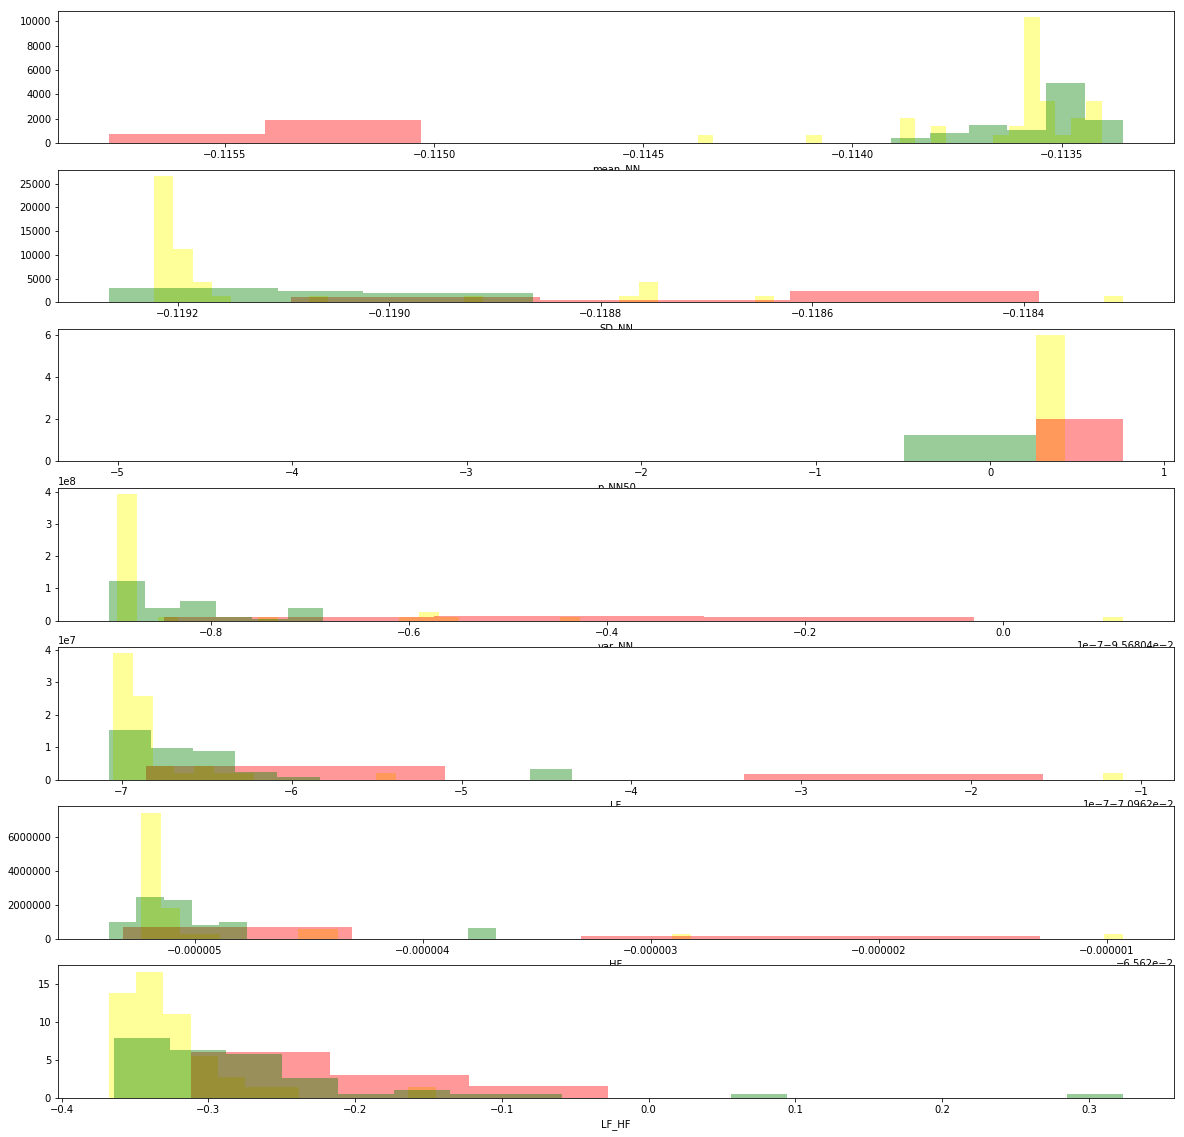

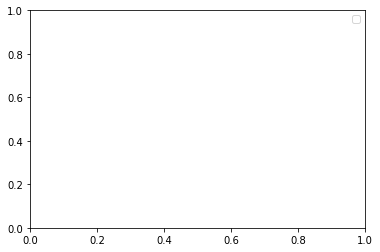

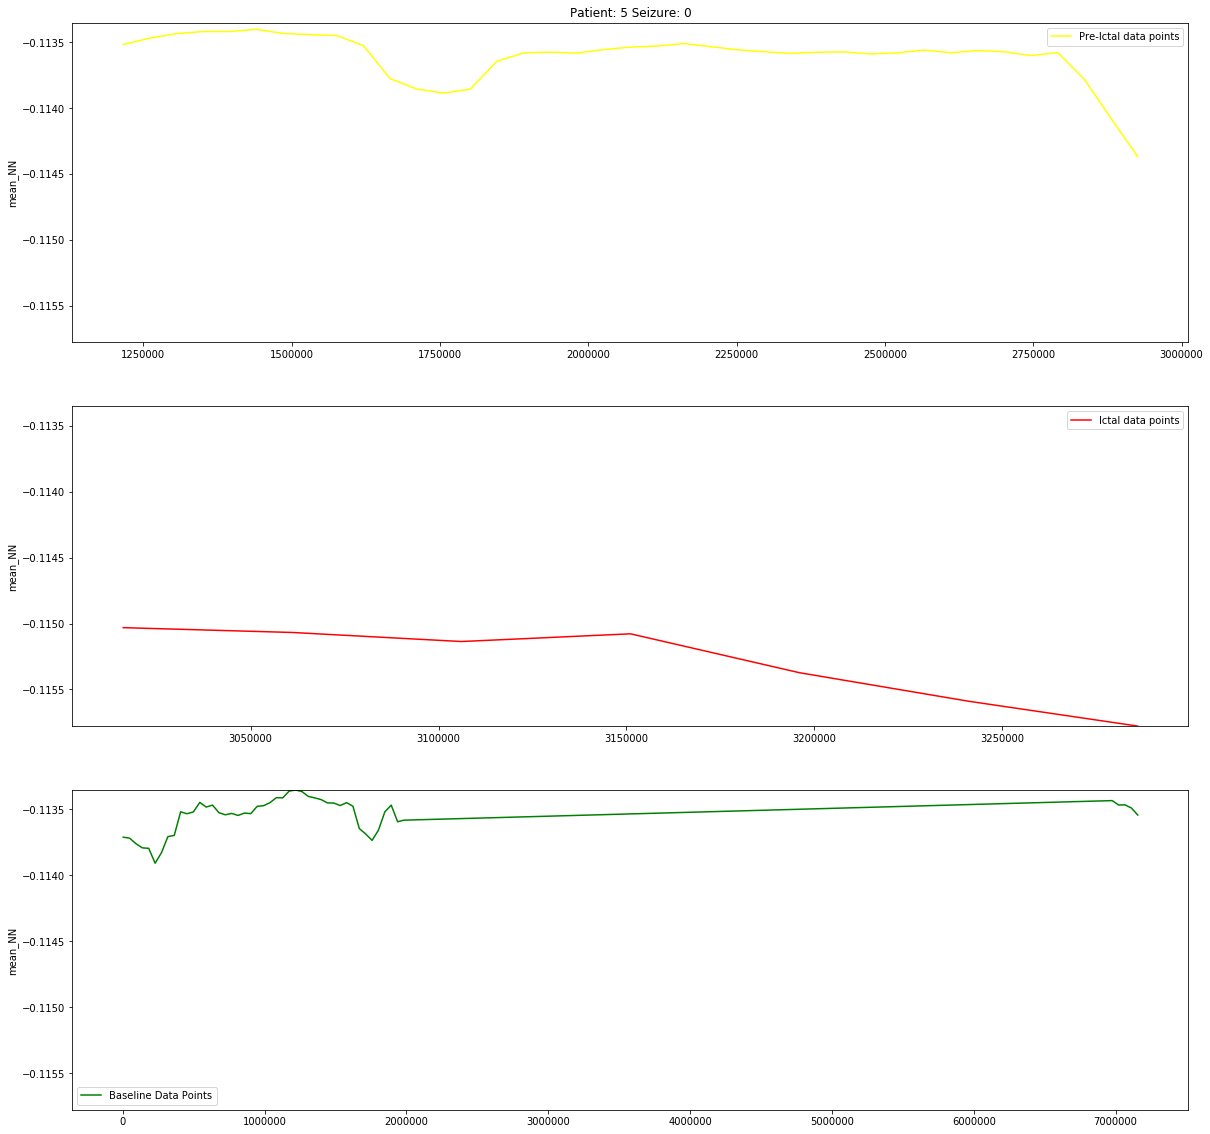

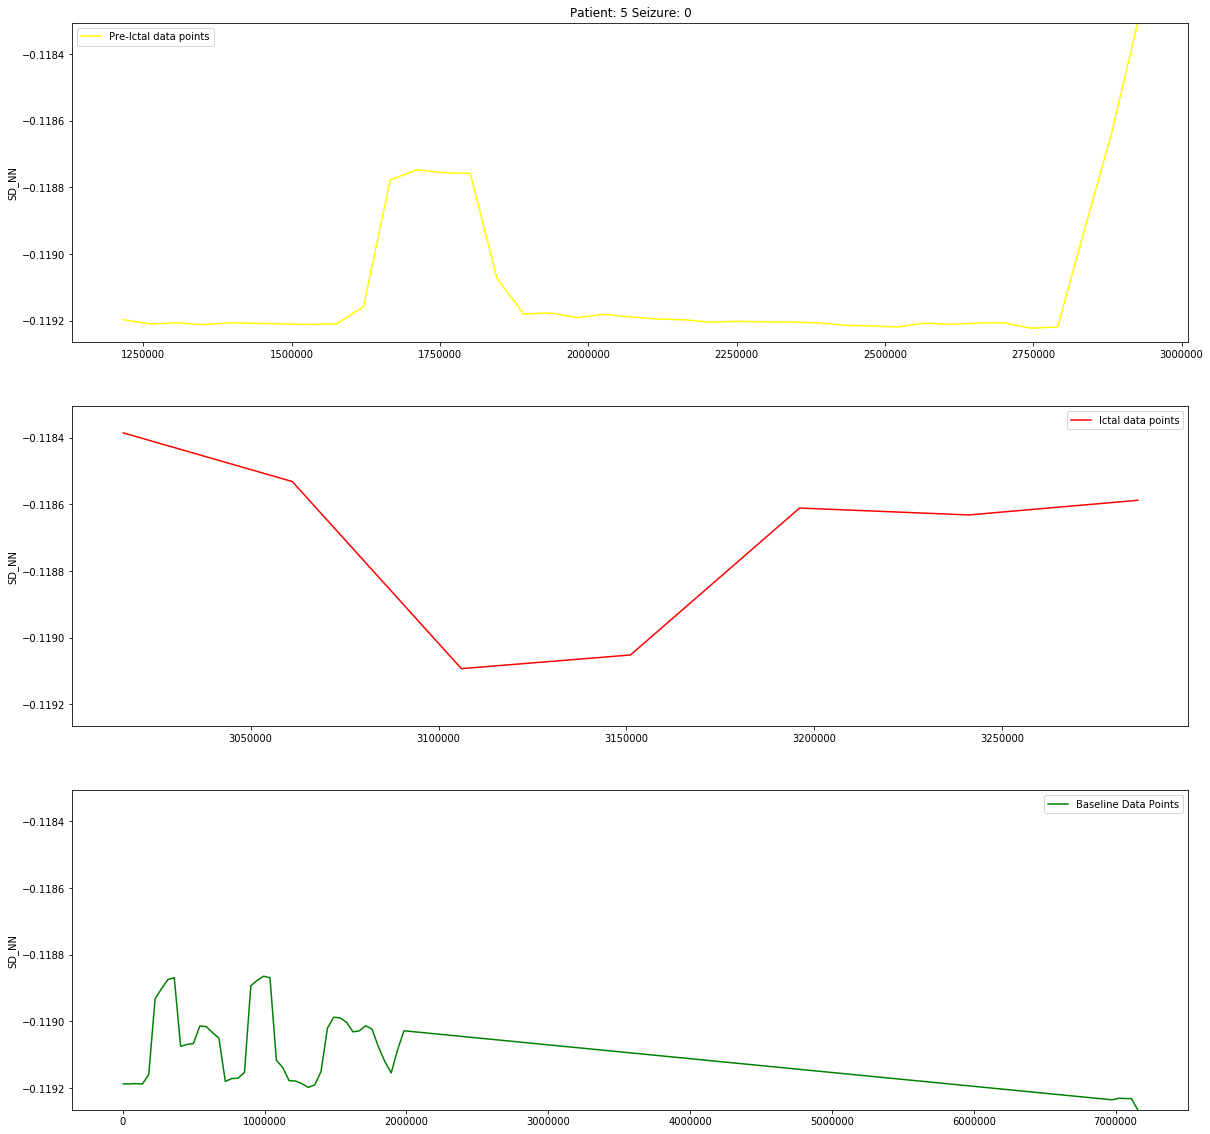

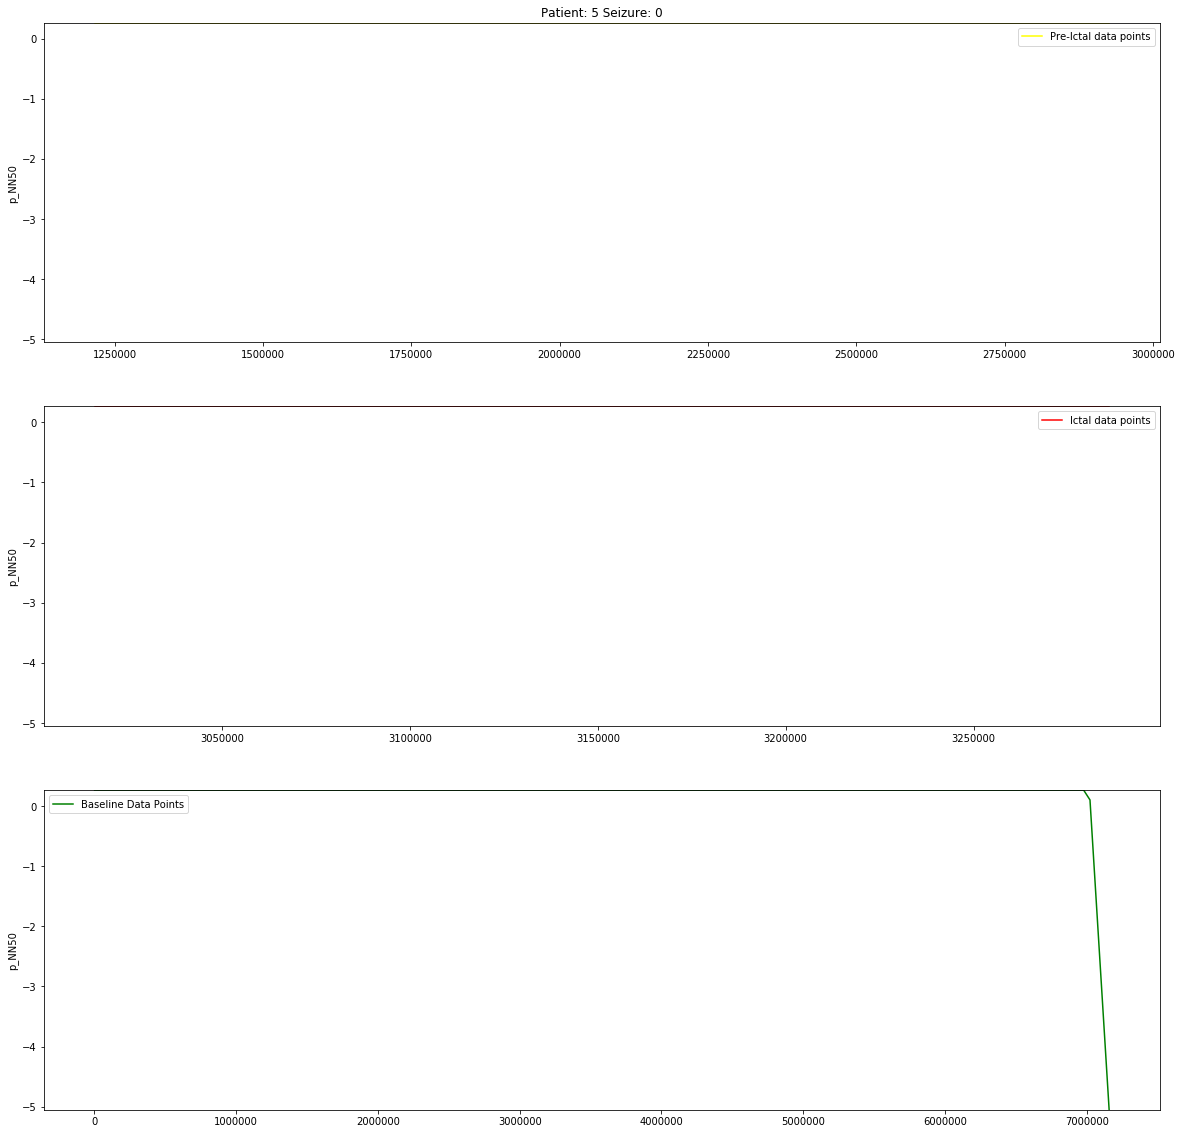

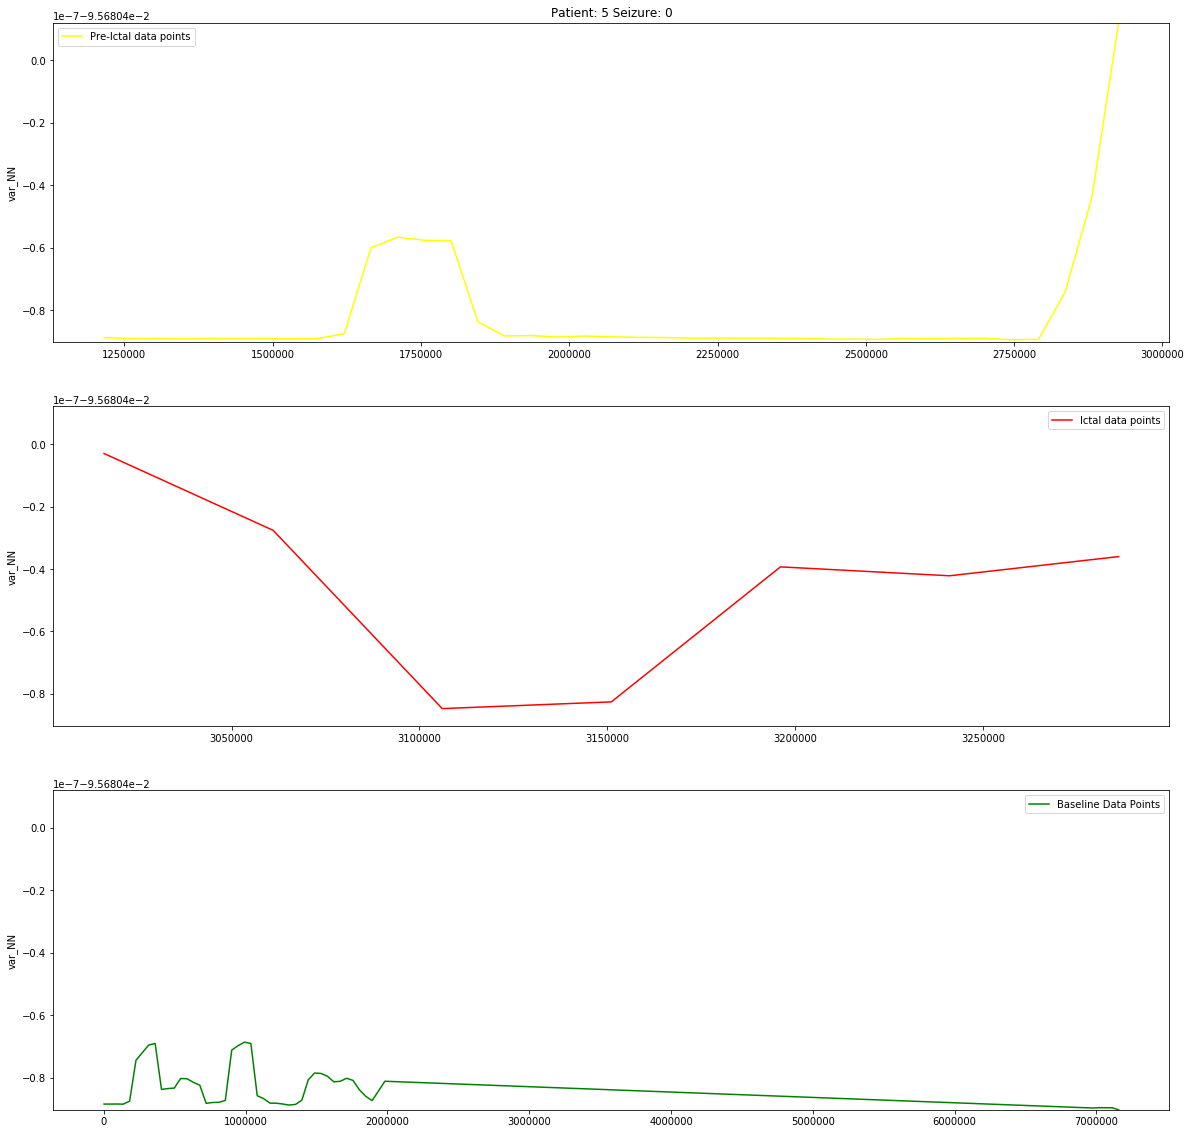

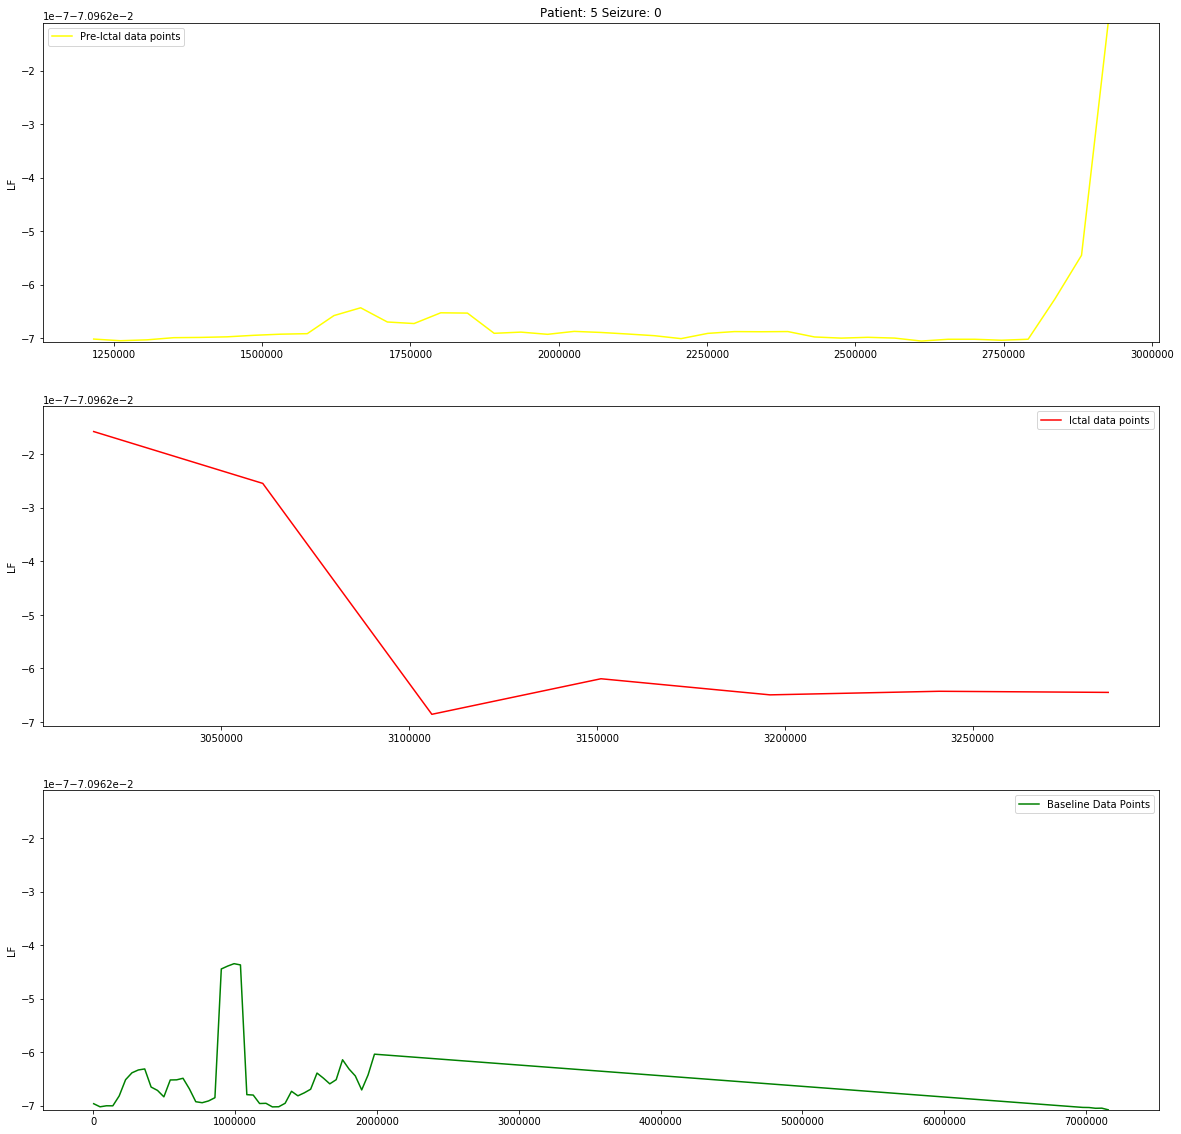

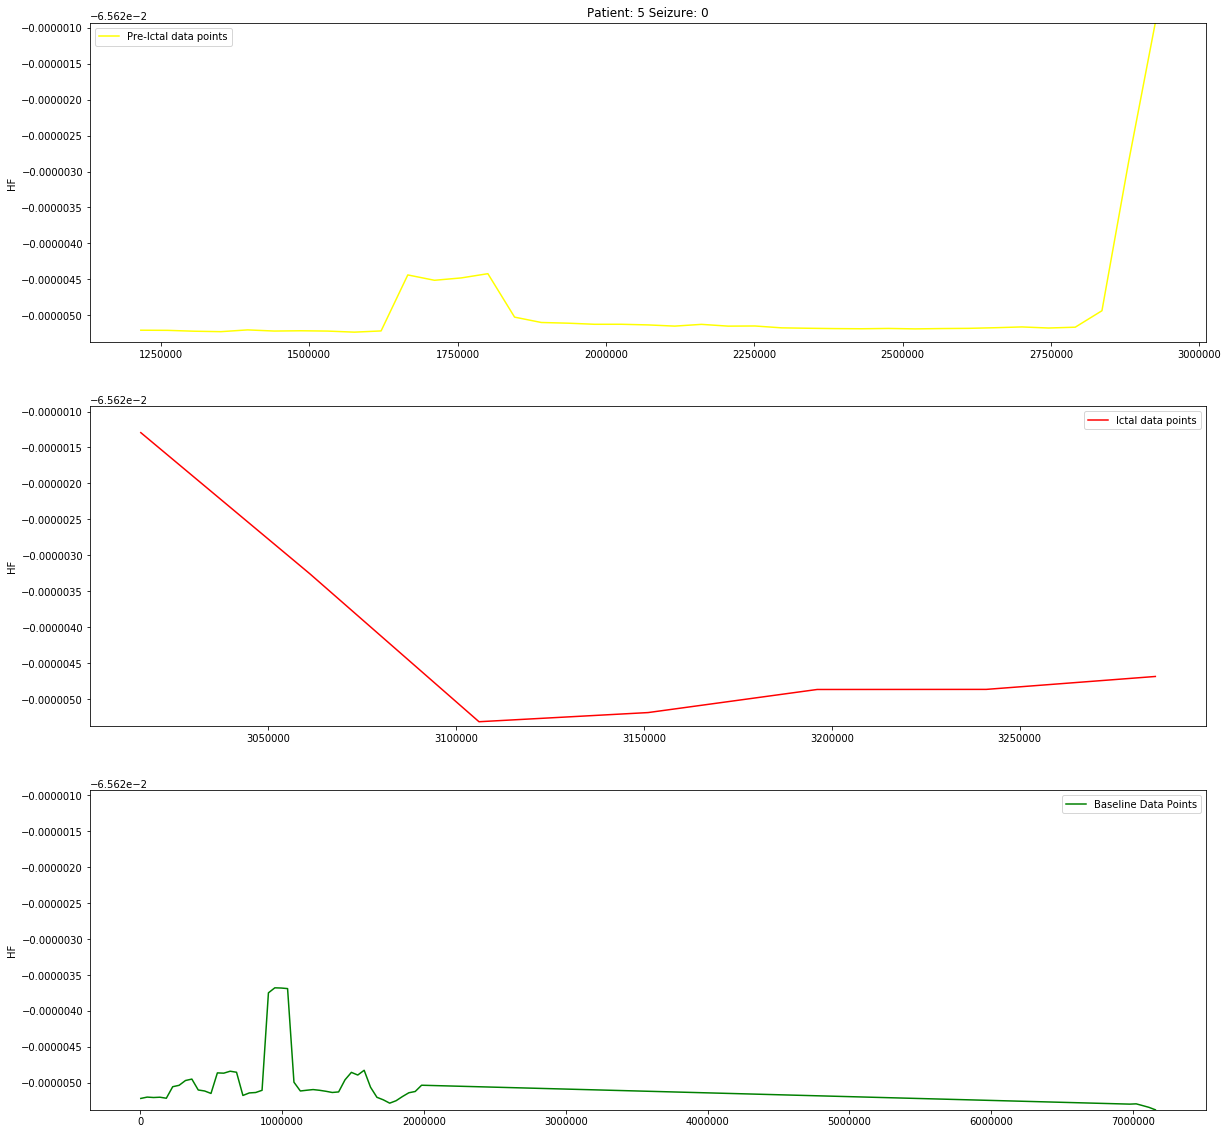

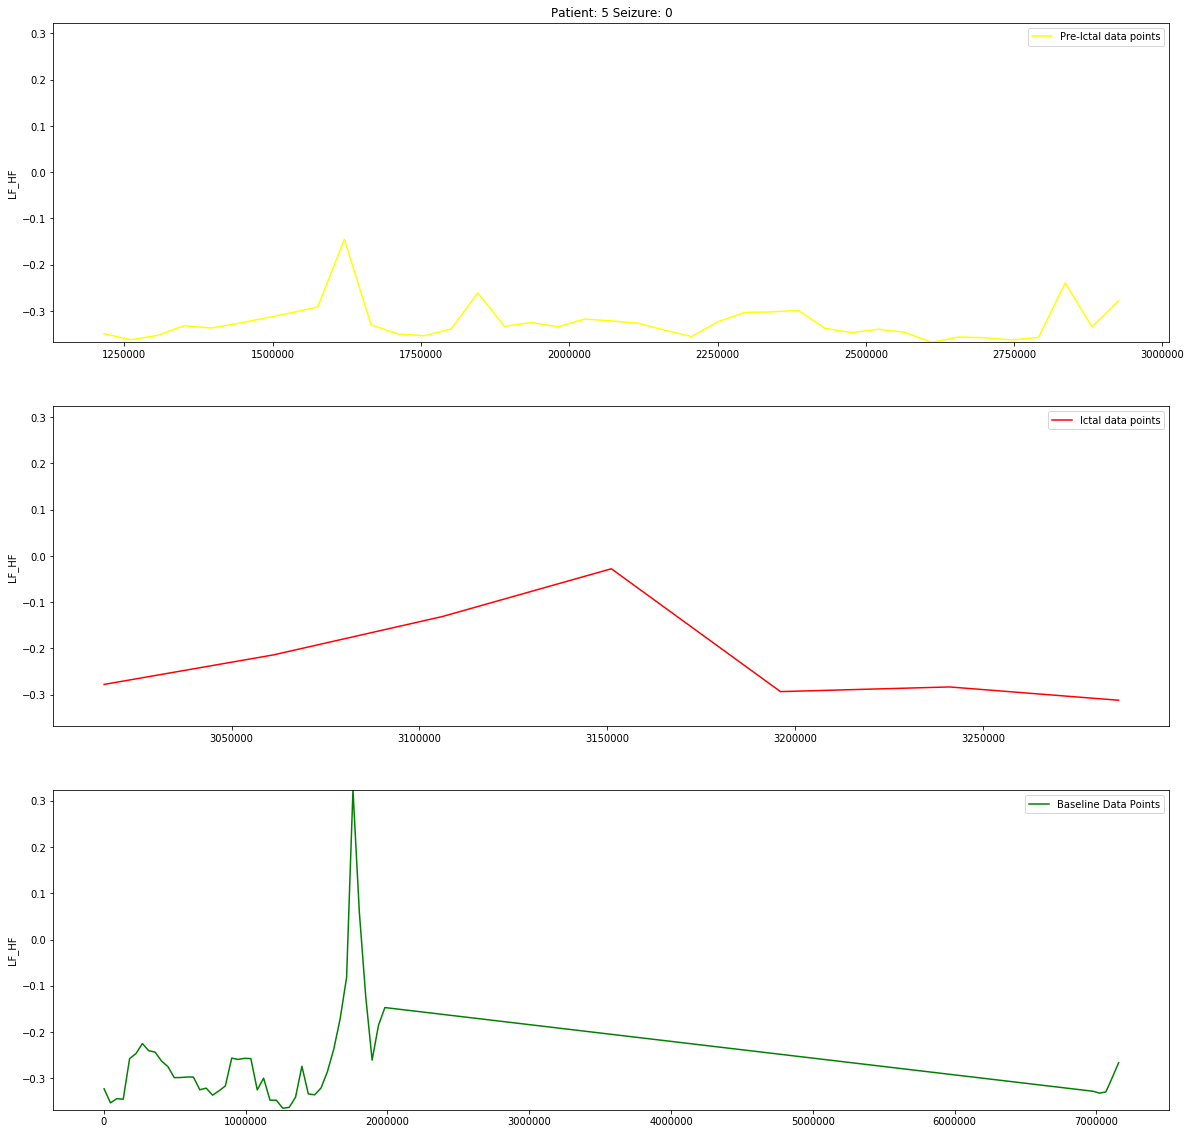

classification/eda/andrews.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[label_id] = grouped_df[label_id]


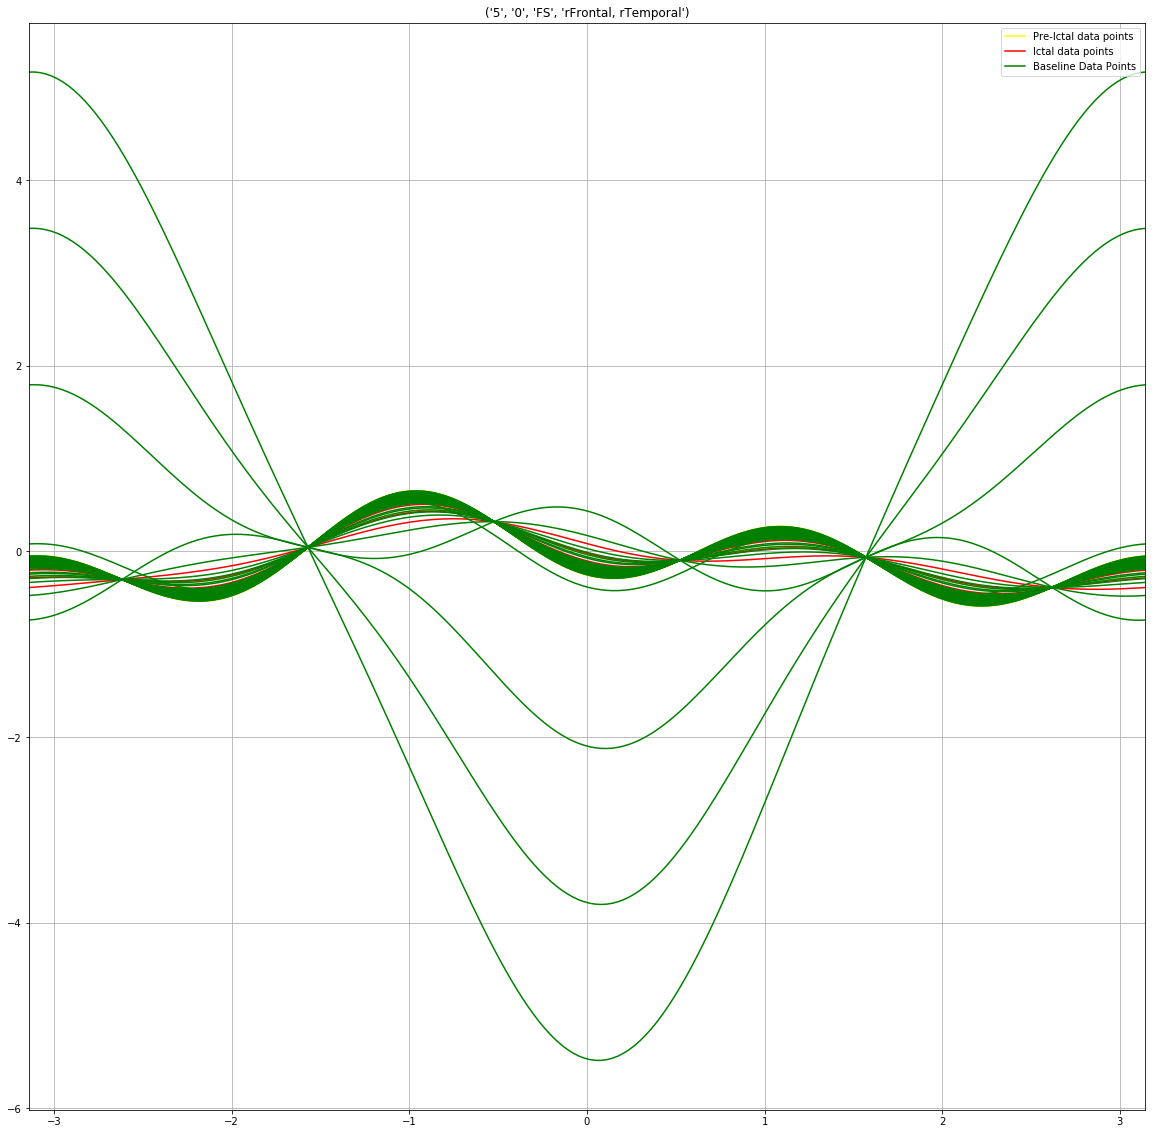

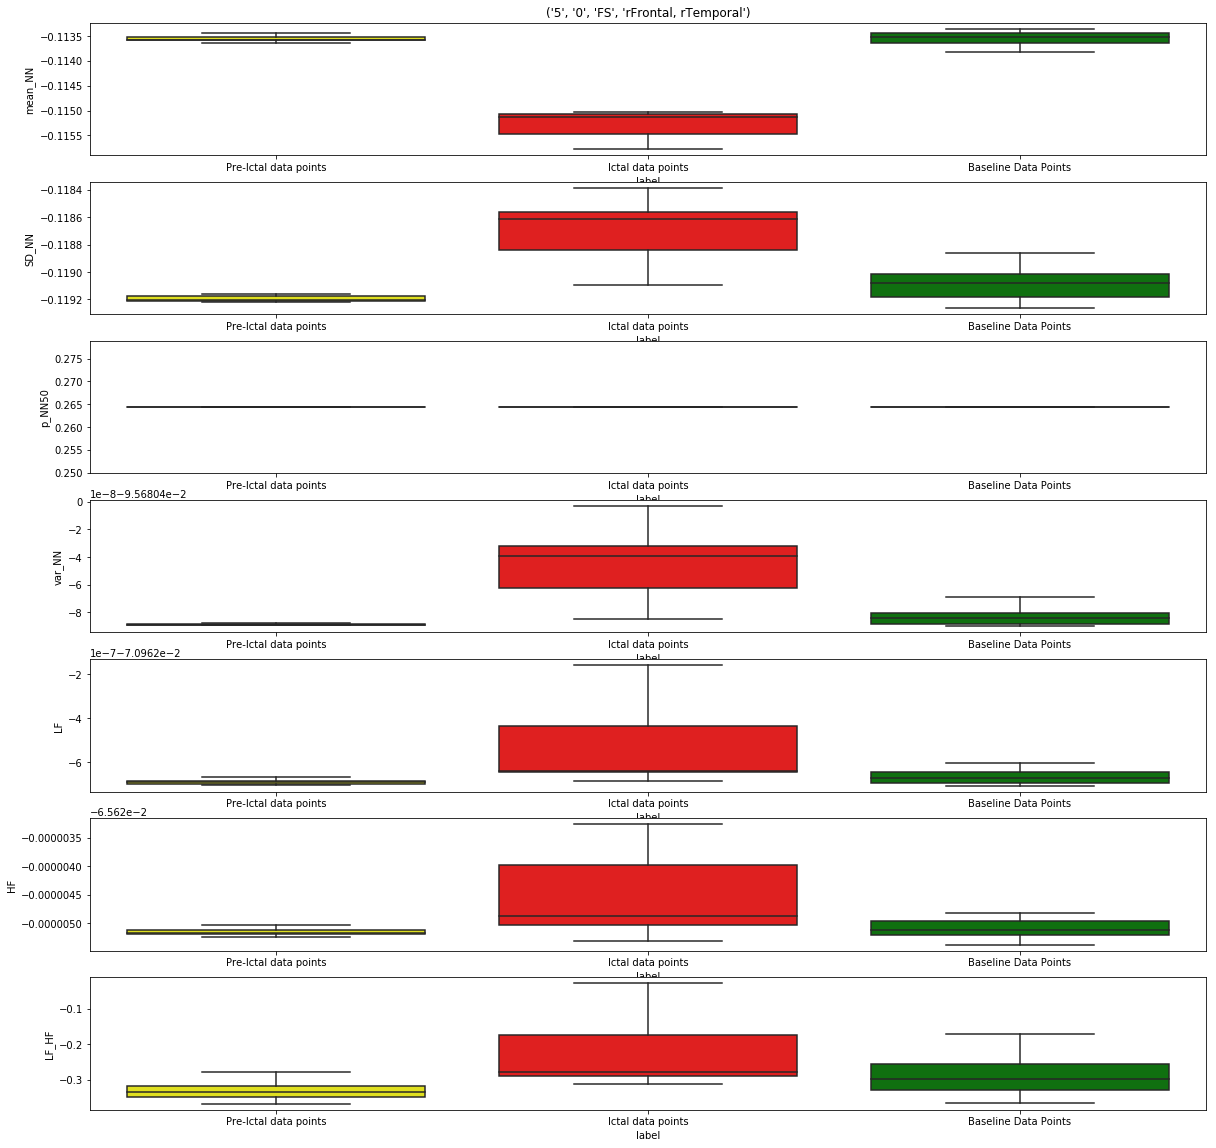

classification/eda/scatter.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[label_id] = grouped_df[label_id]


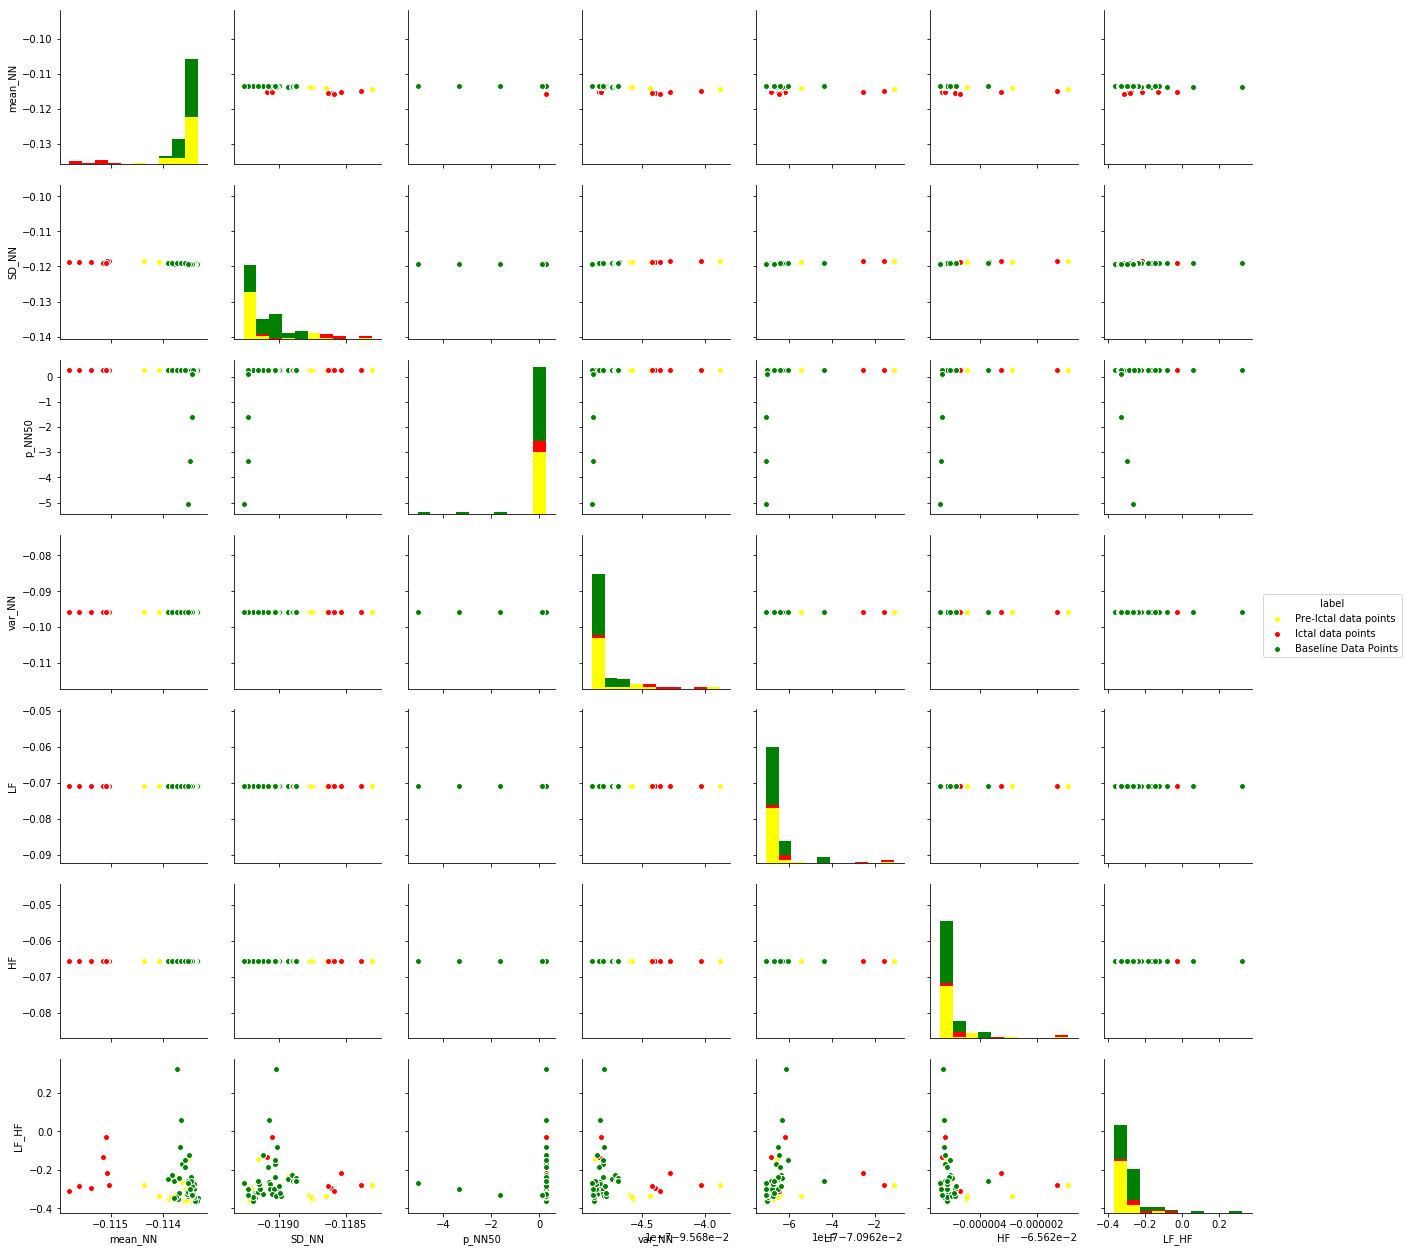

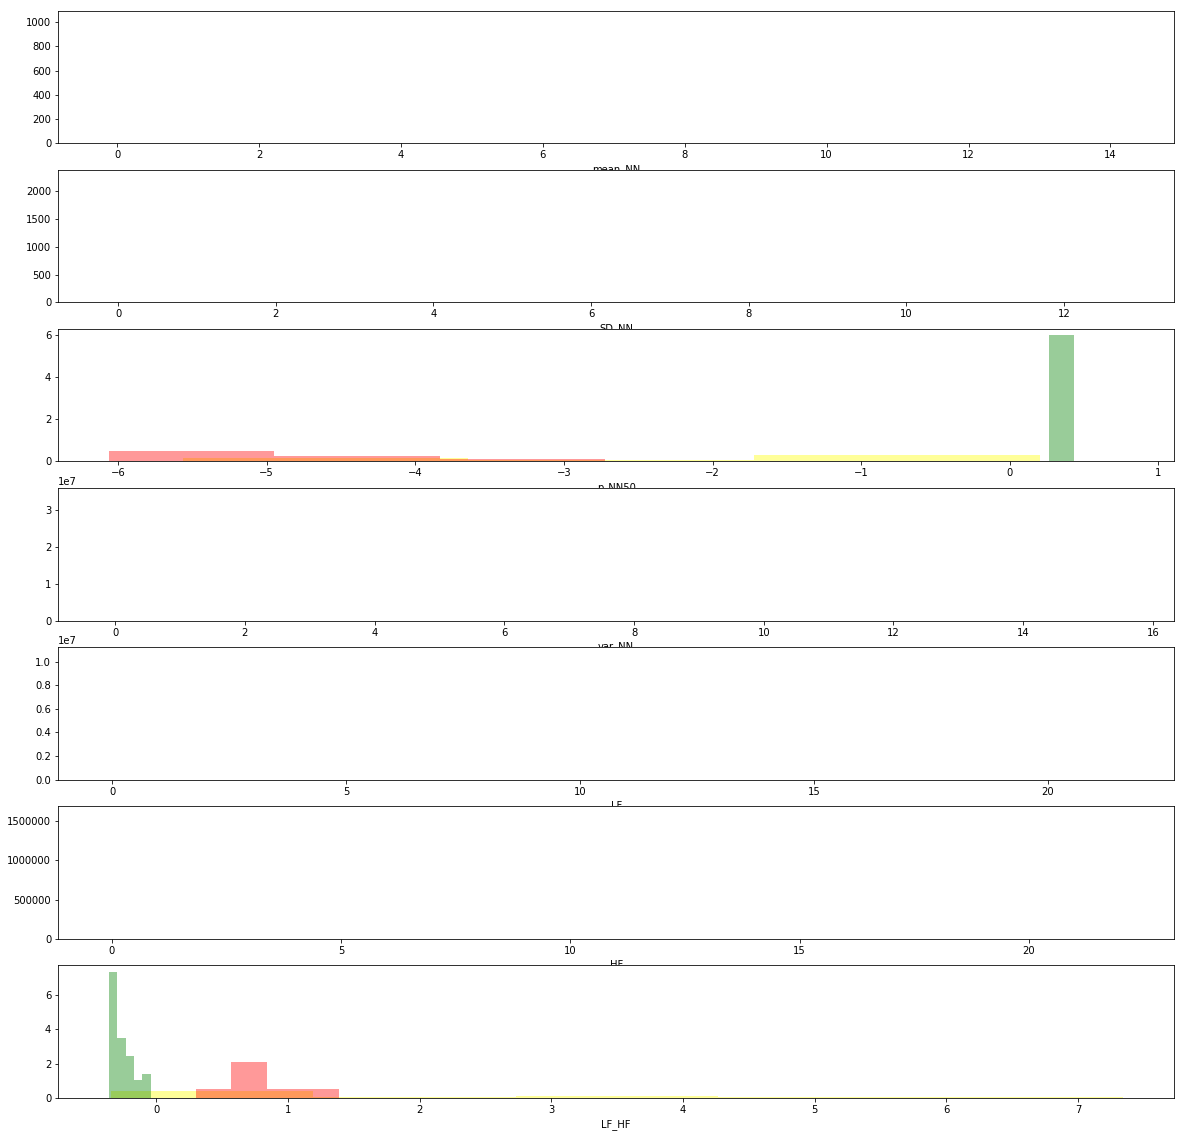

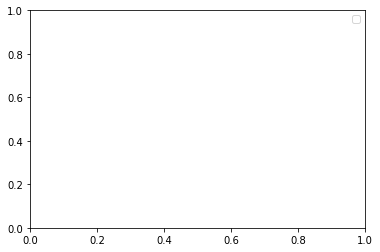

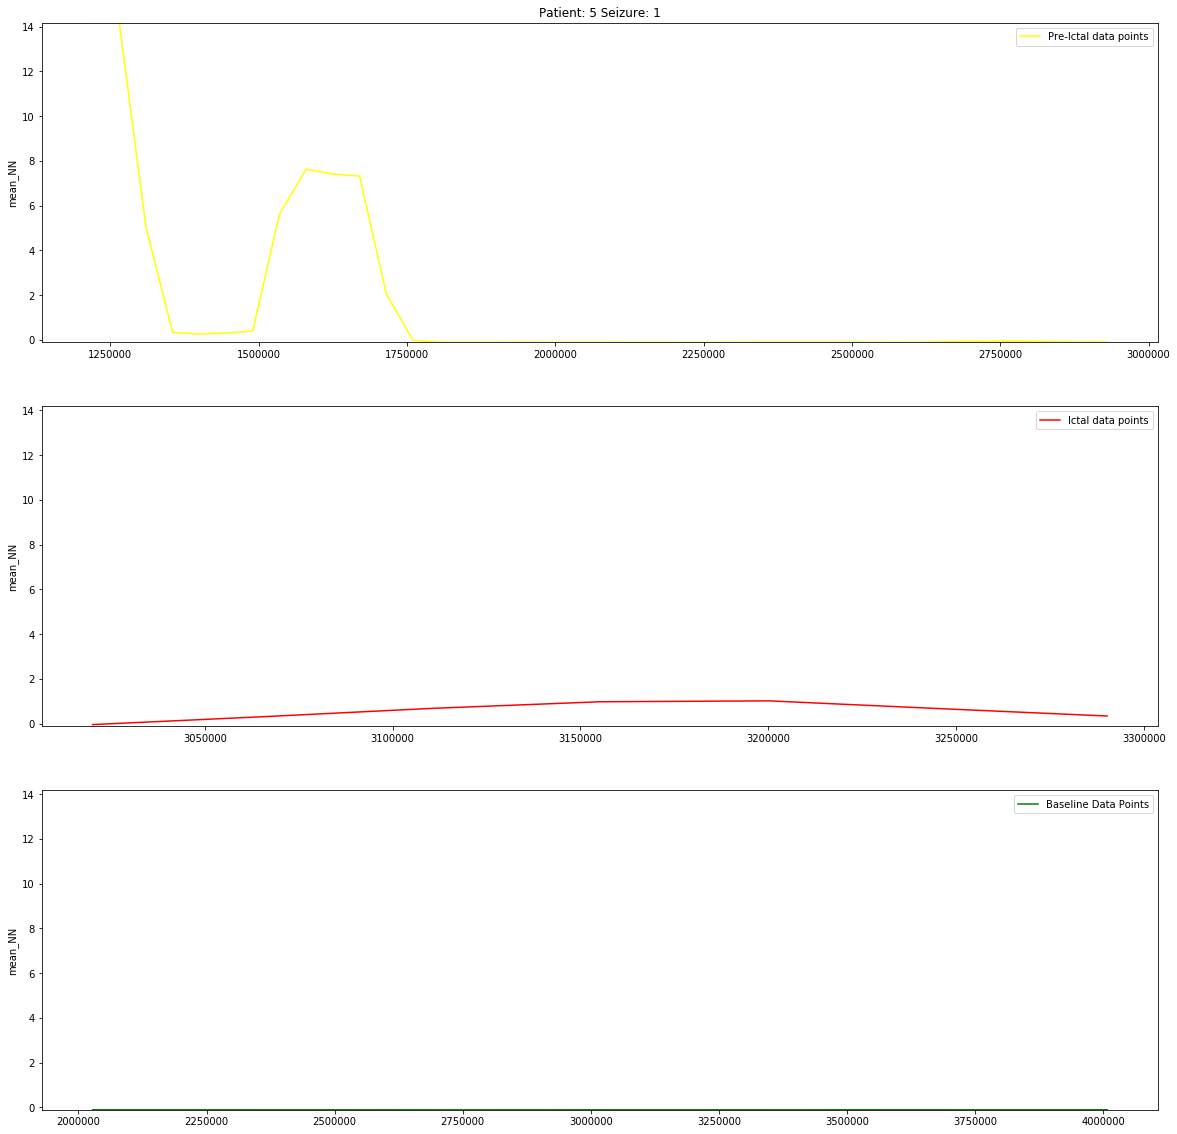

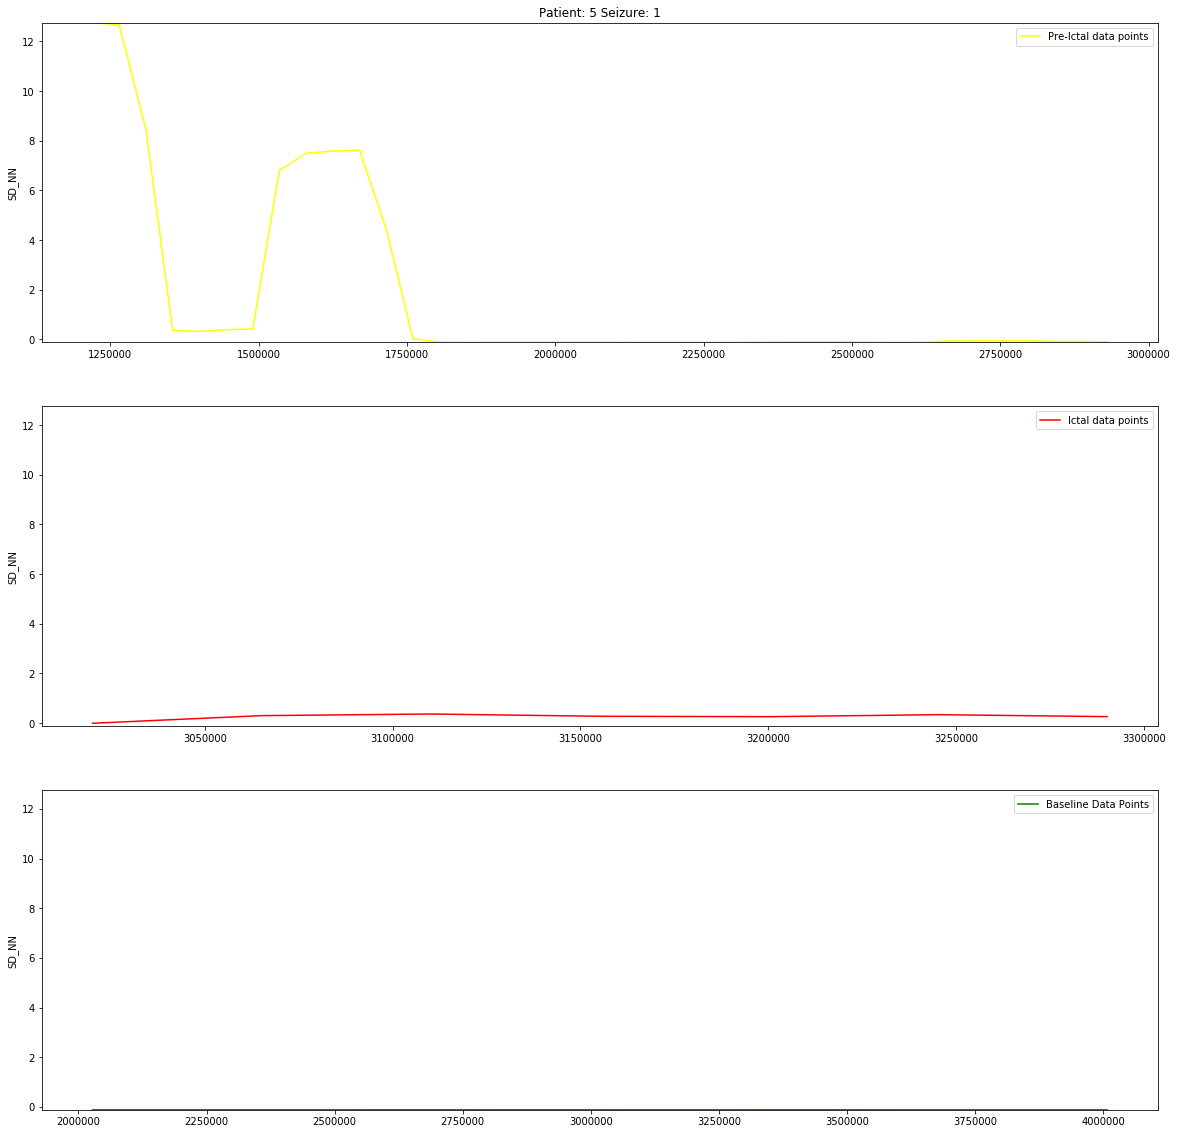

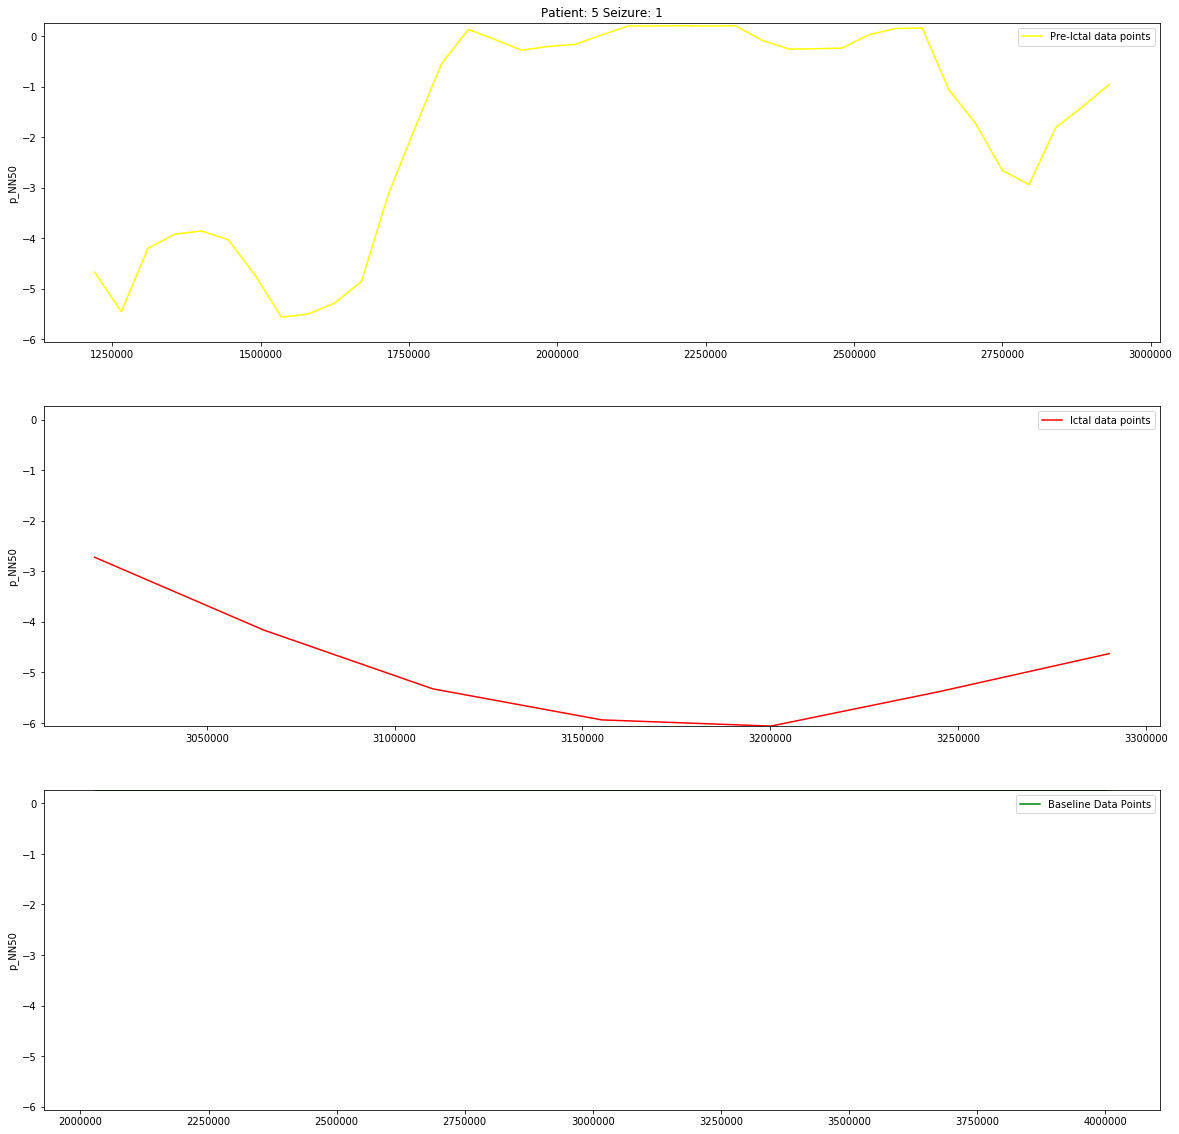

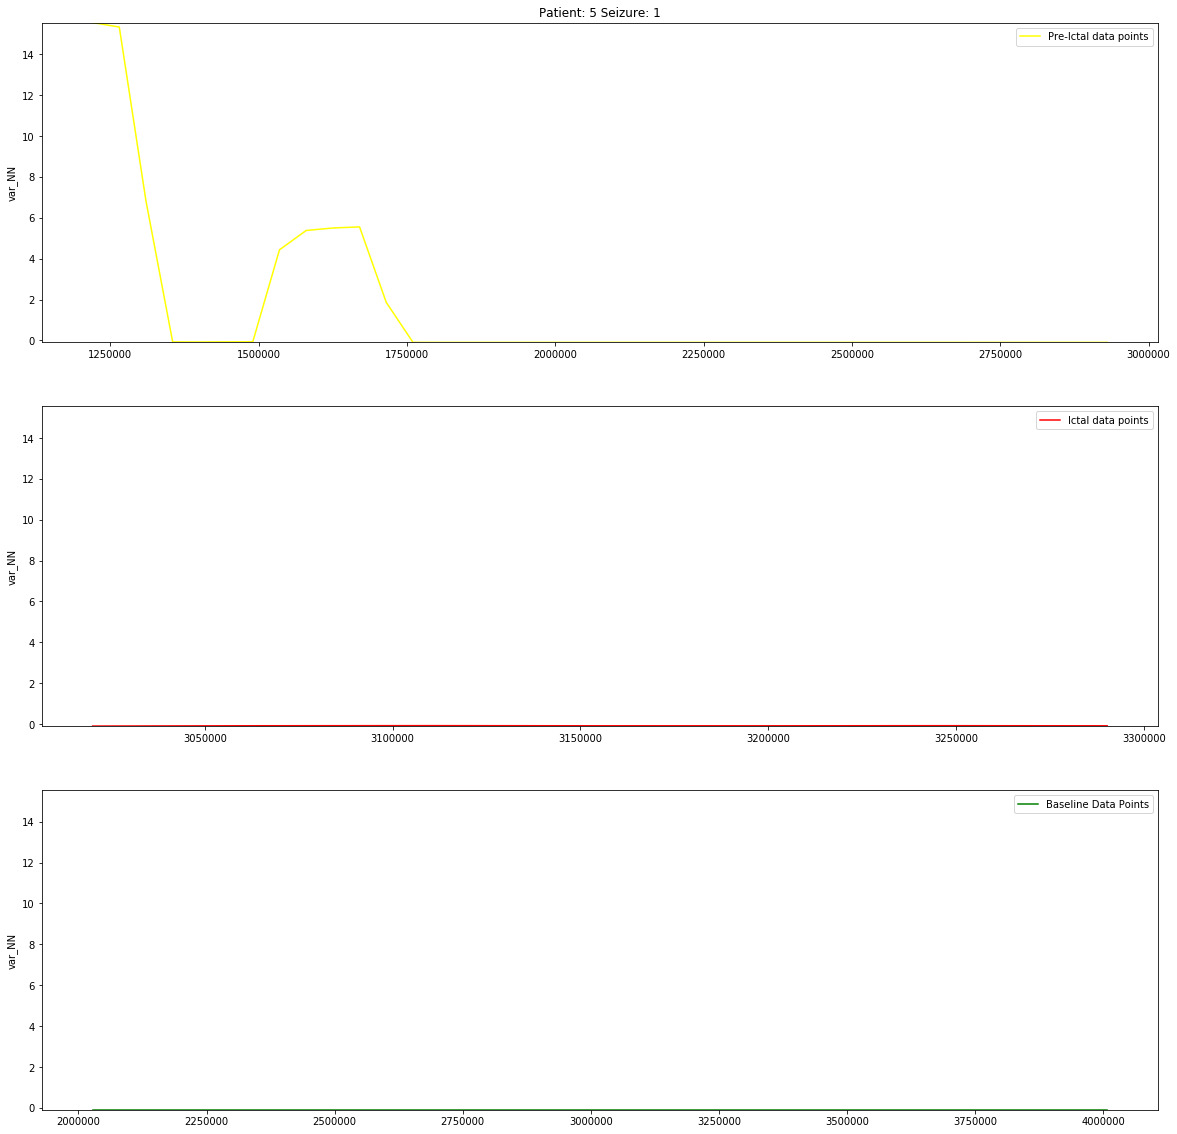

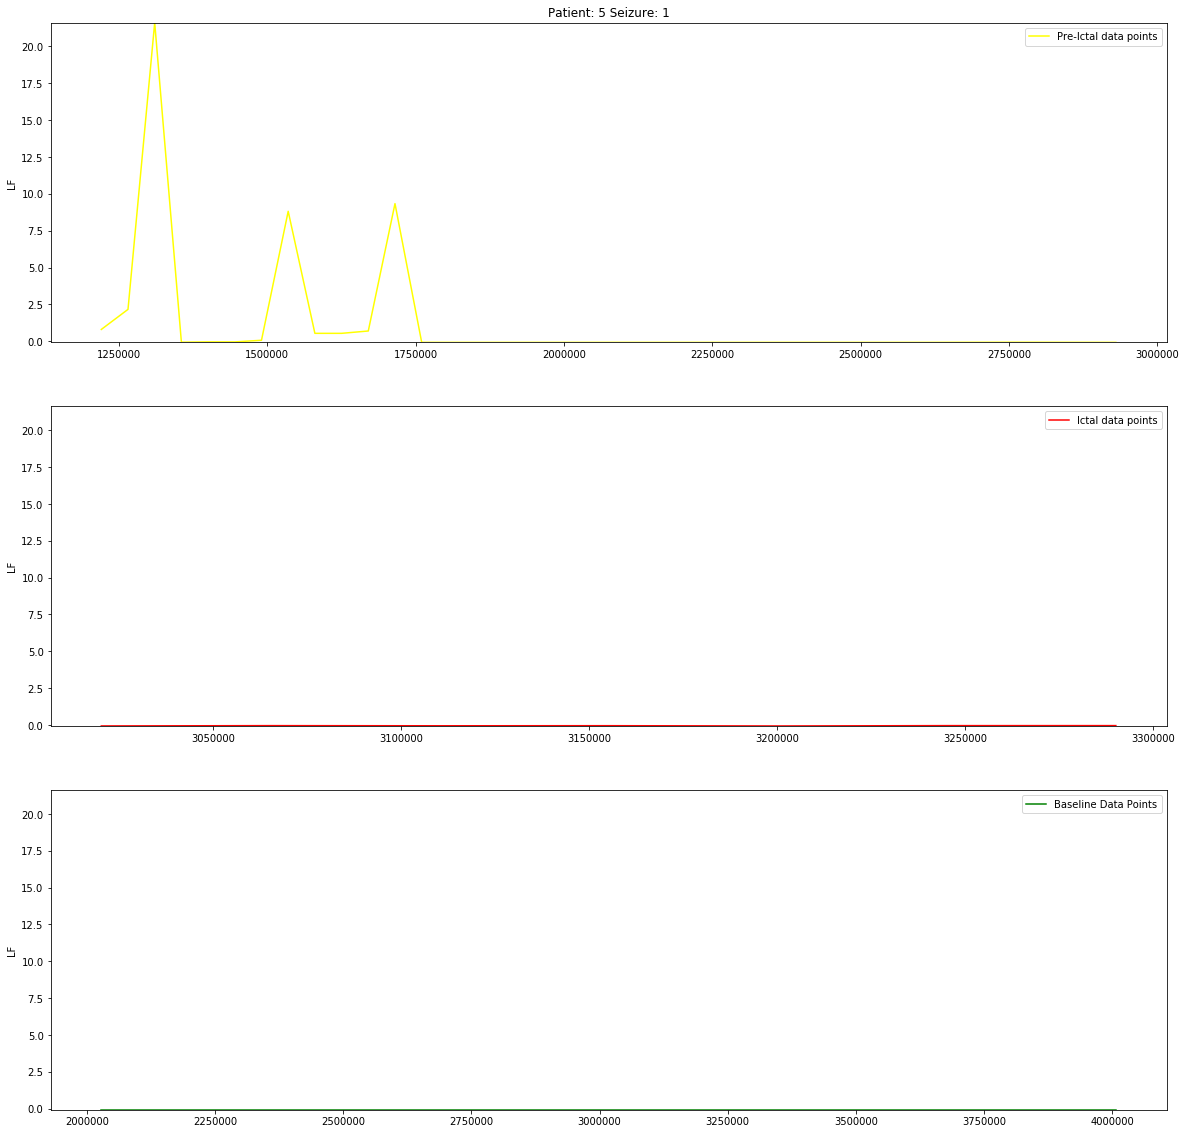

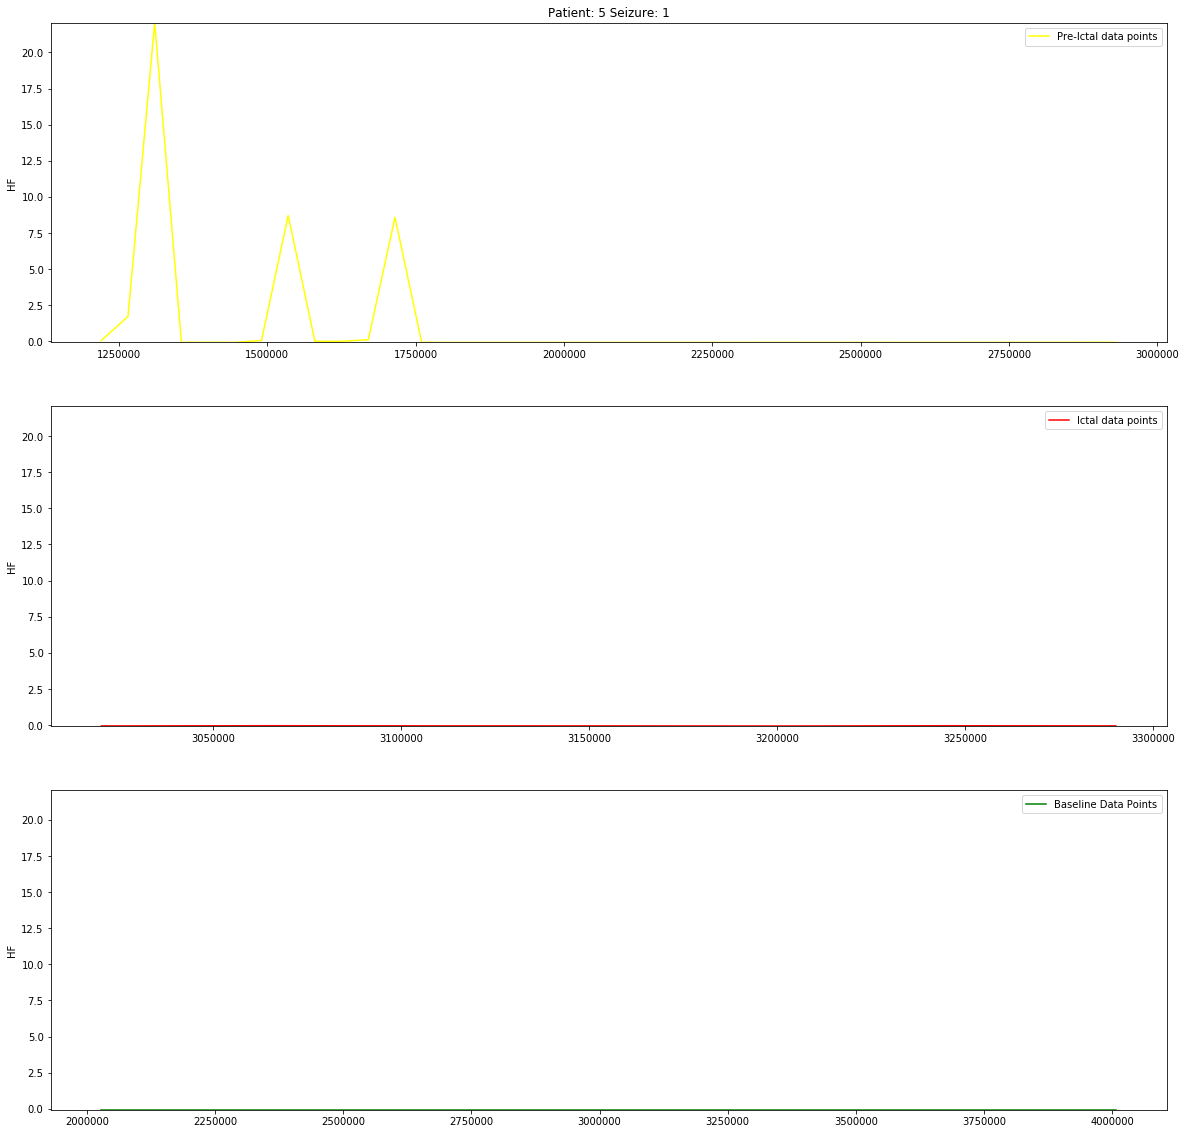

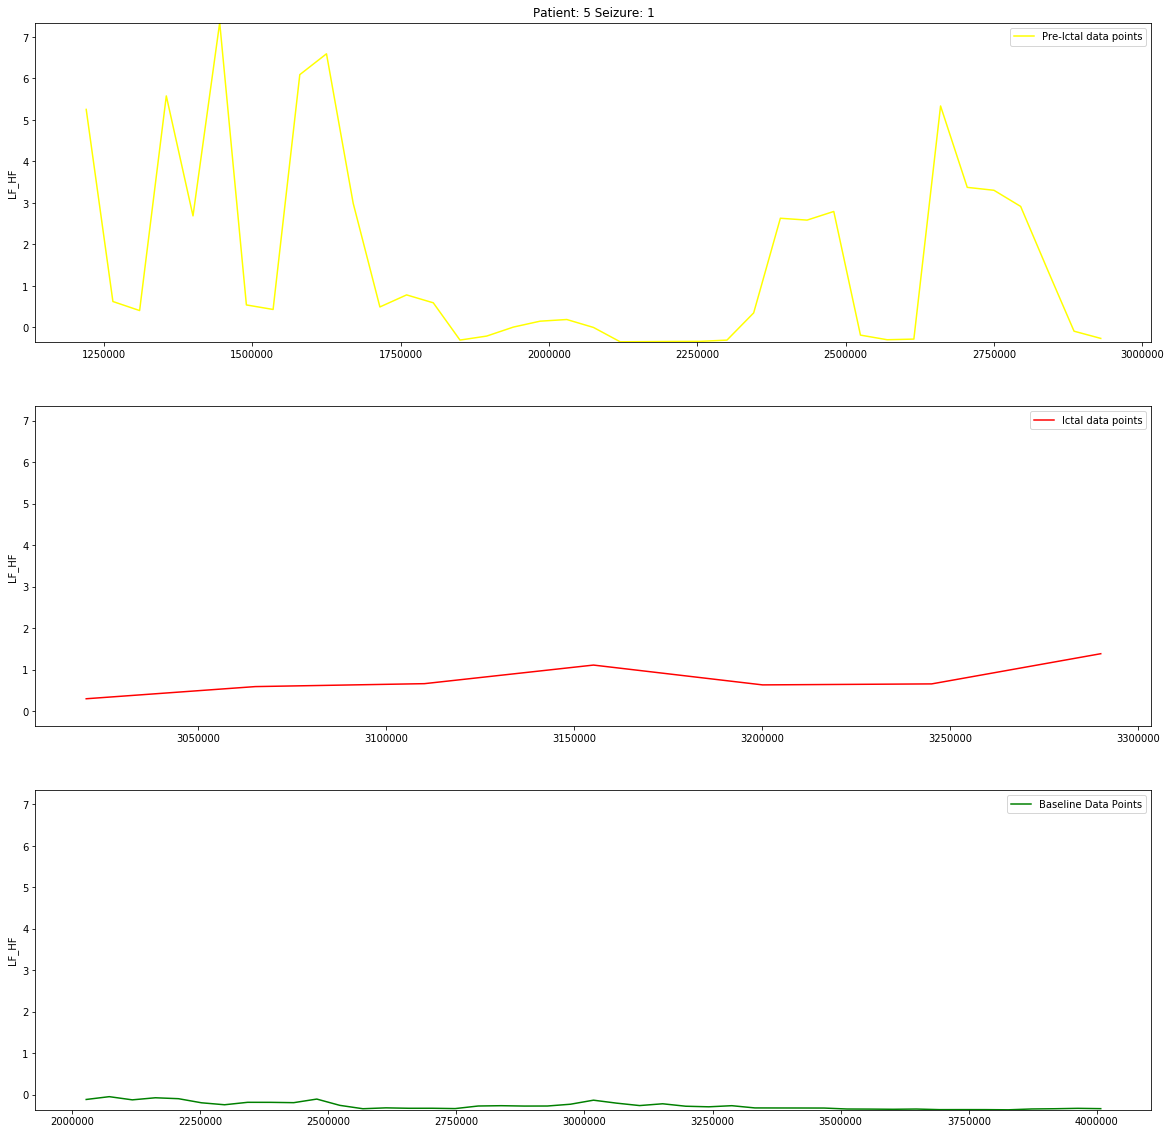

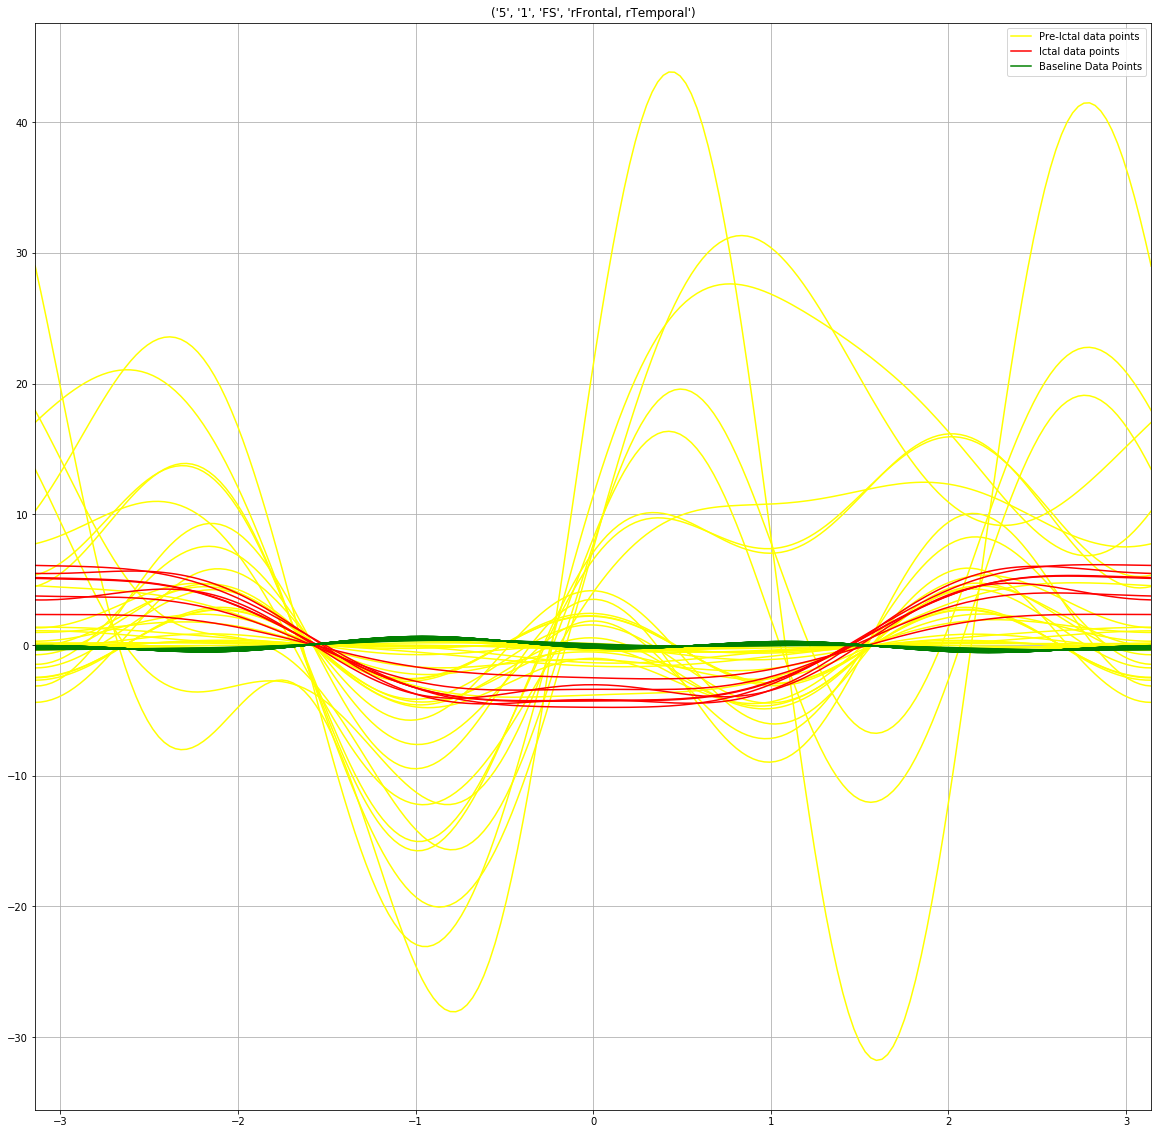

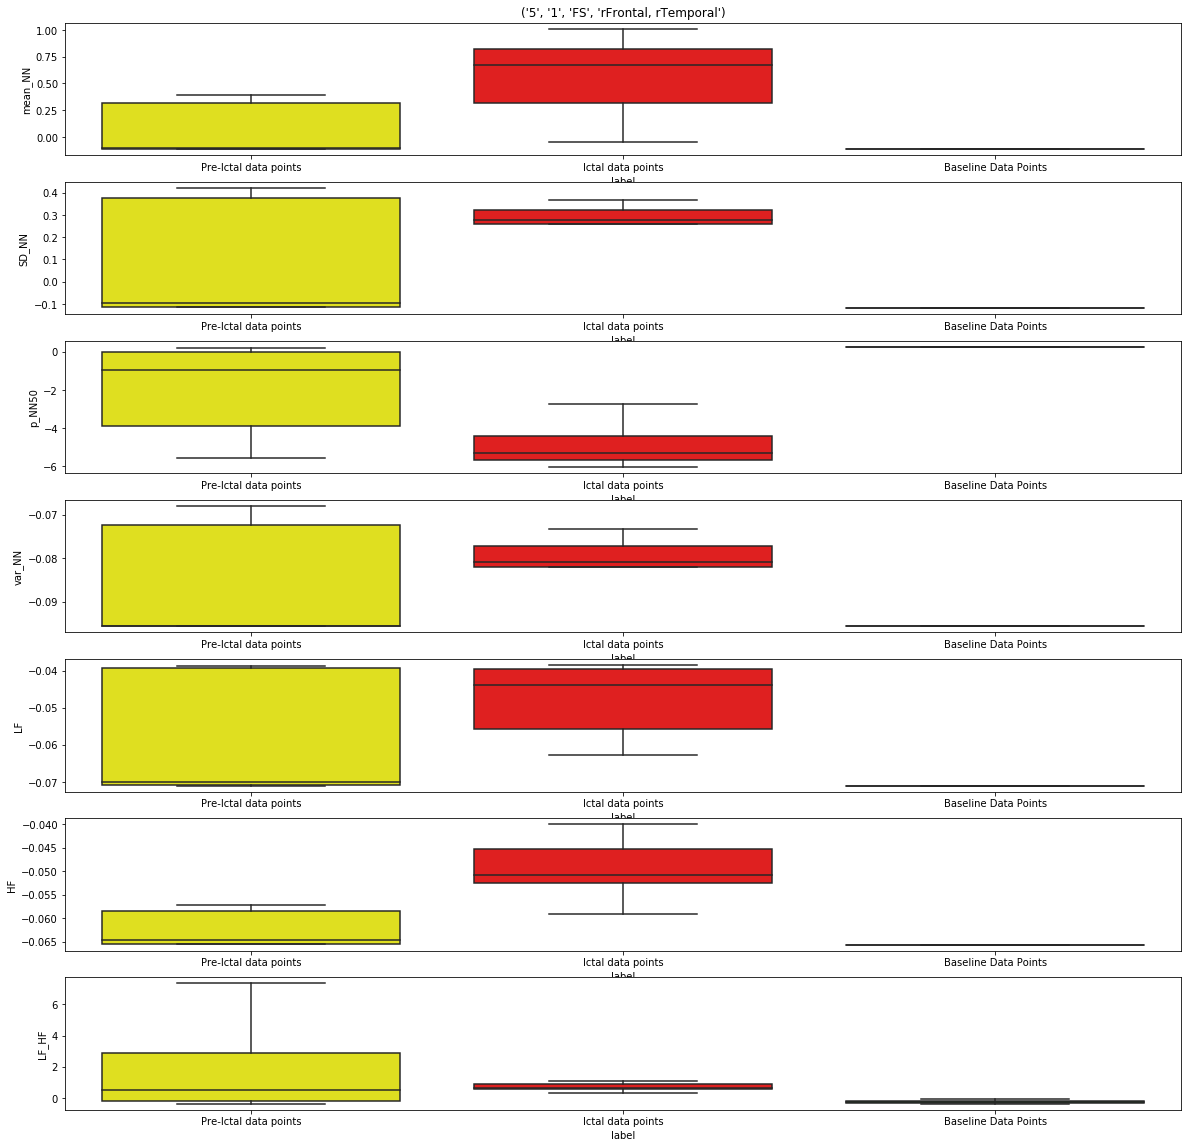

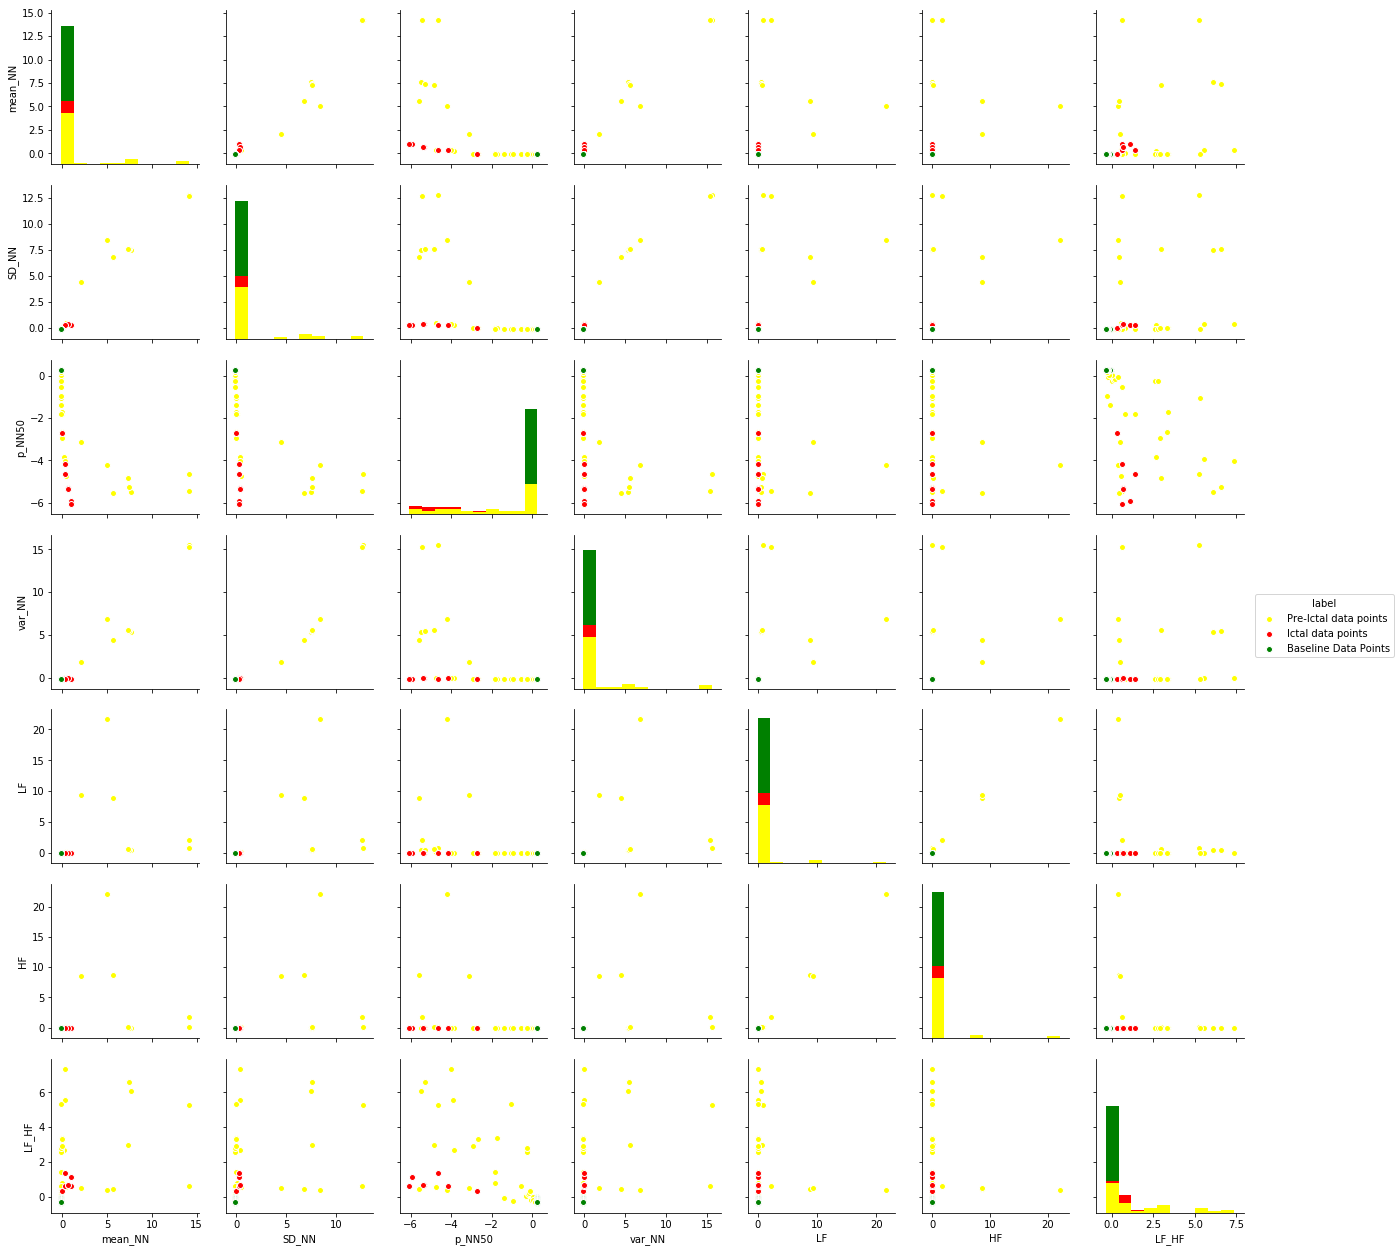

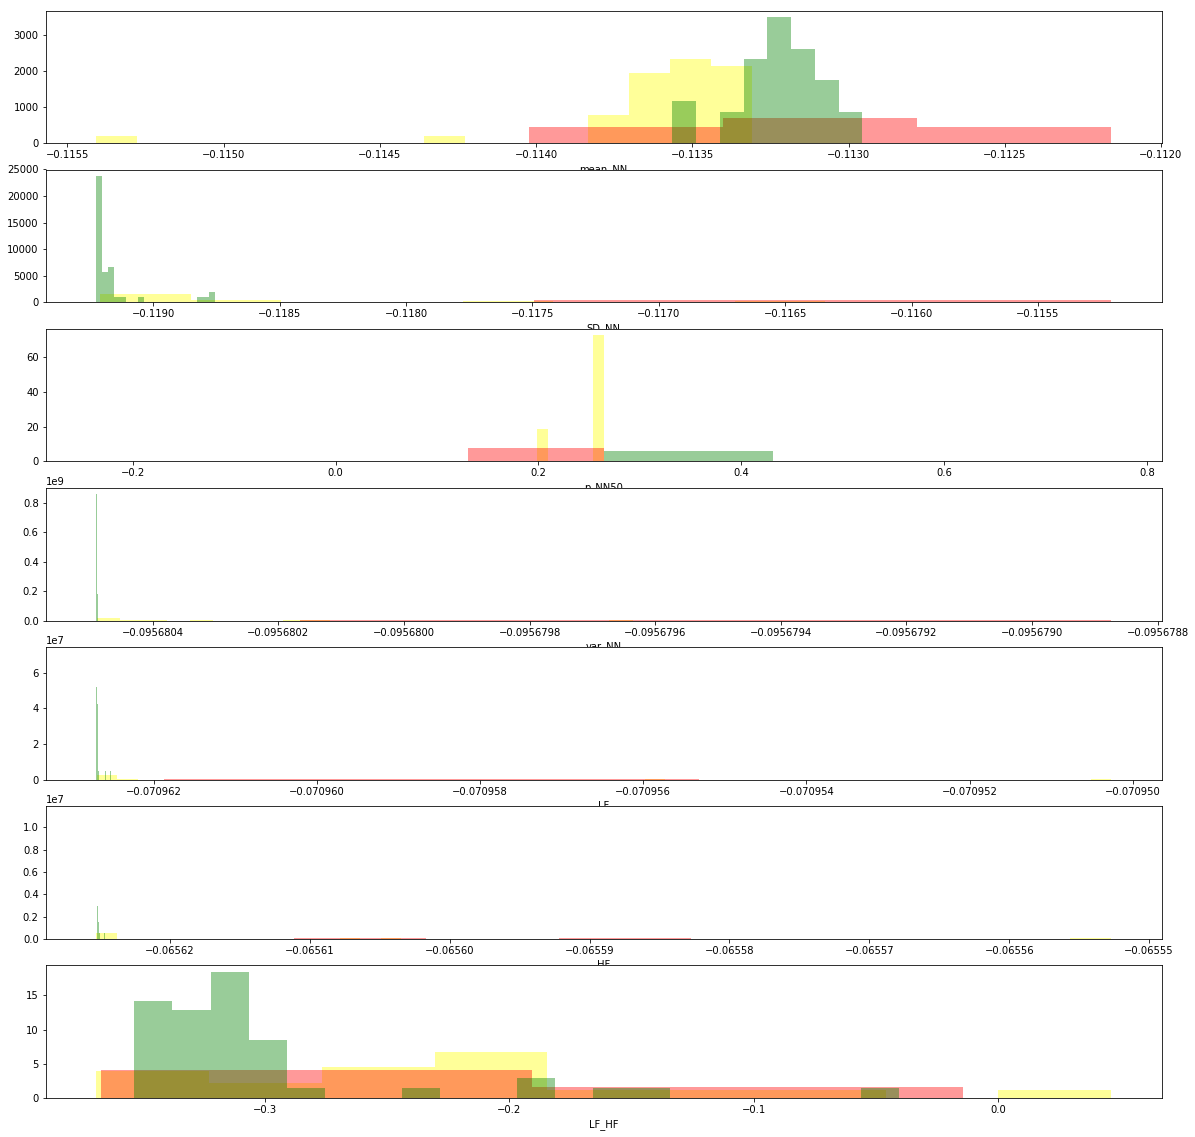

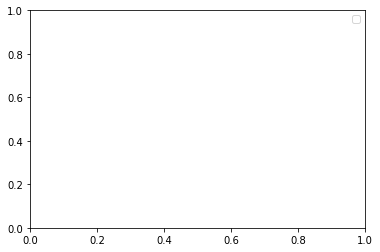

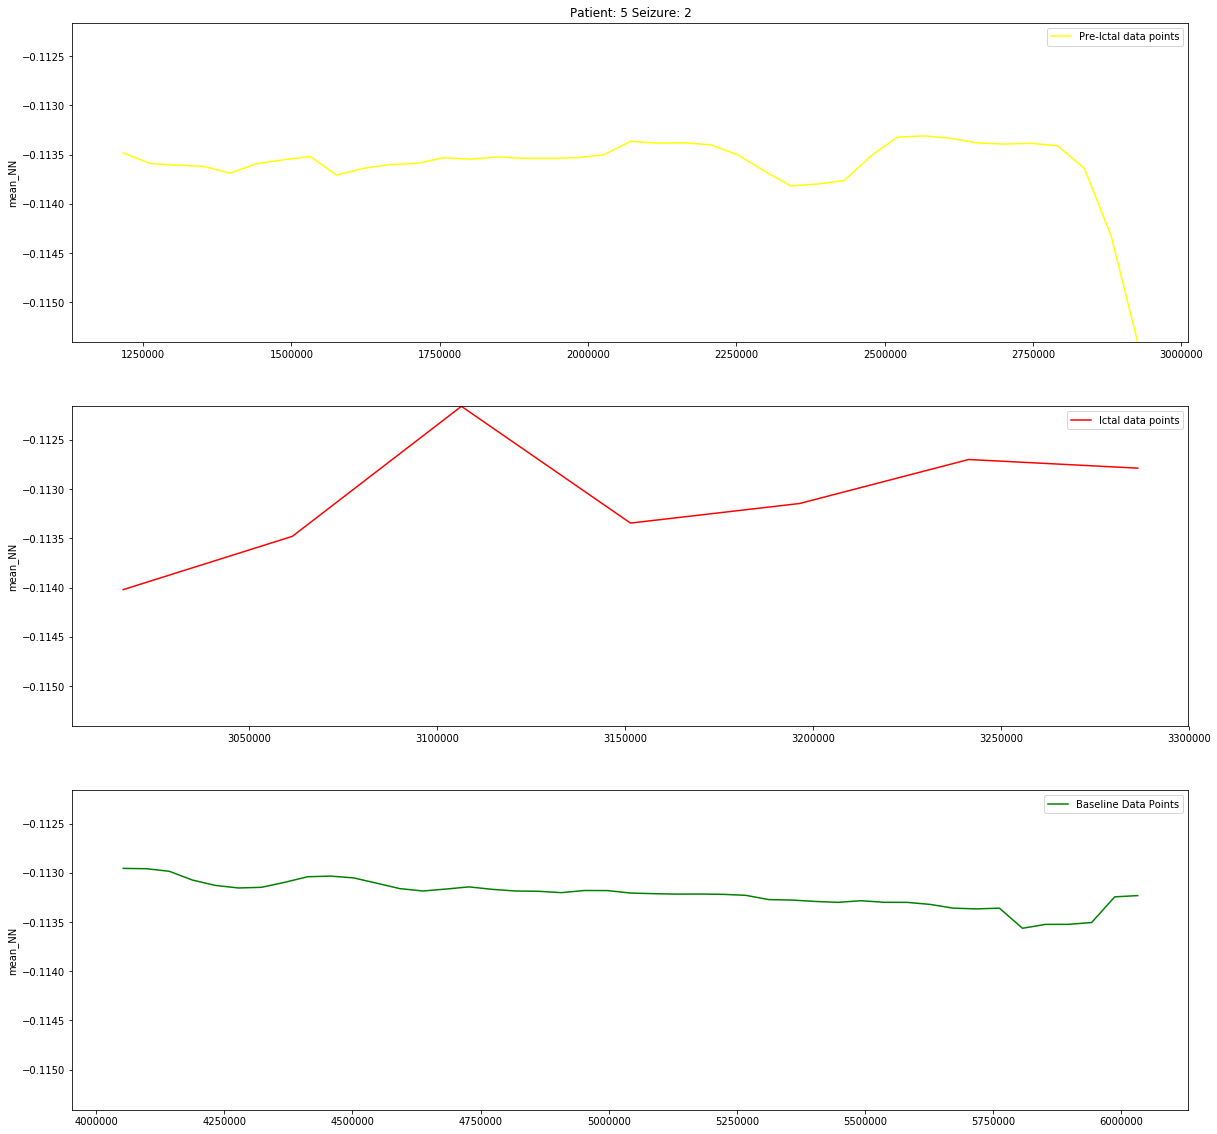

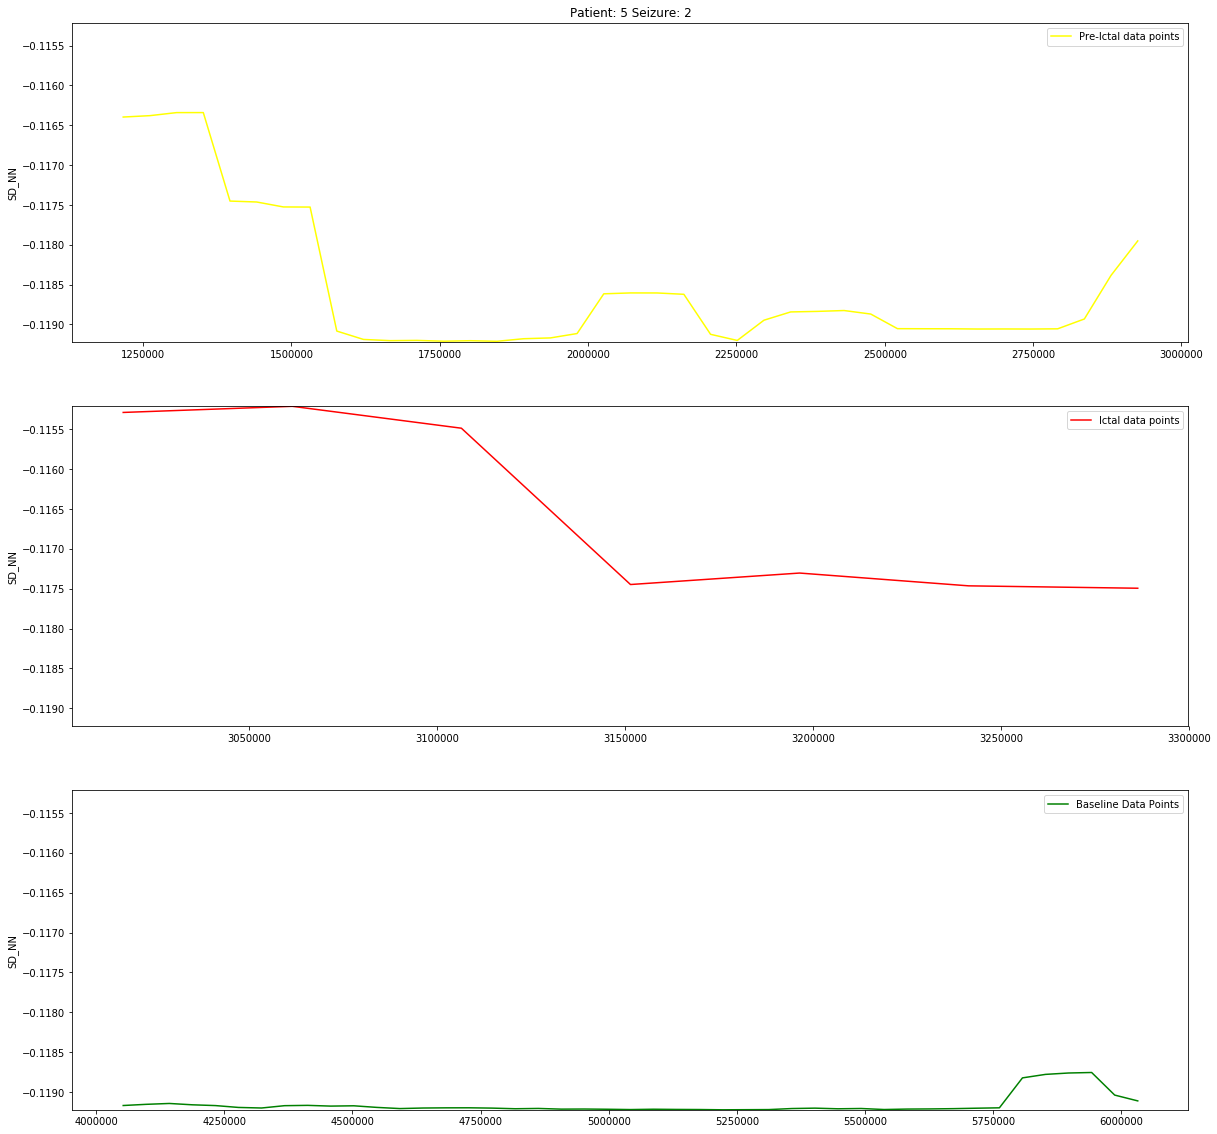

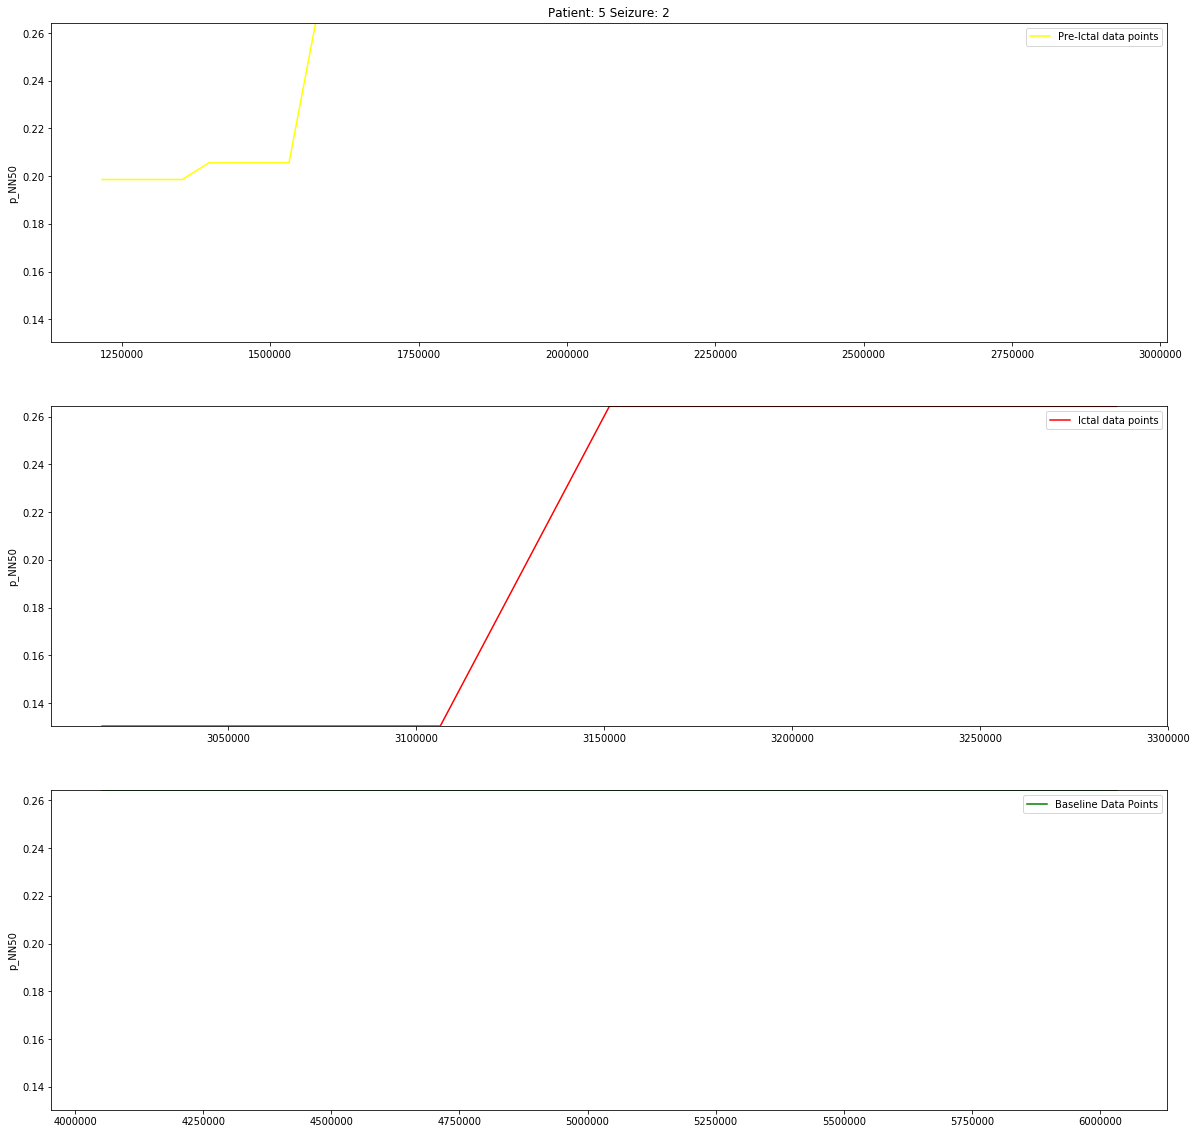

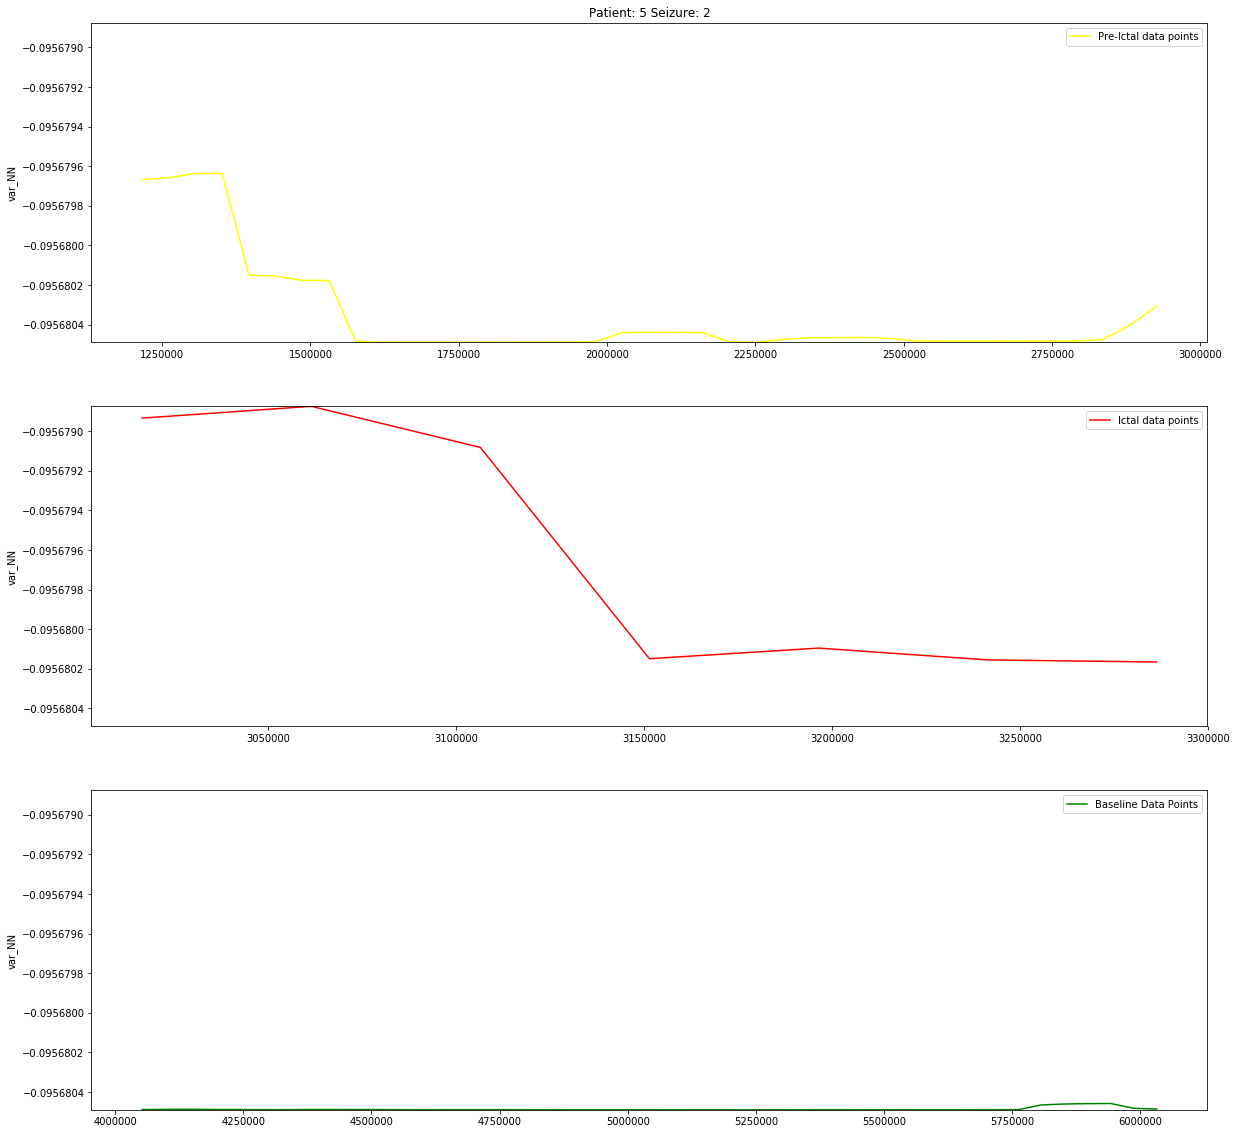

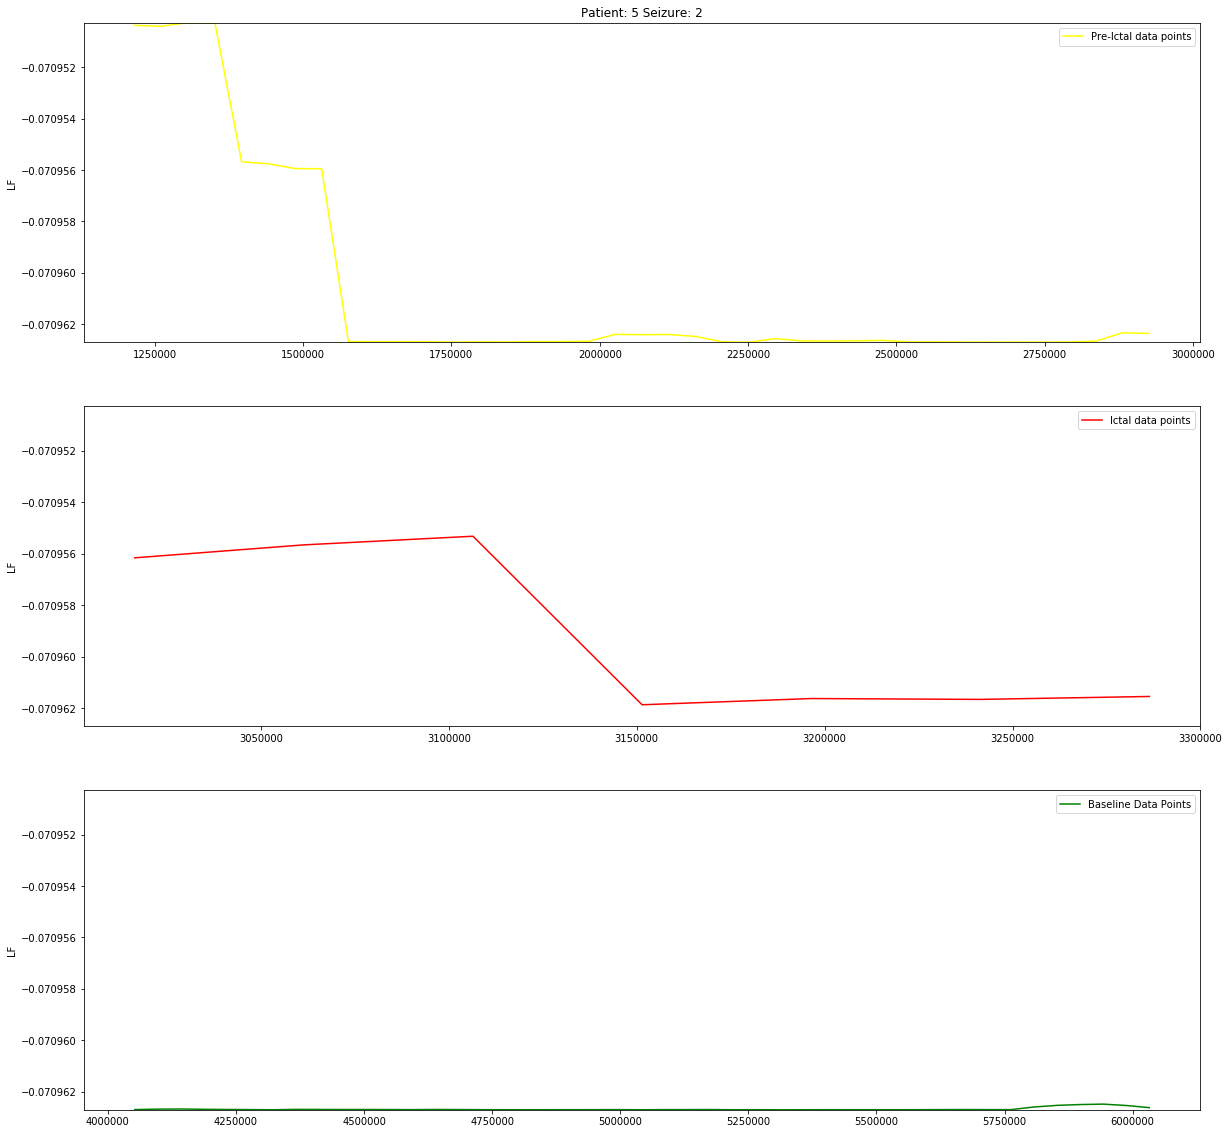

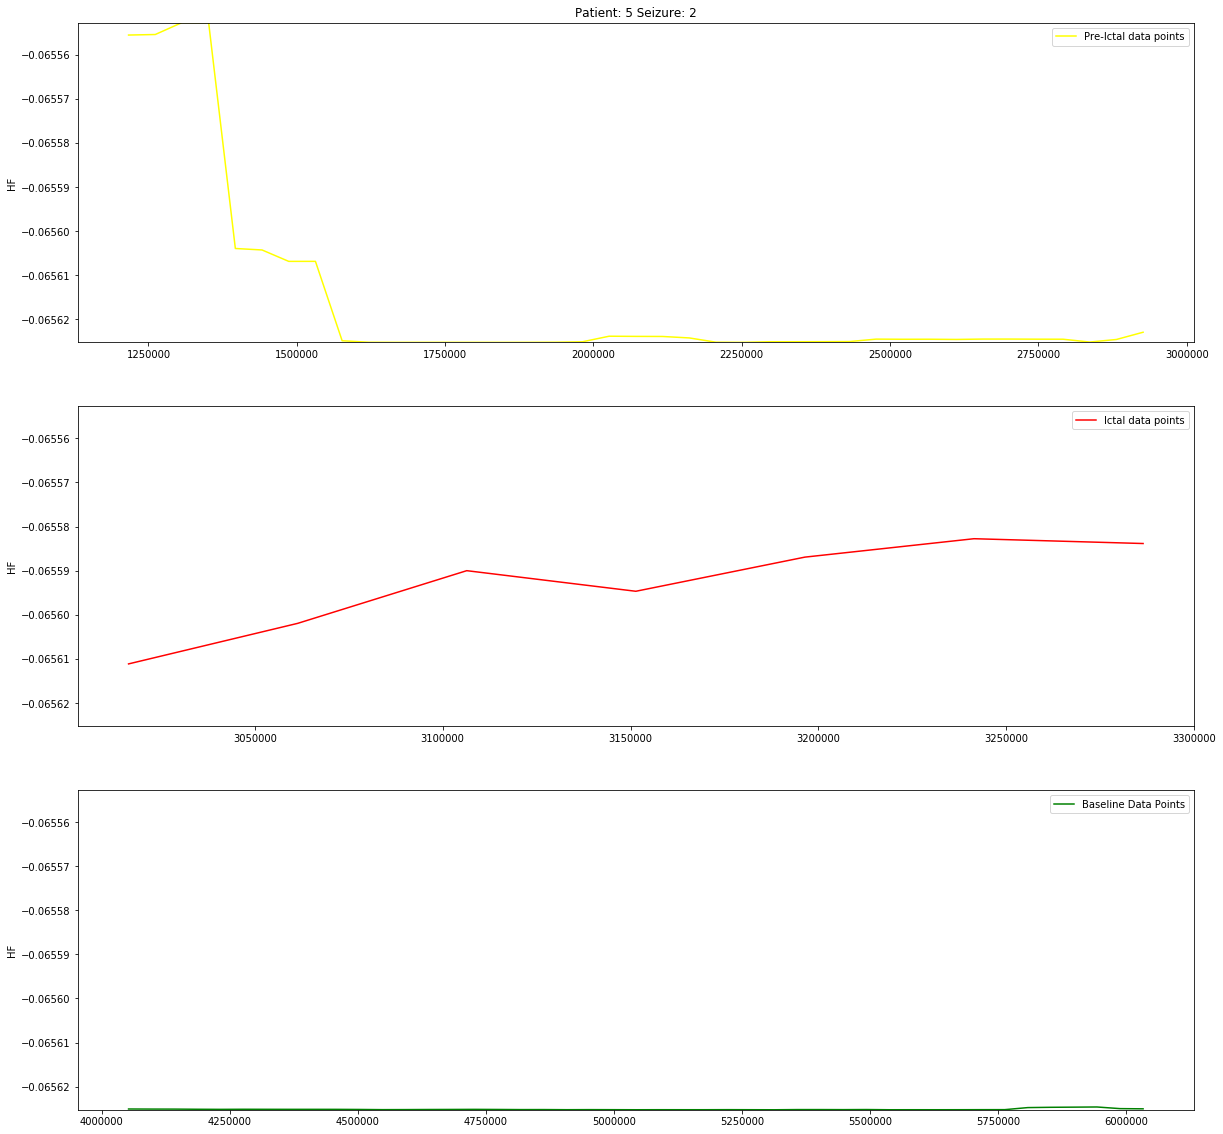

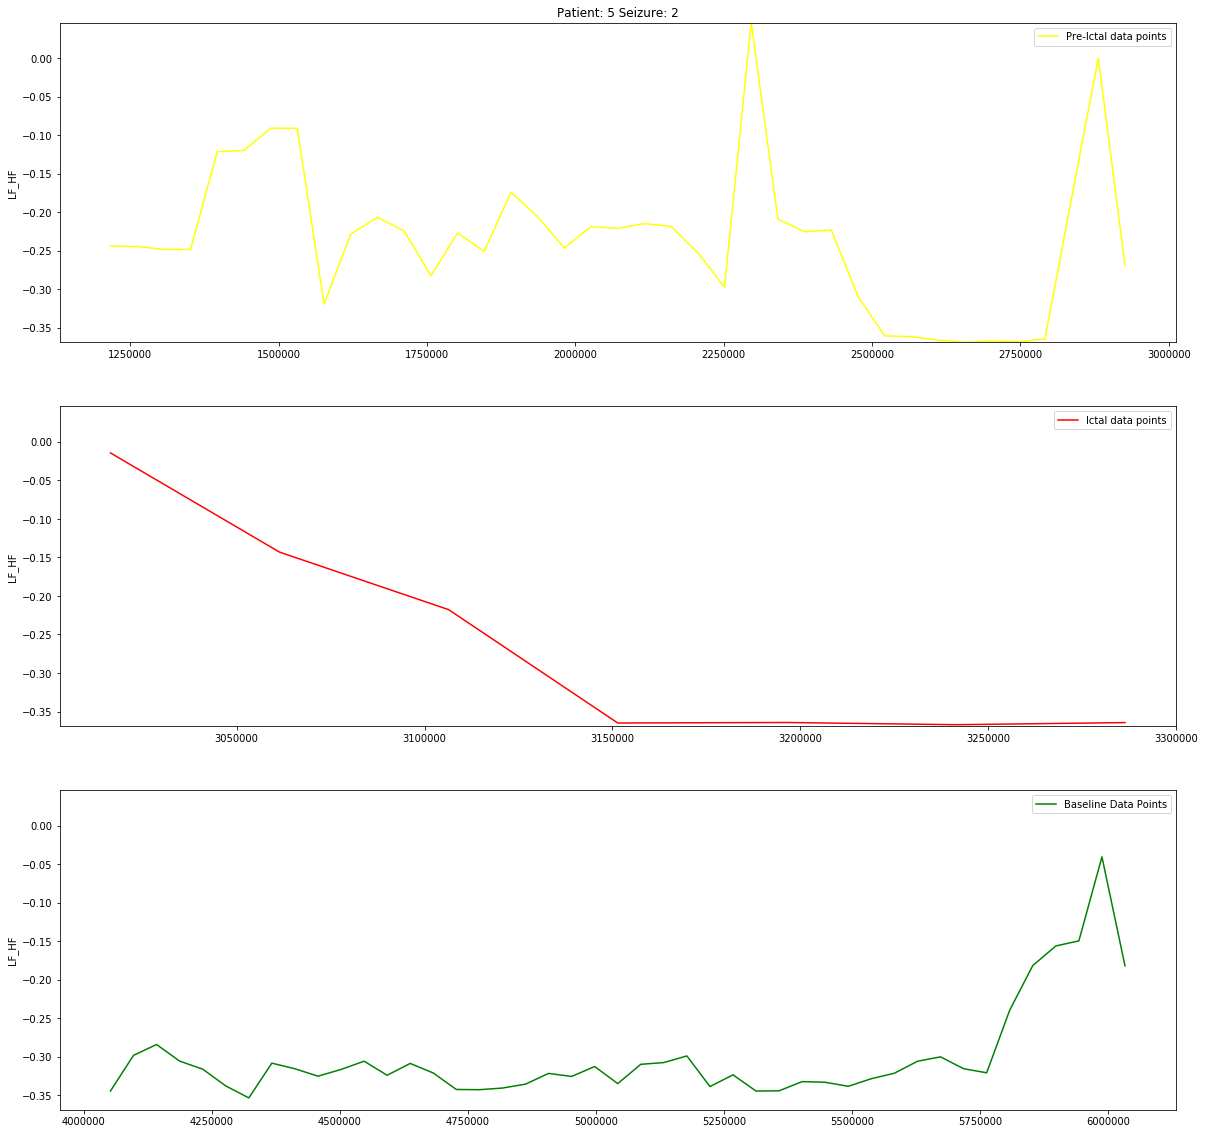

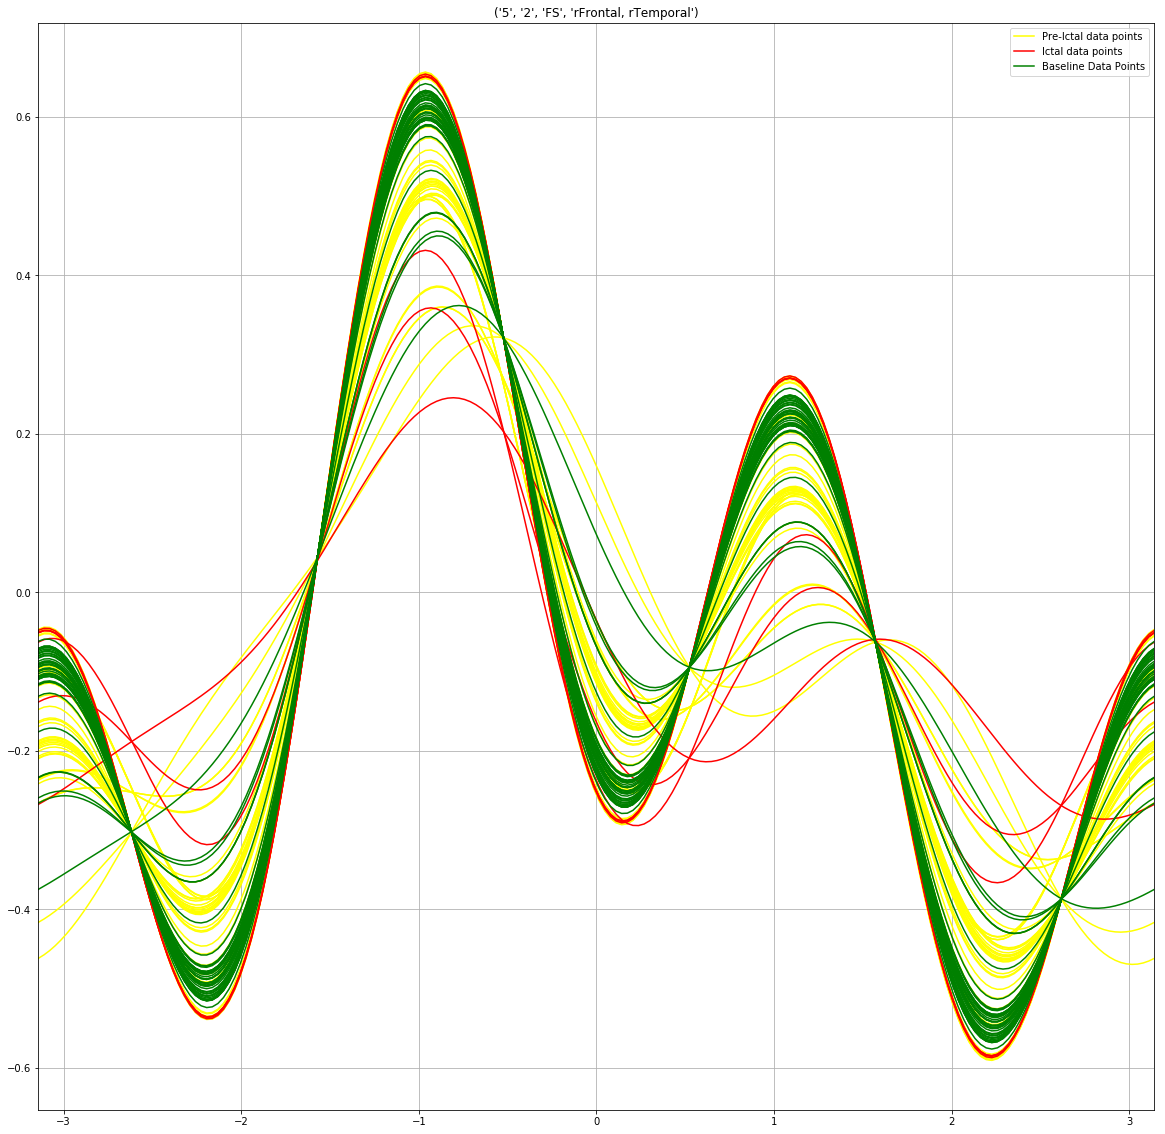

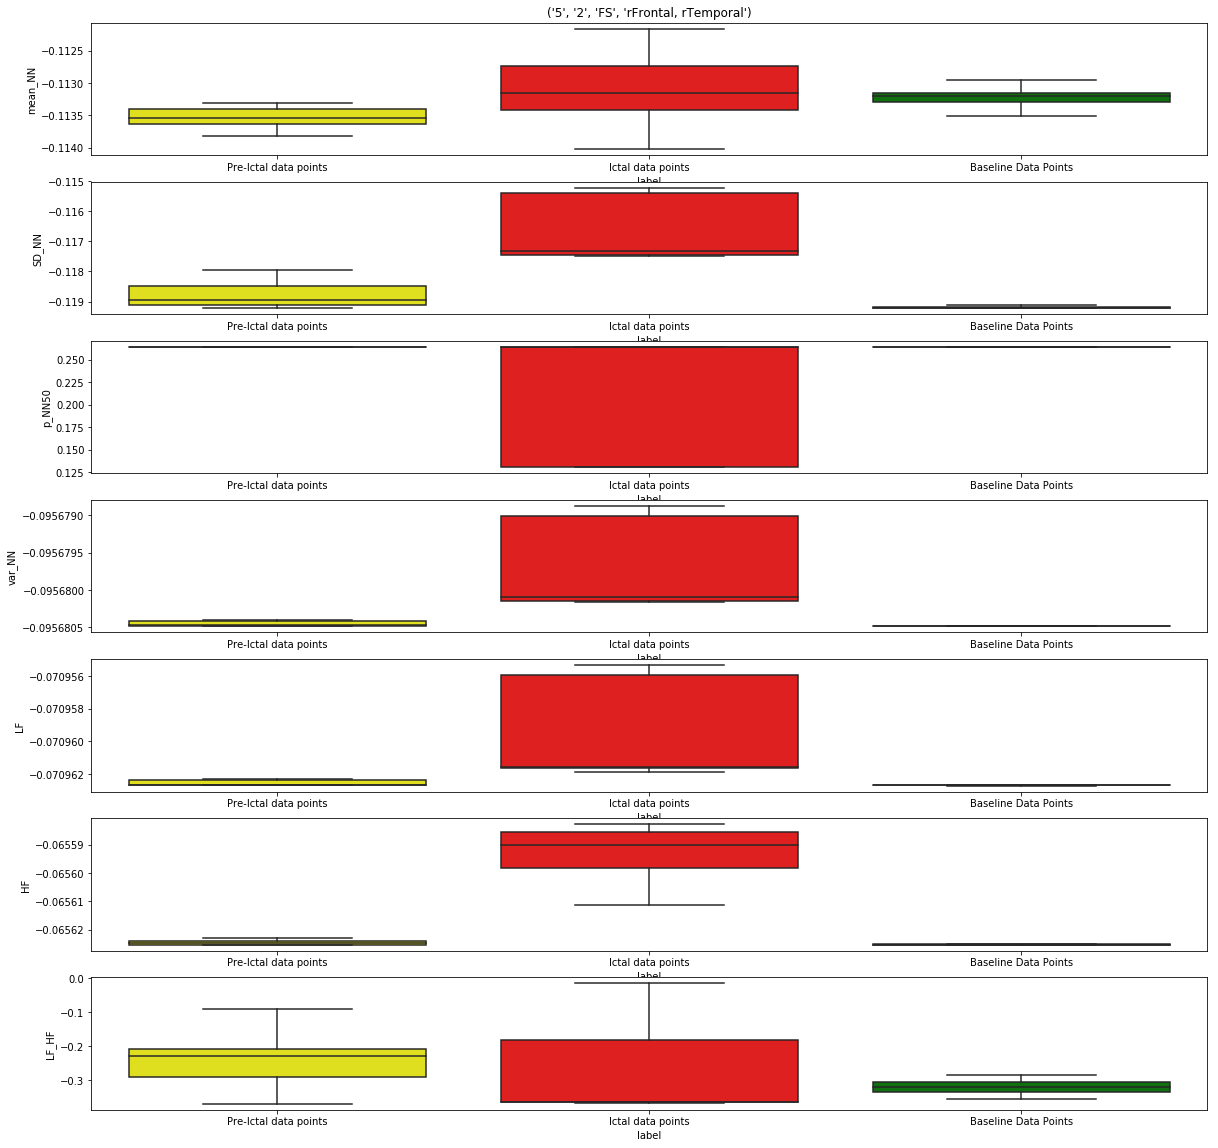

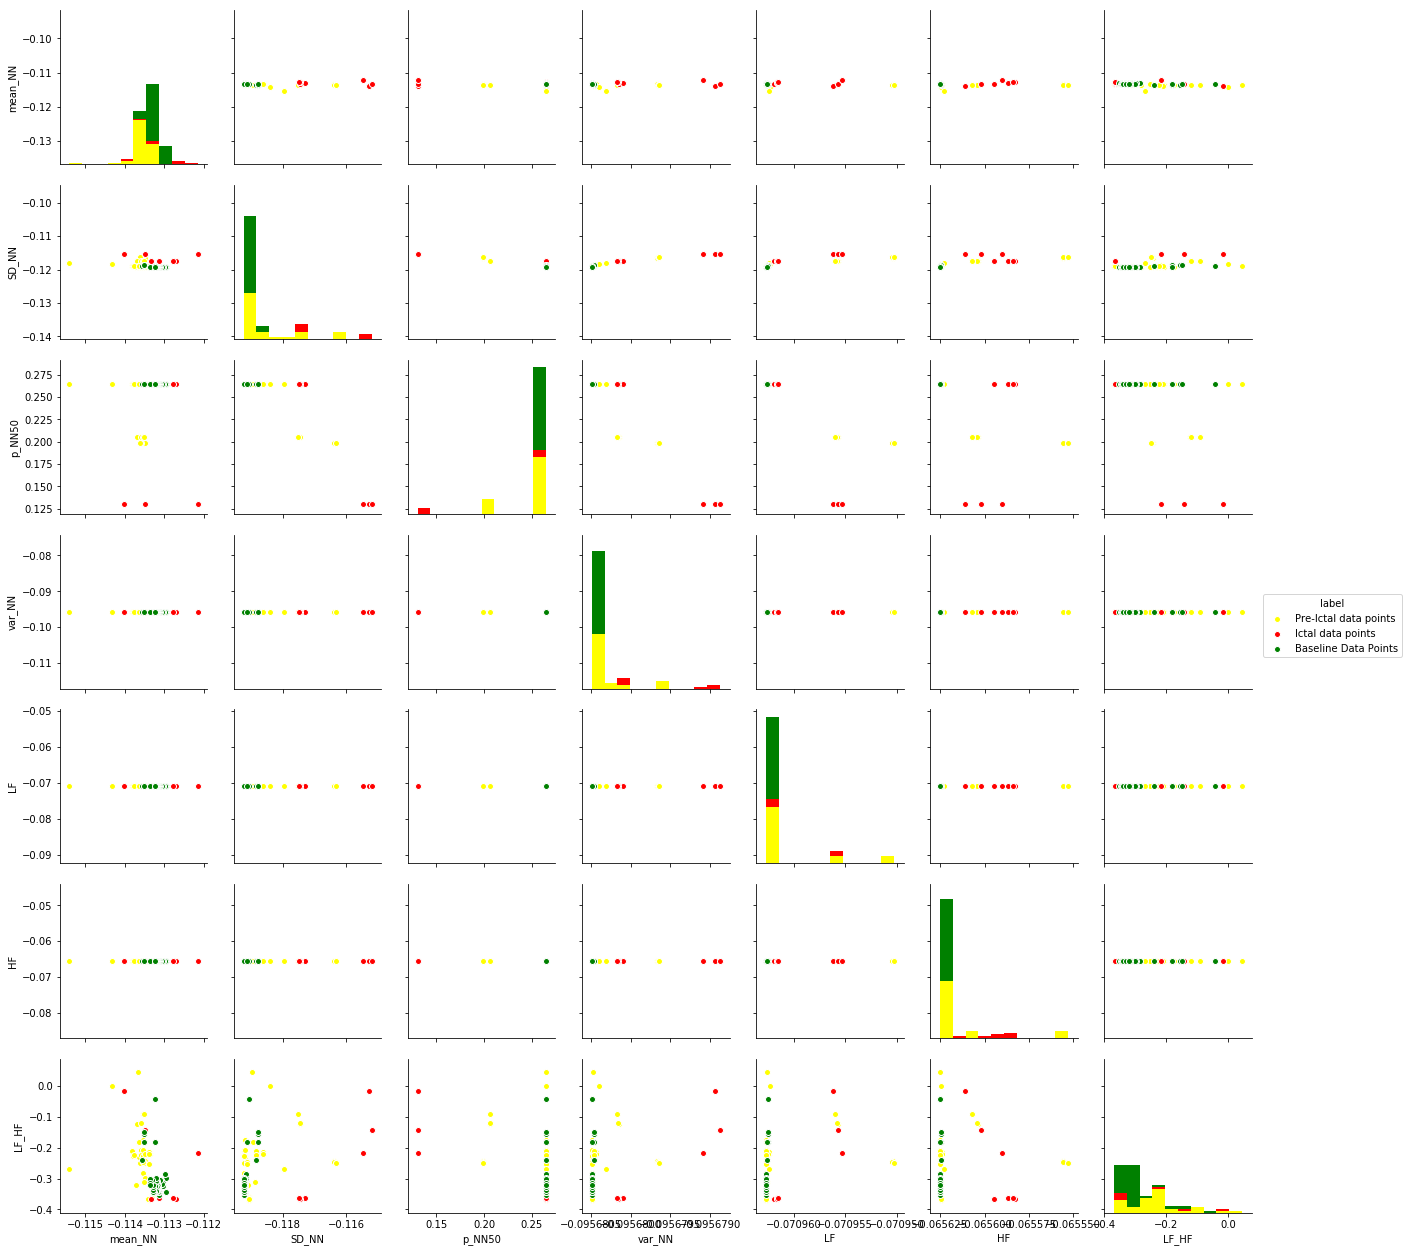

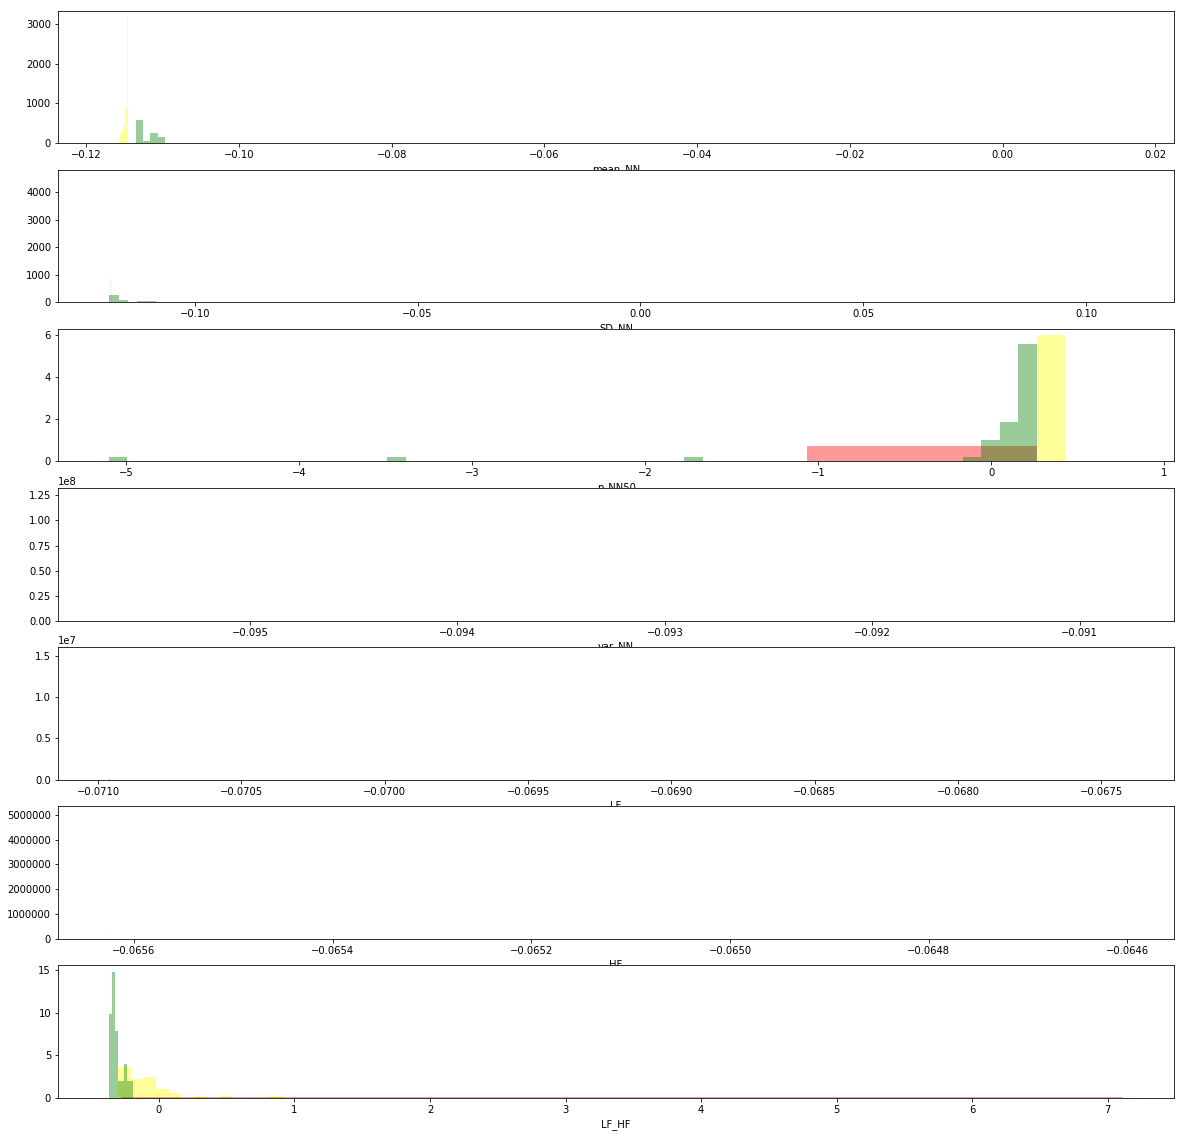

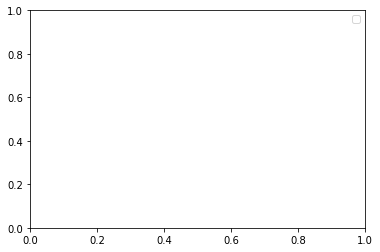

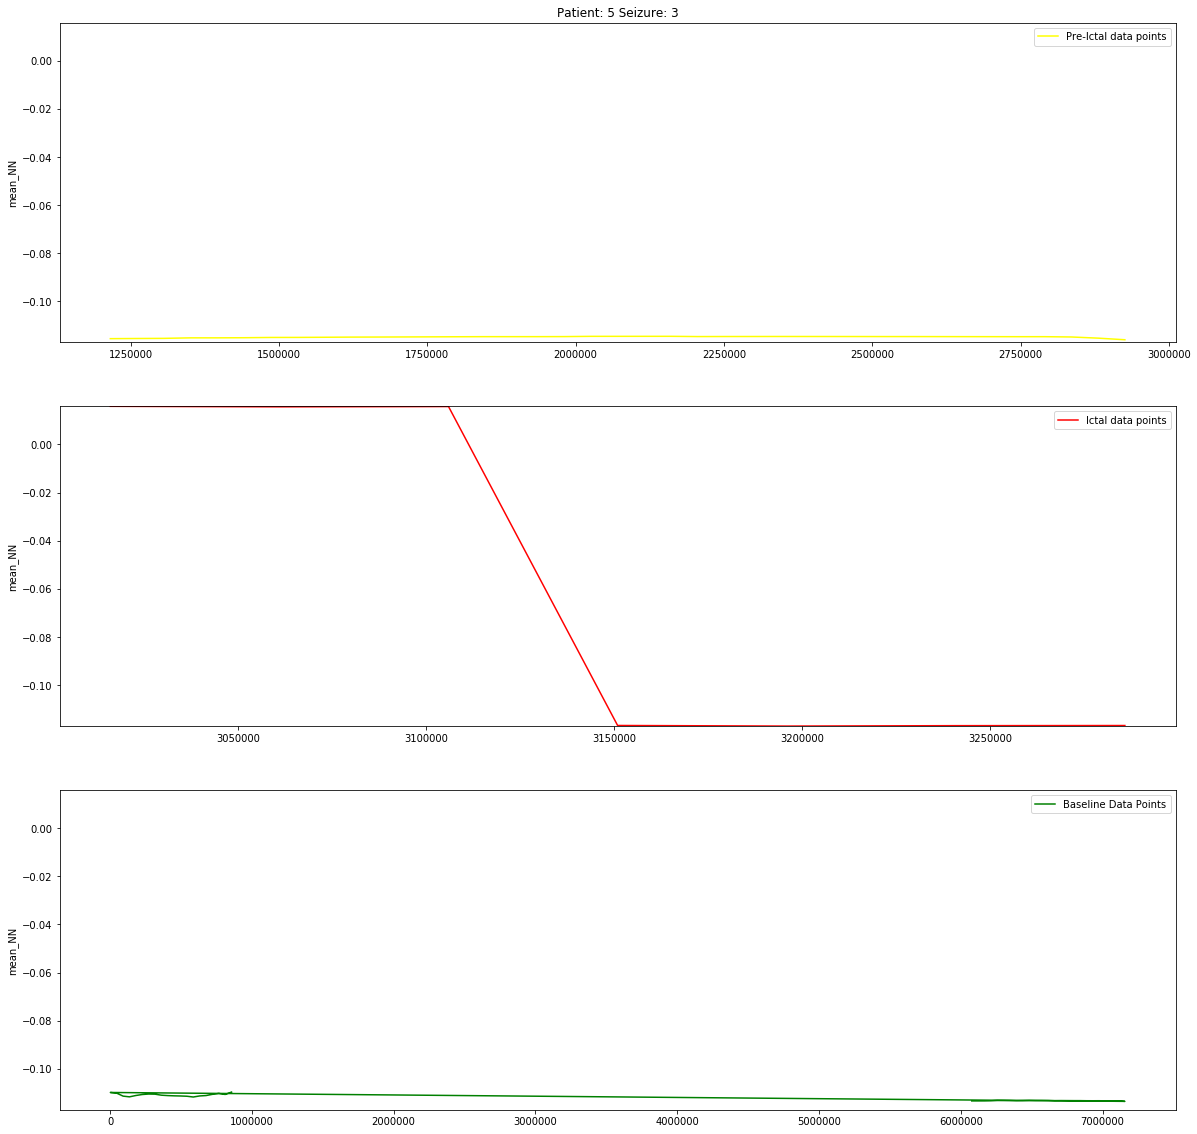

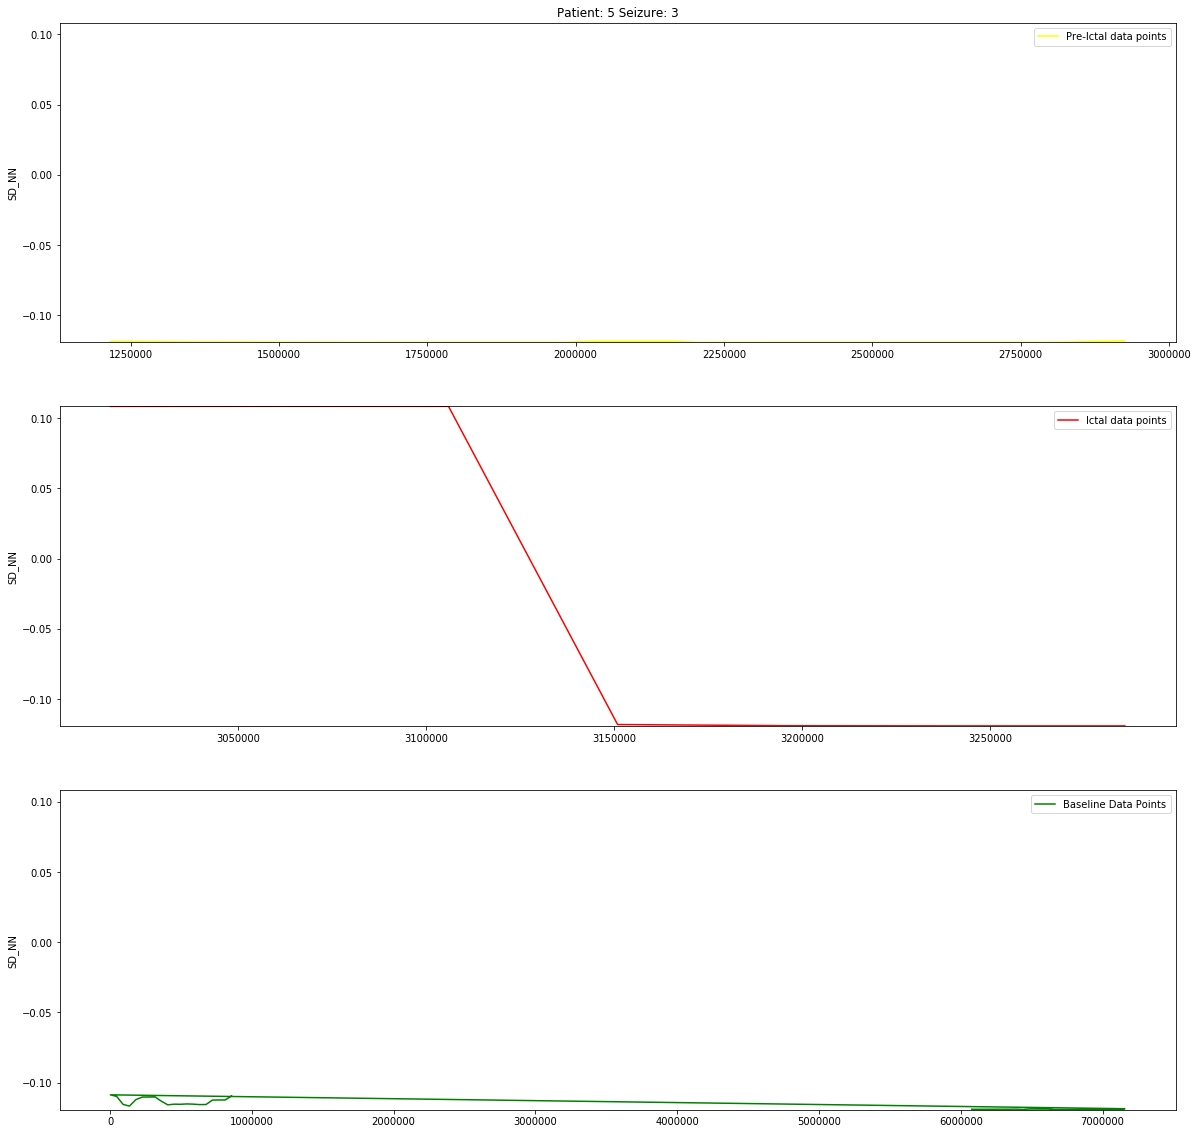

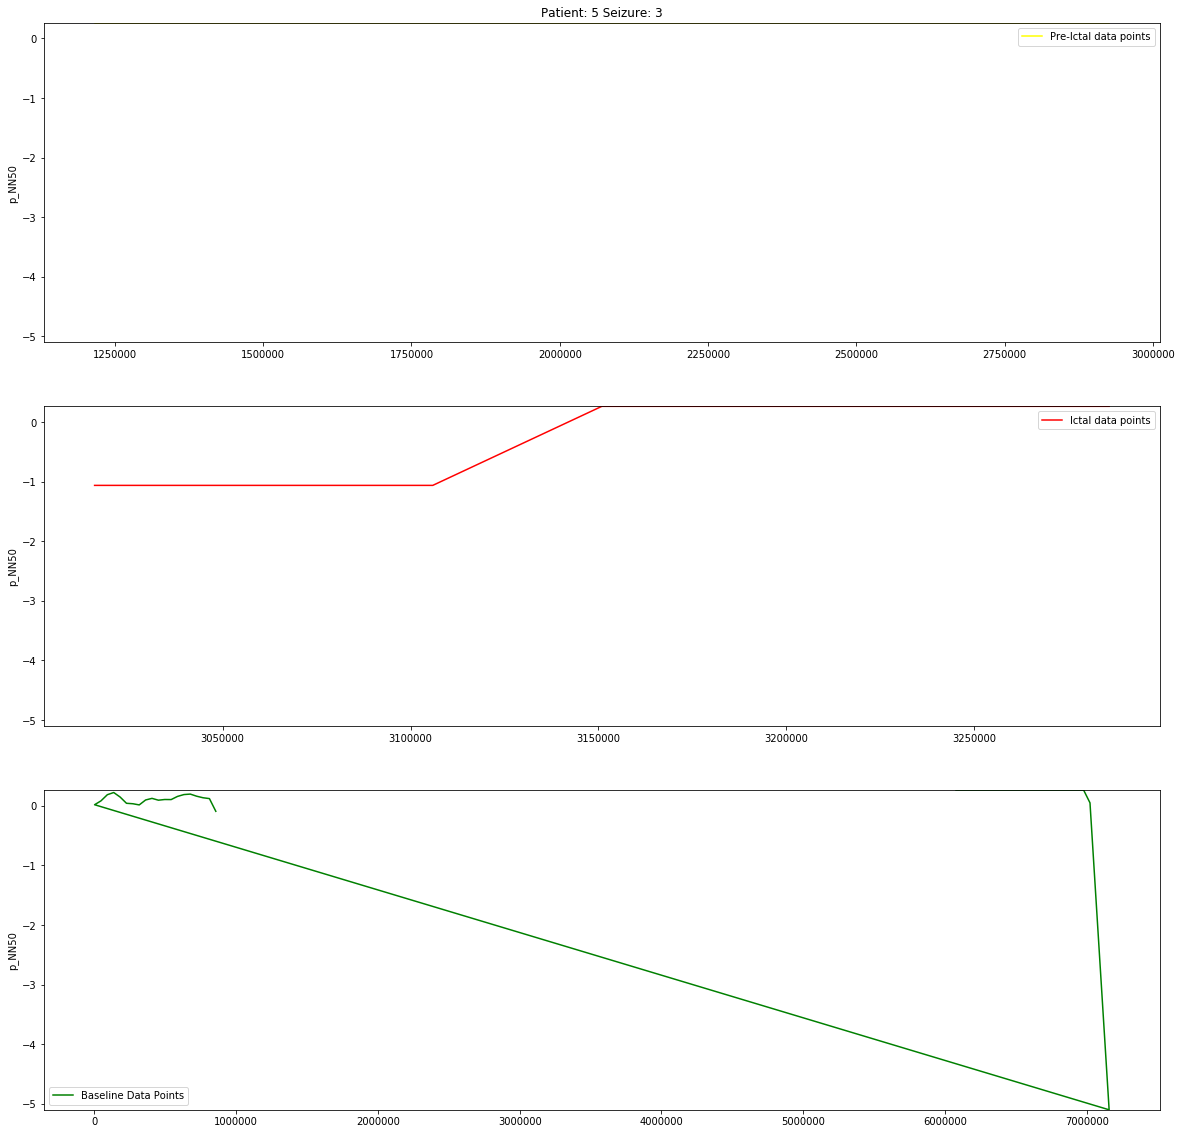

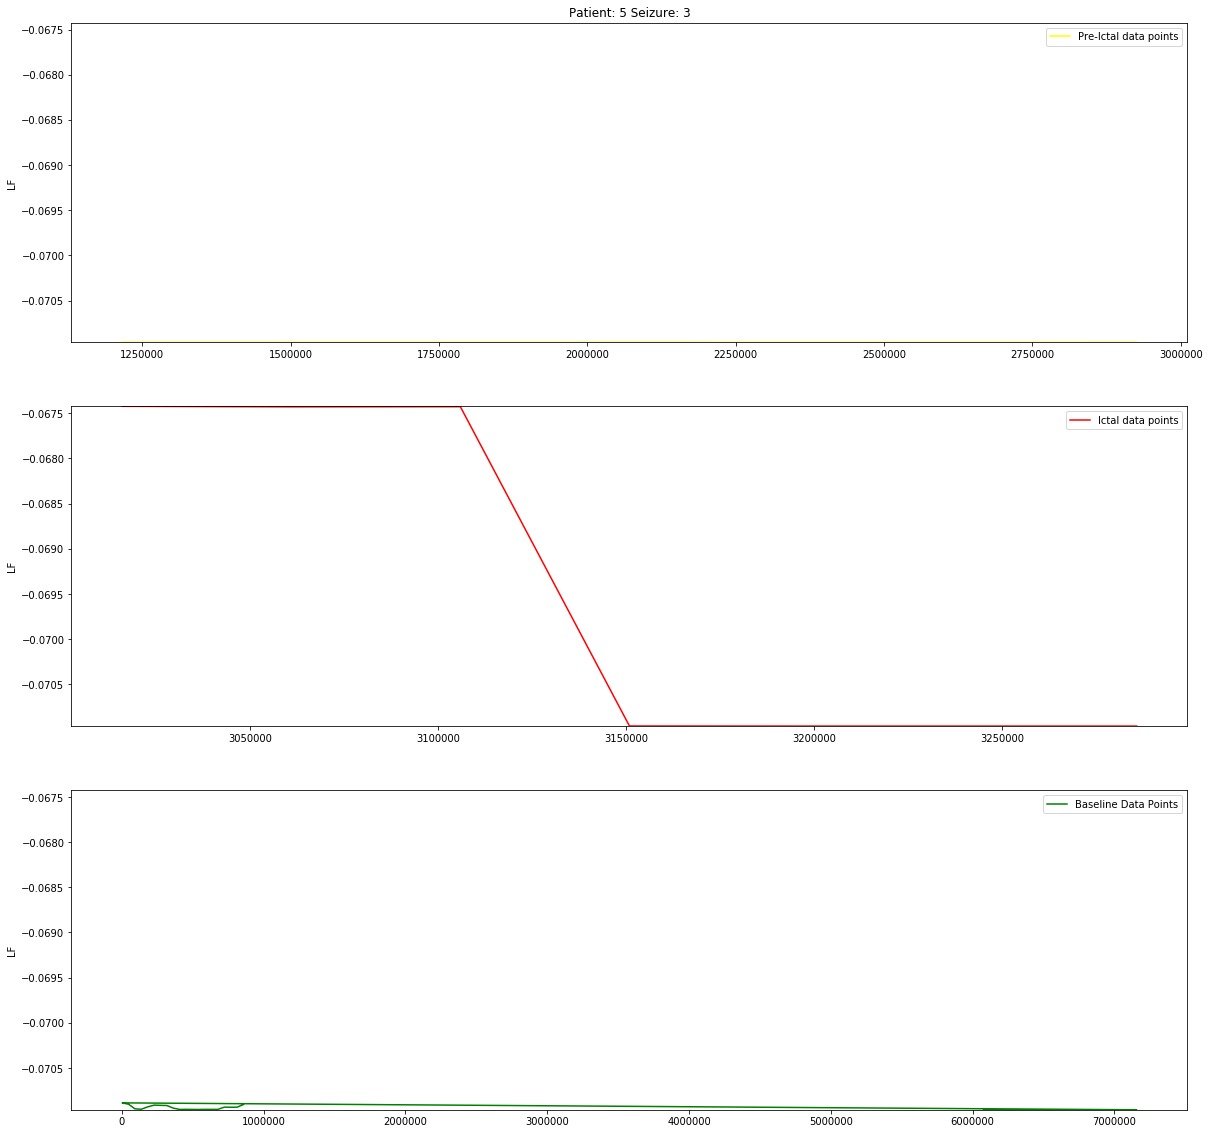

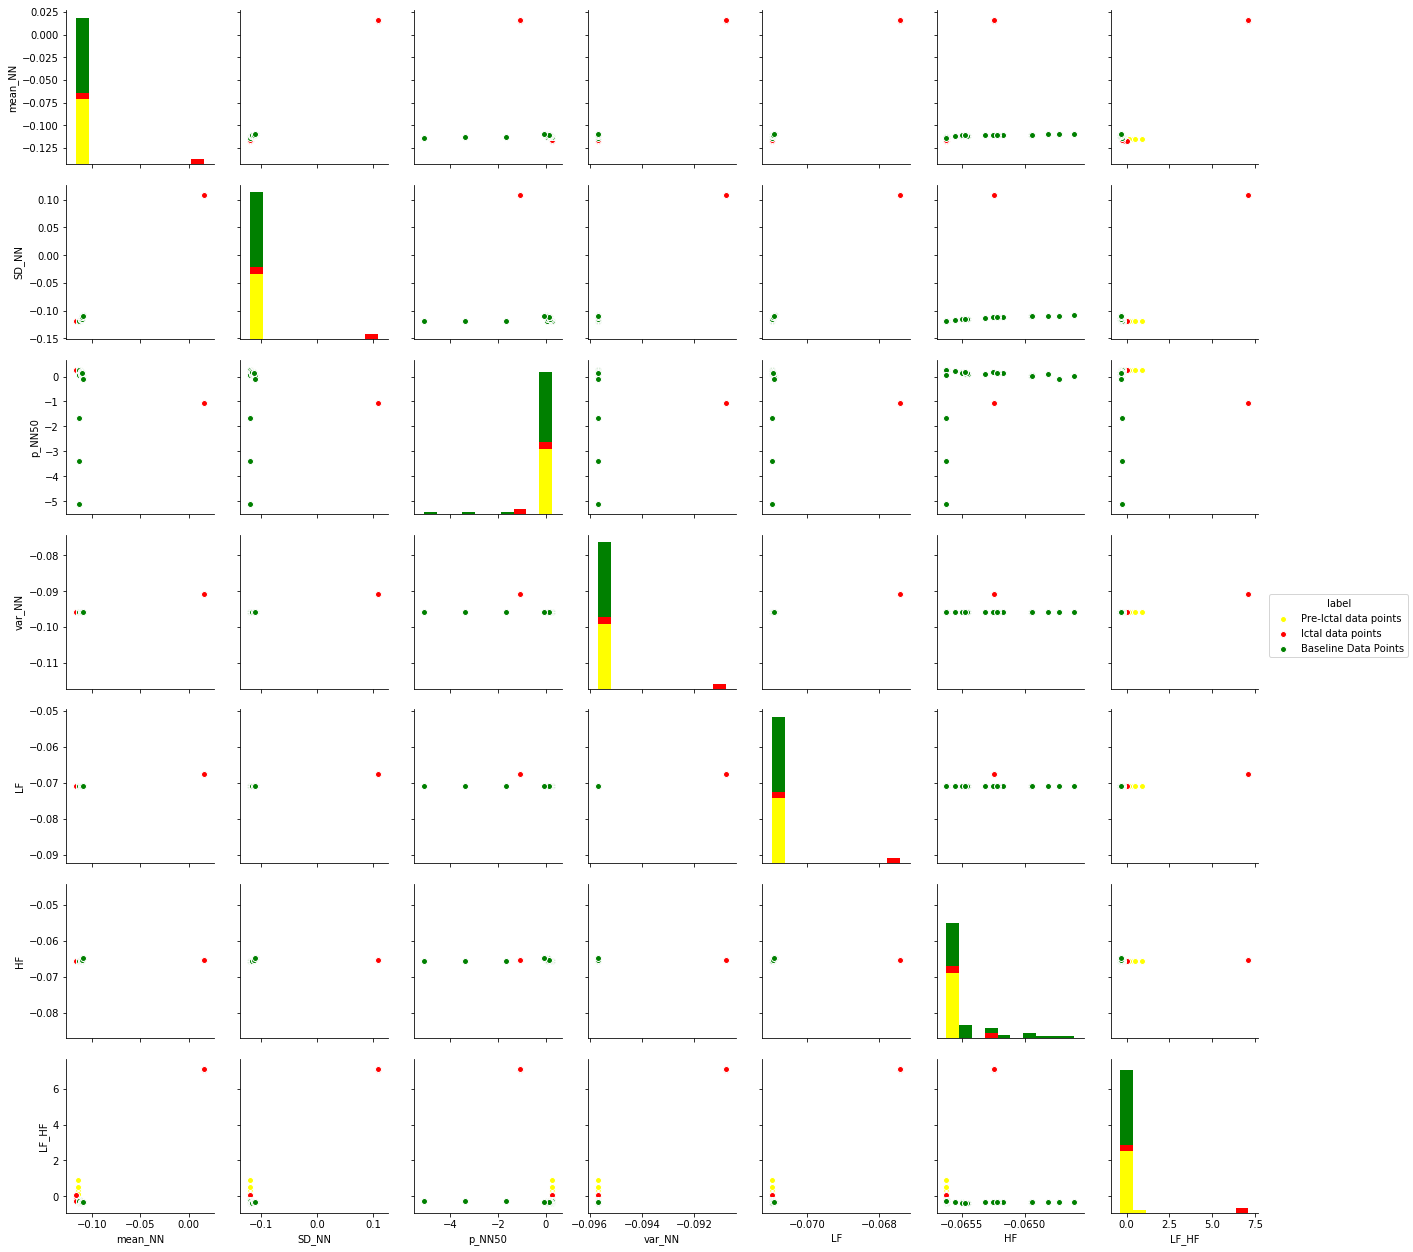

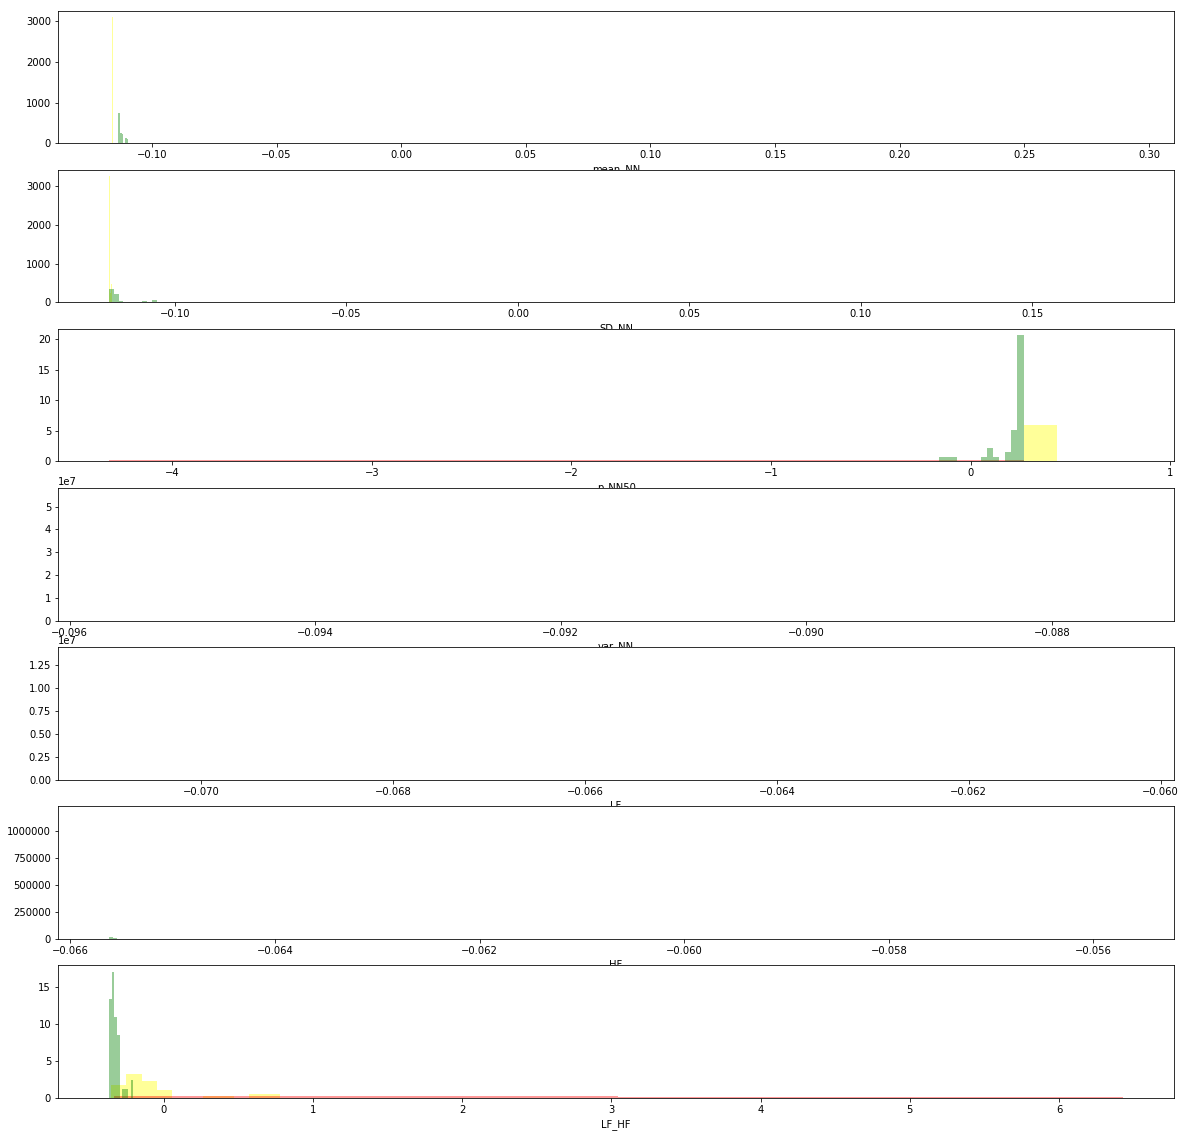

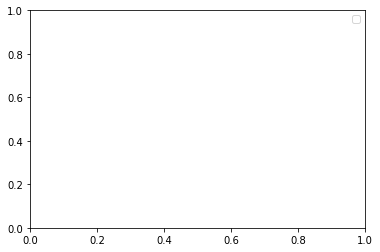

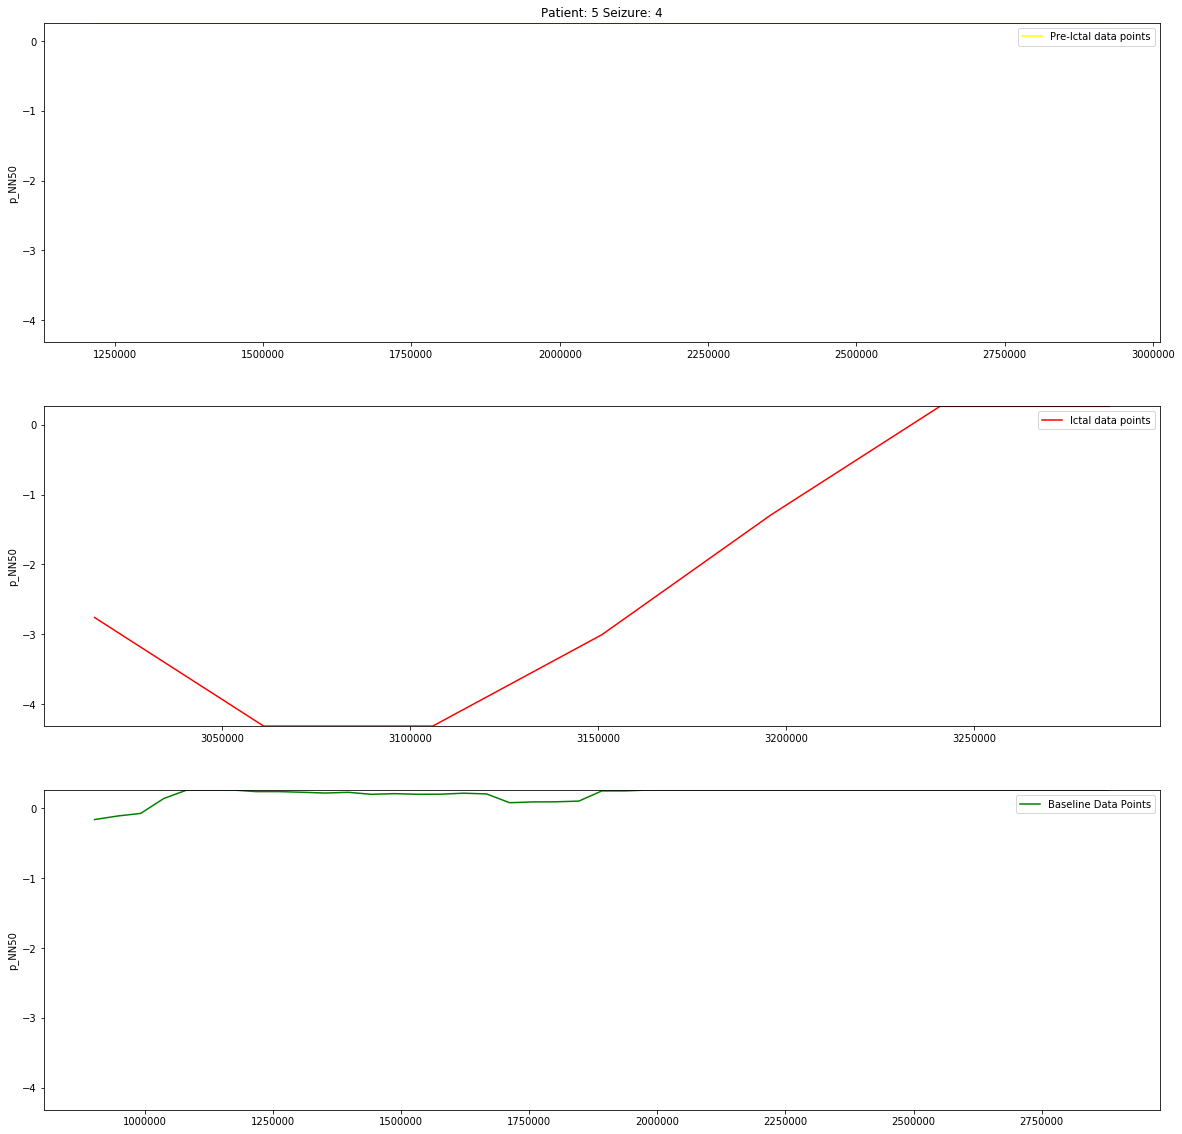

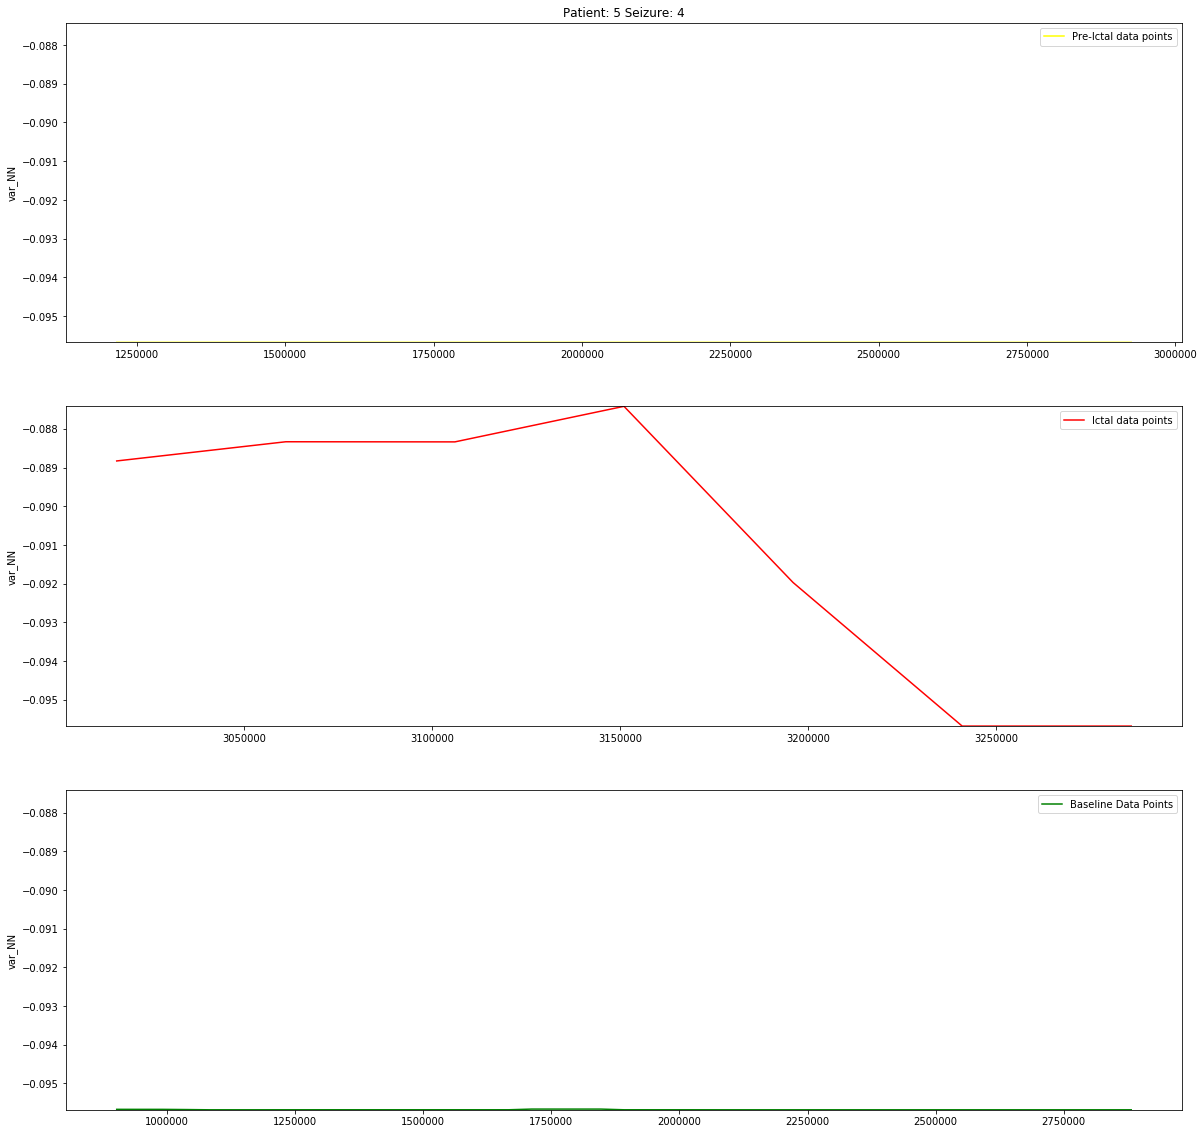

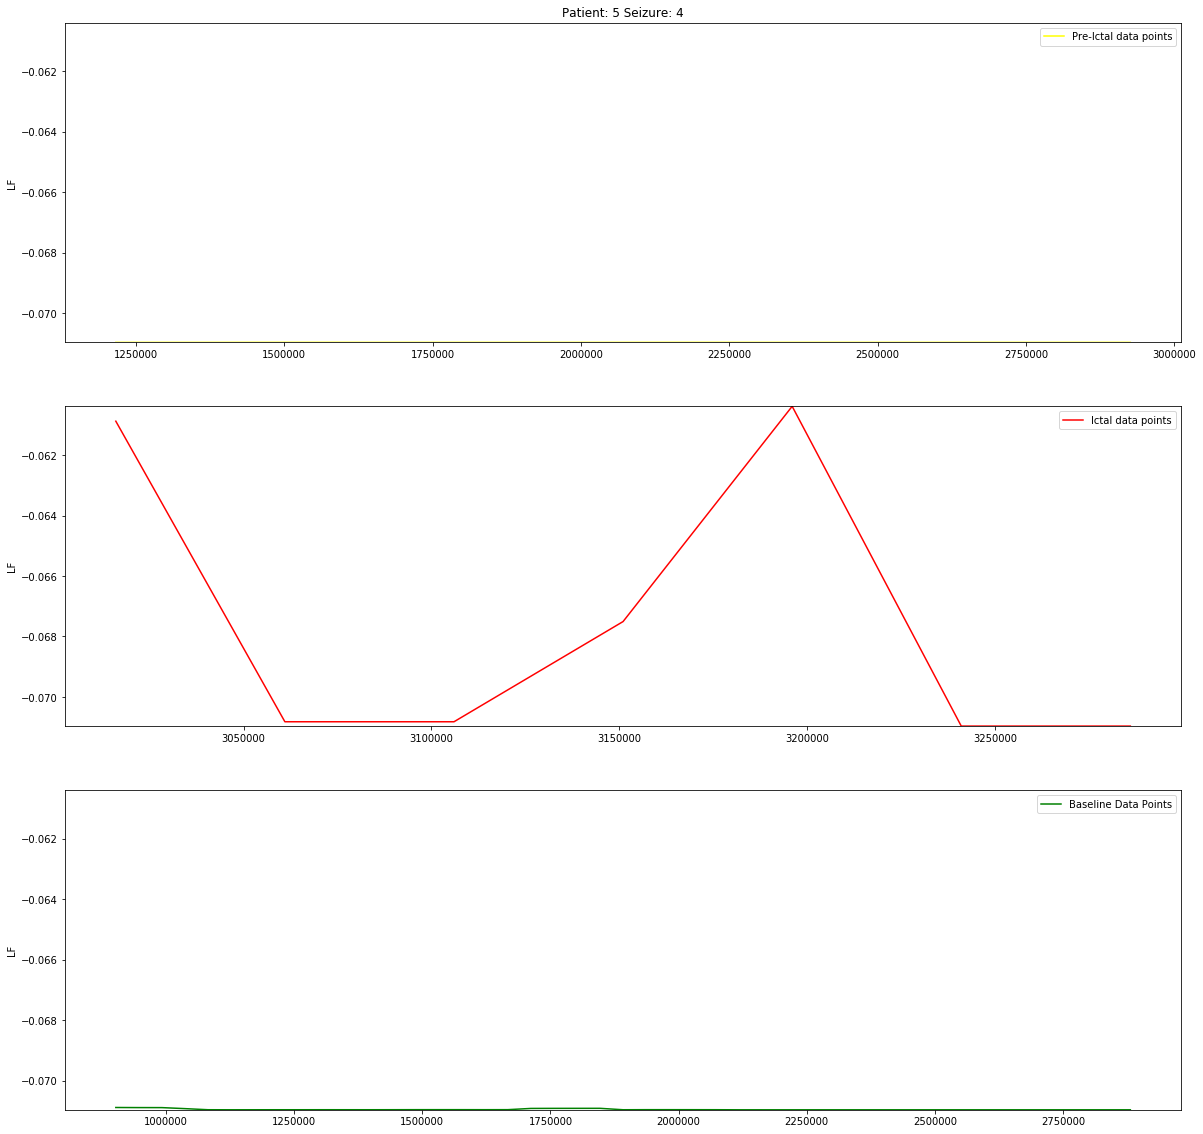

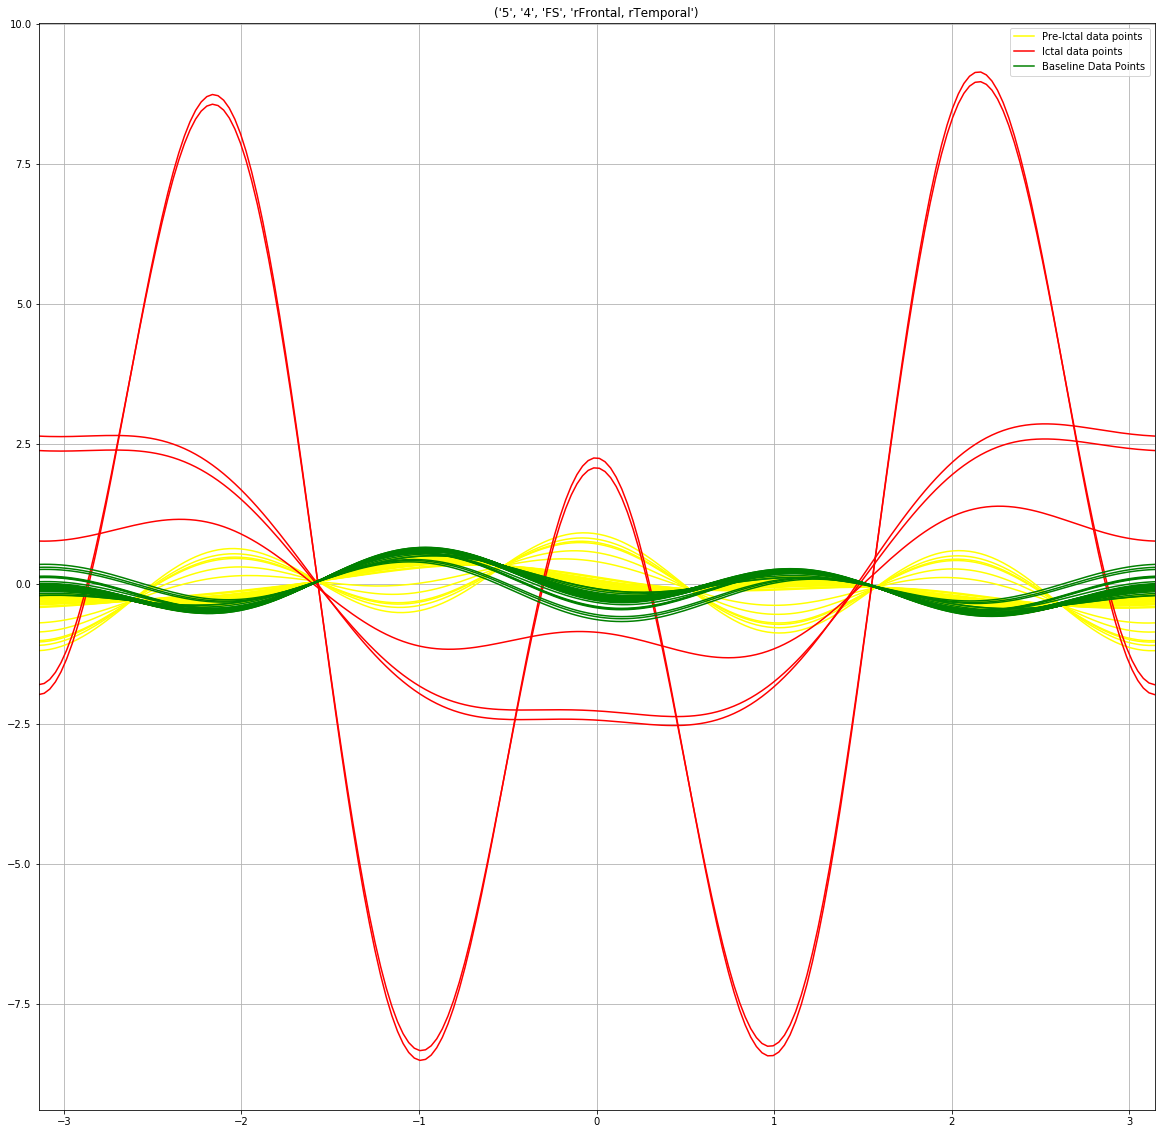

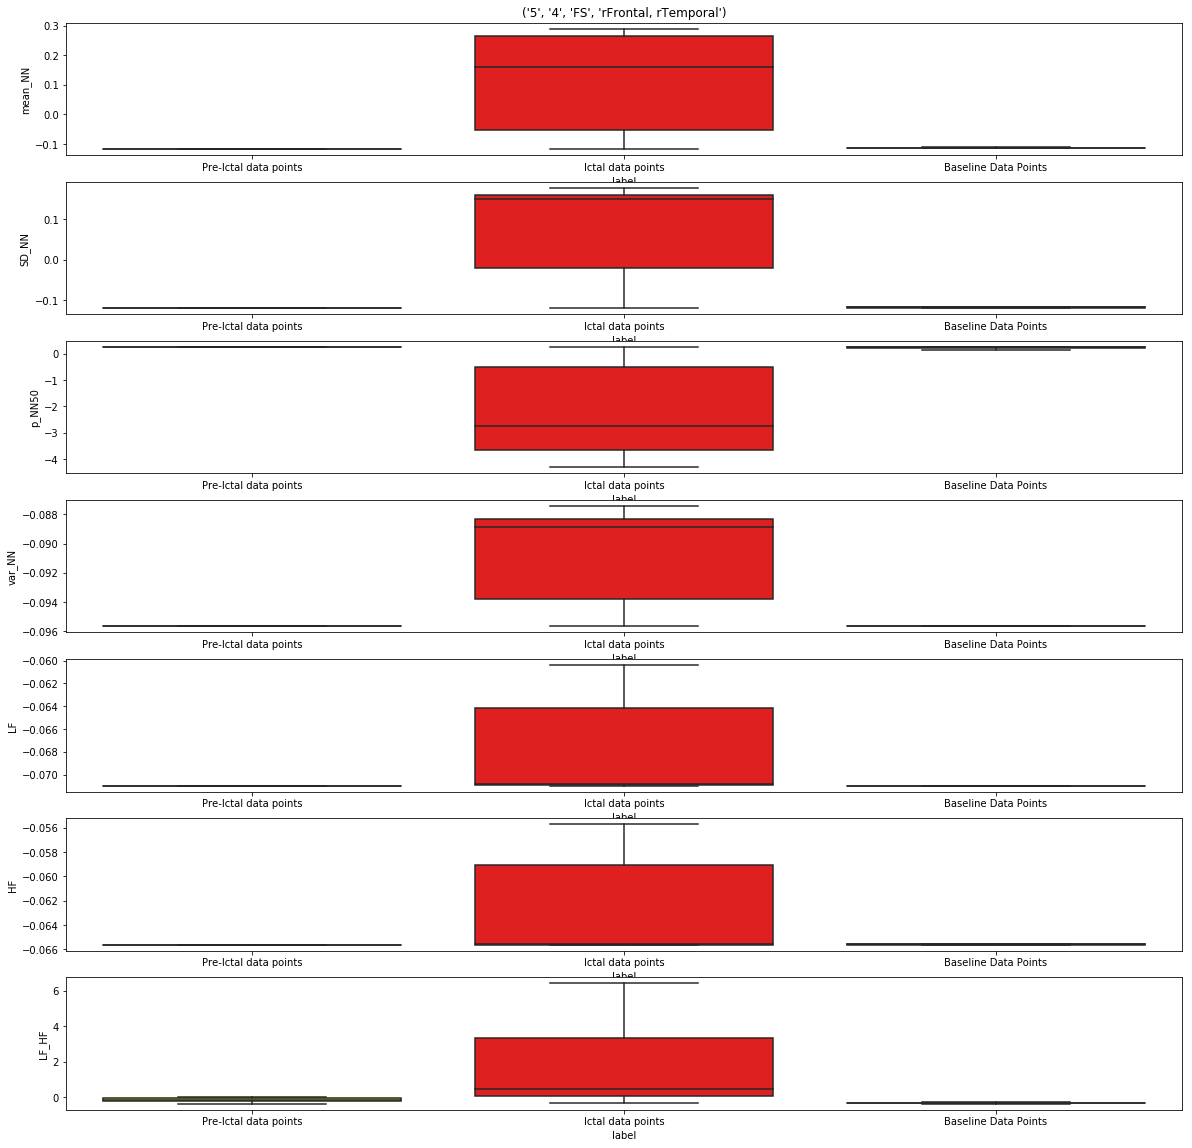

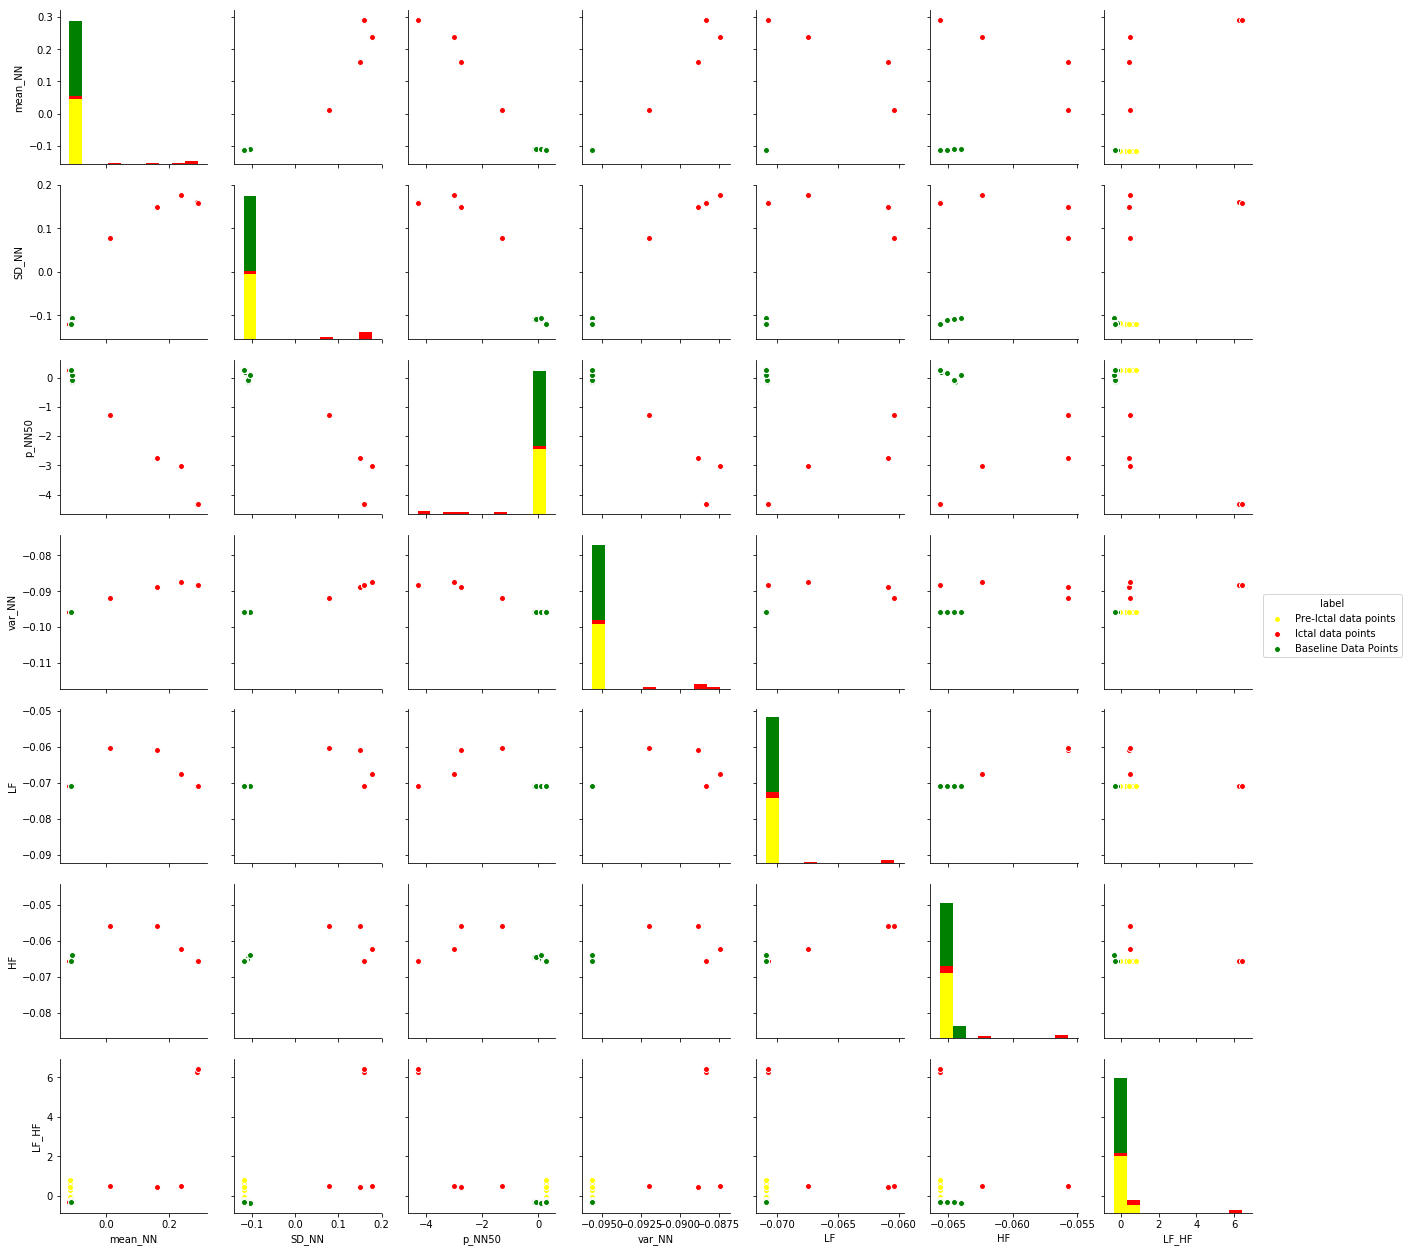

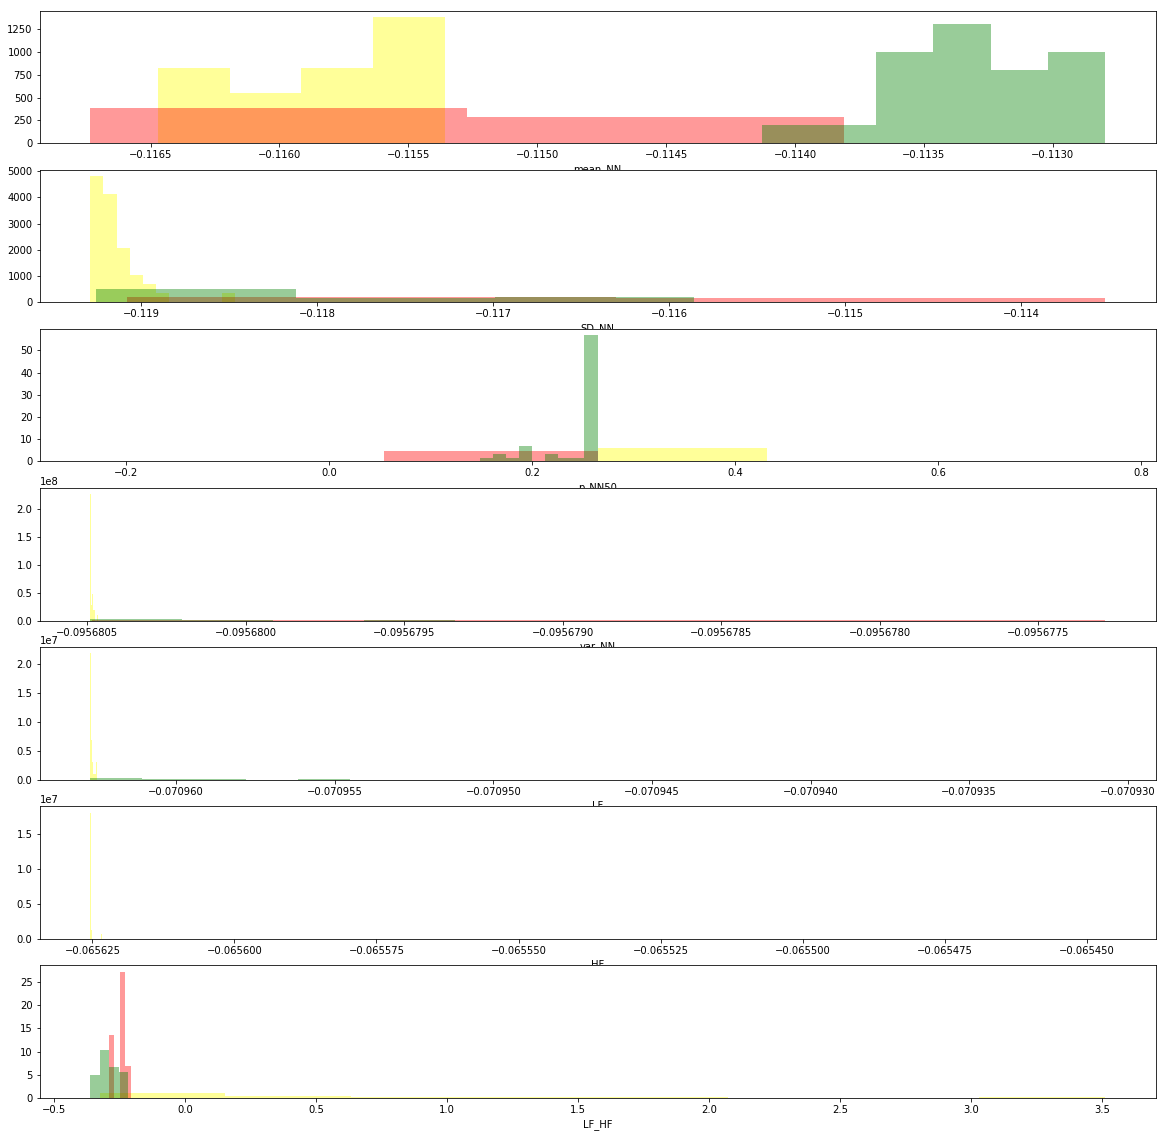

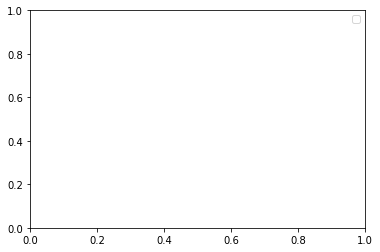

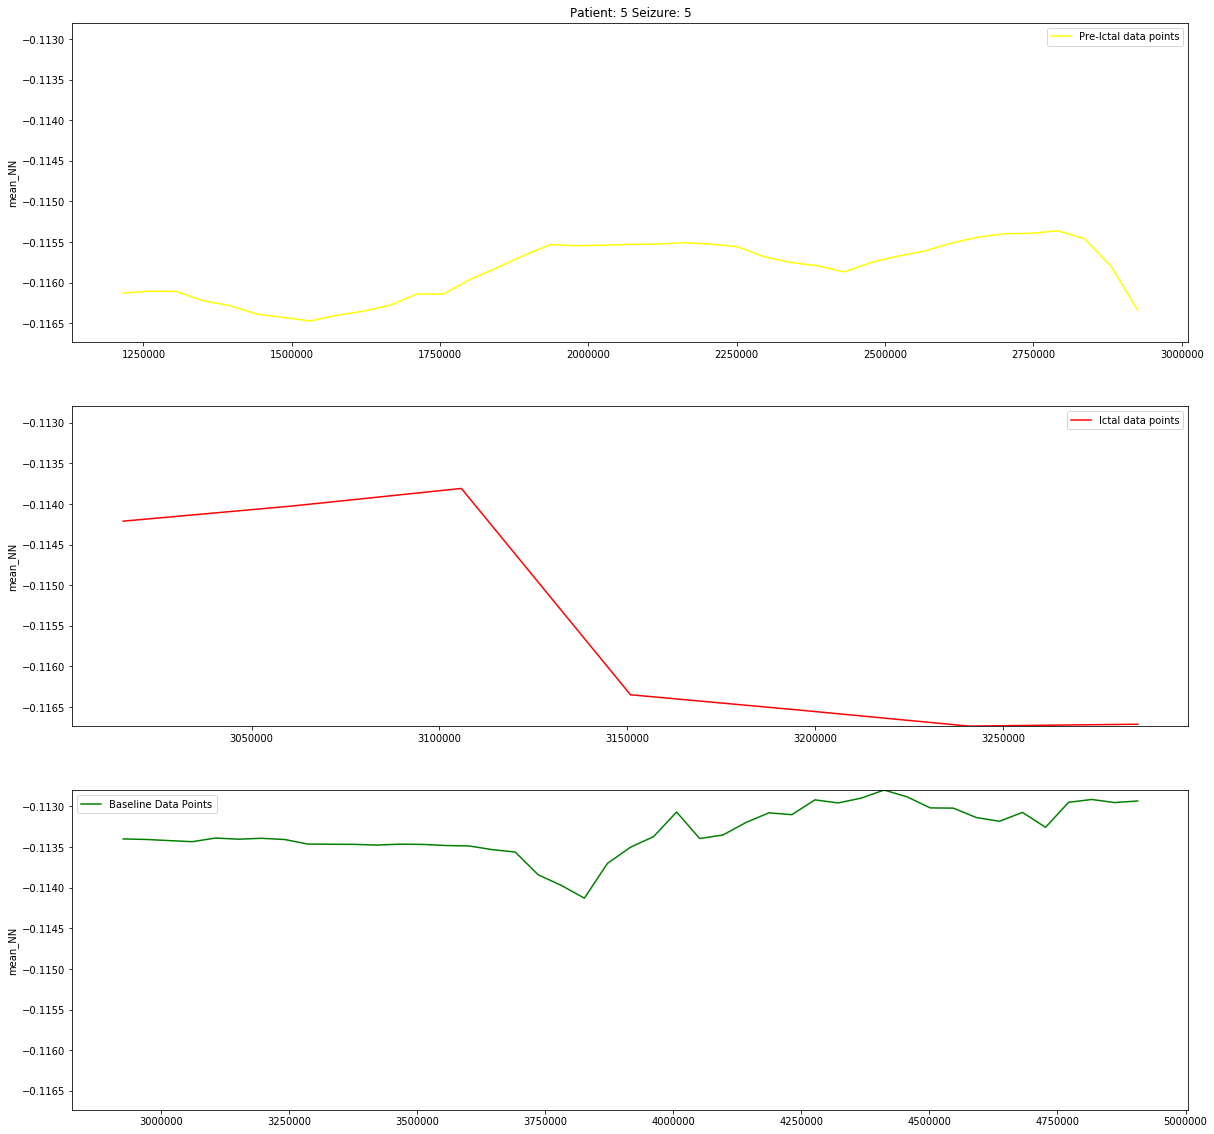

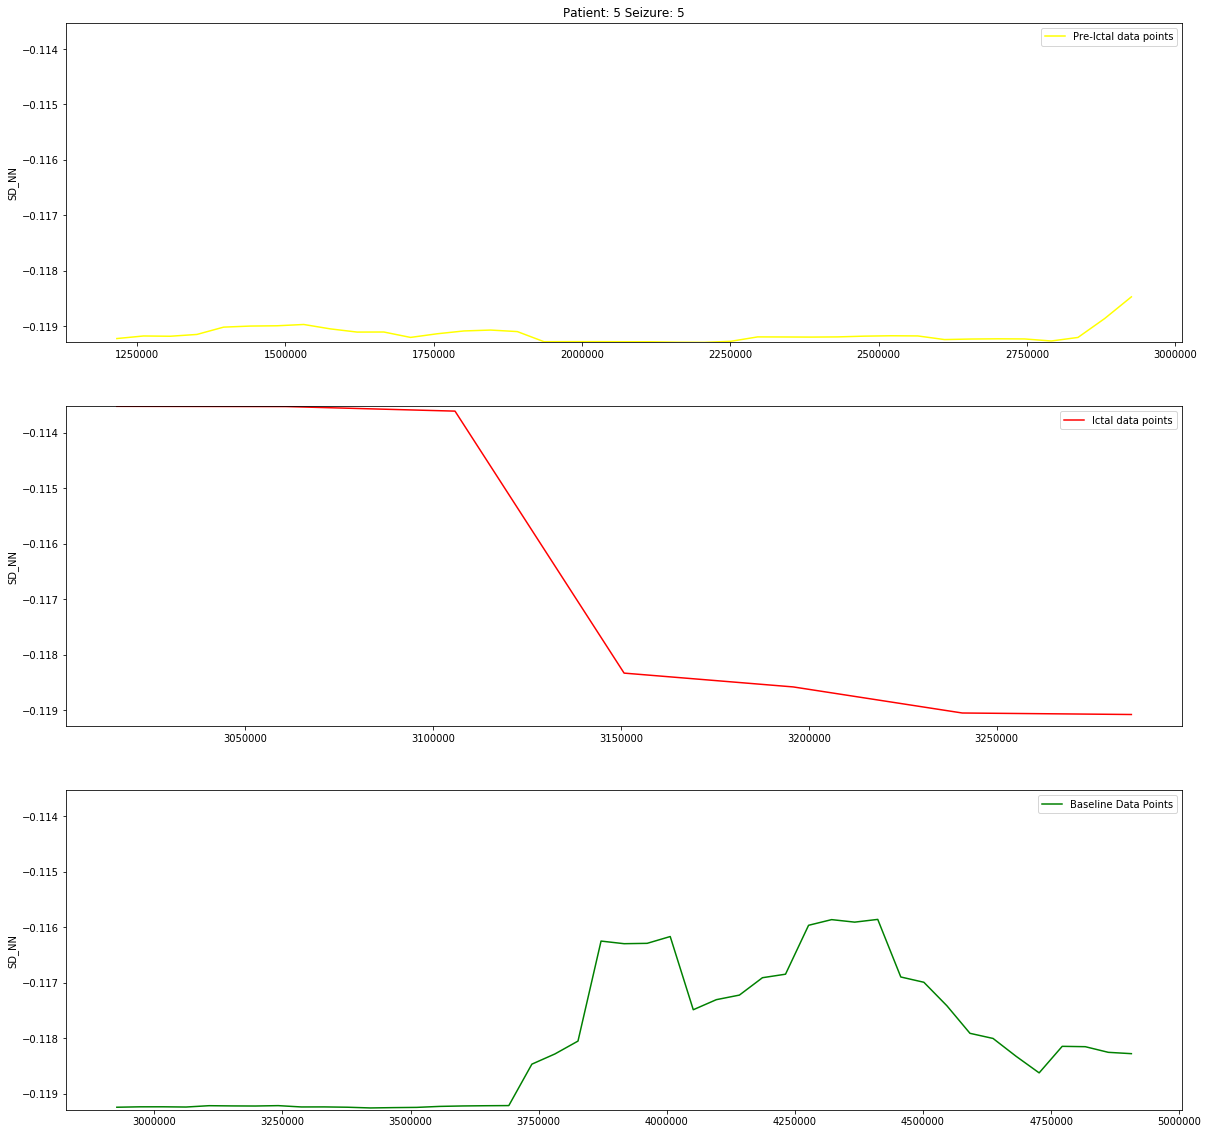

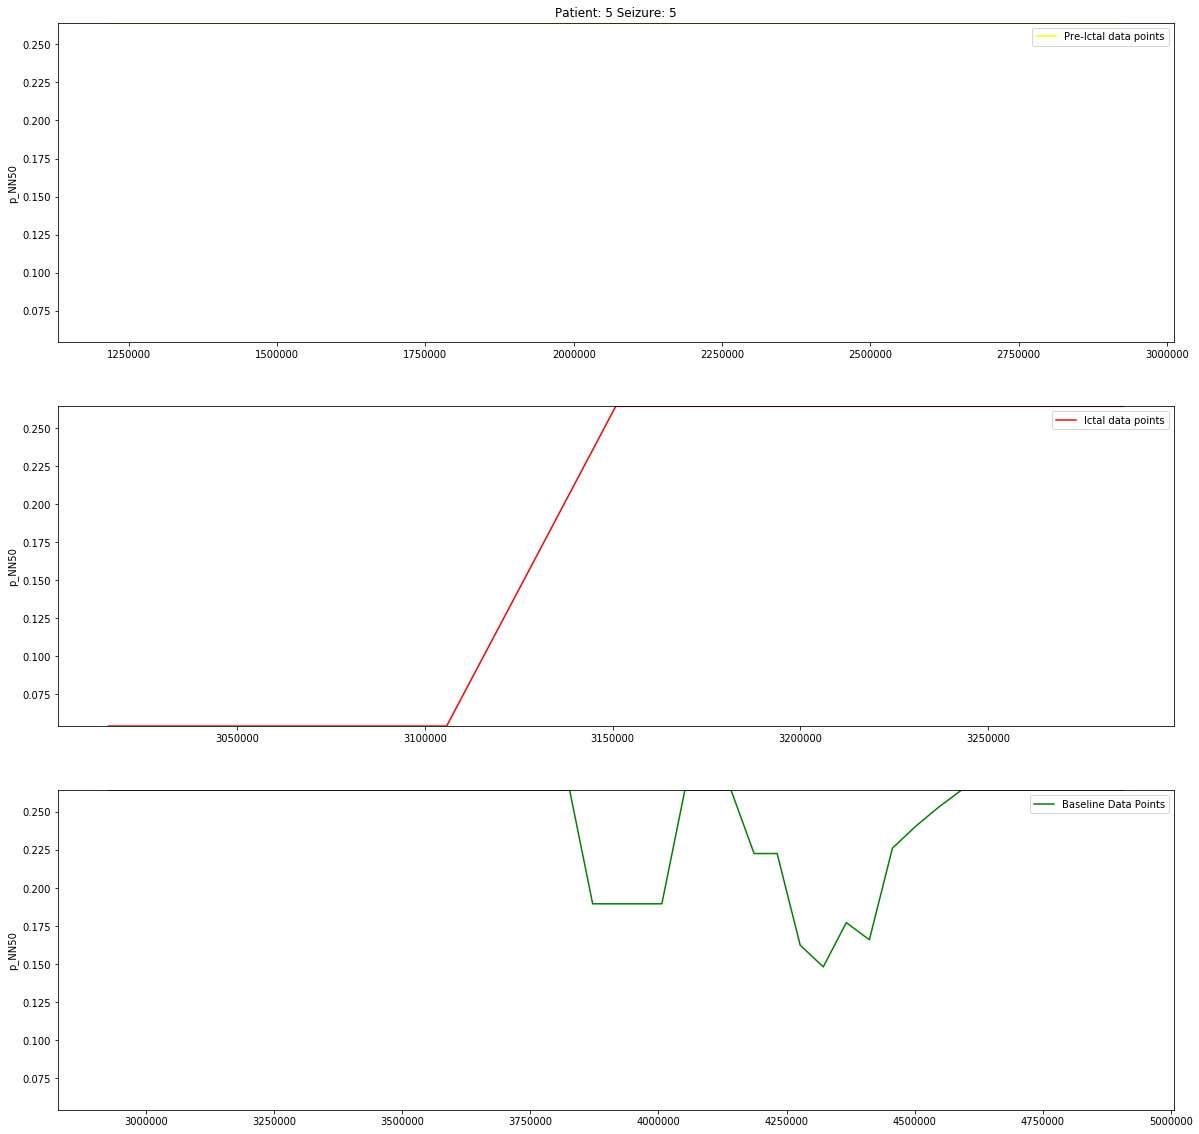

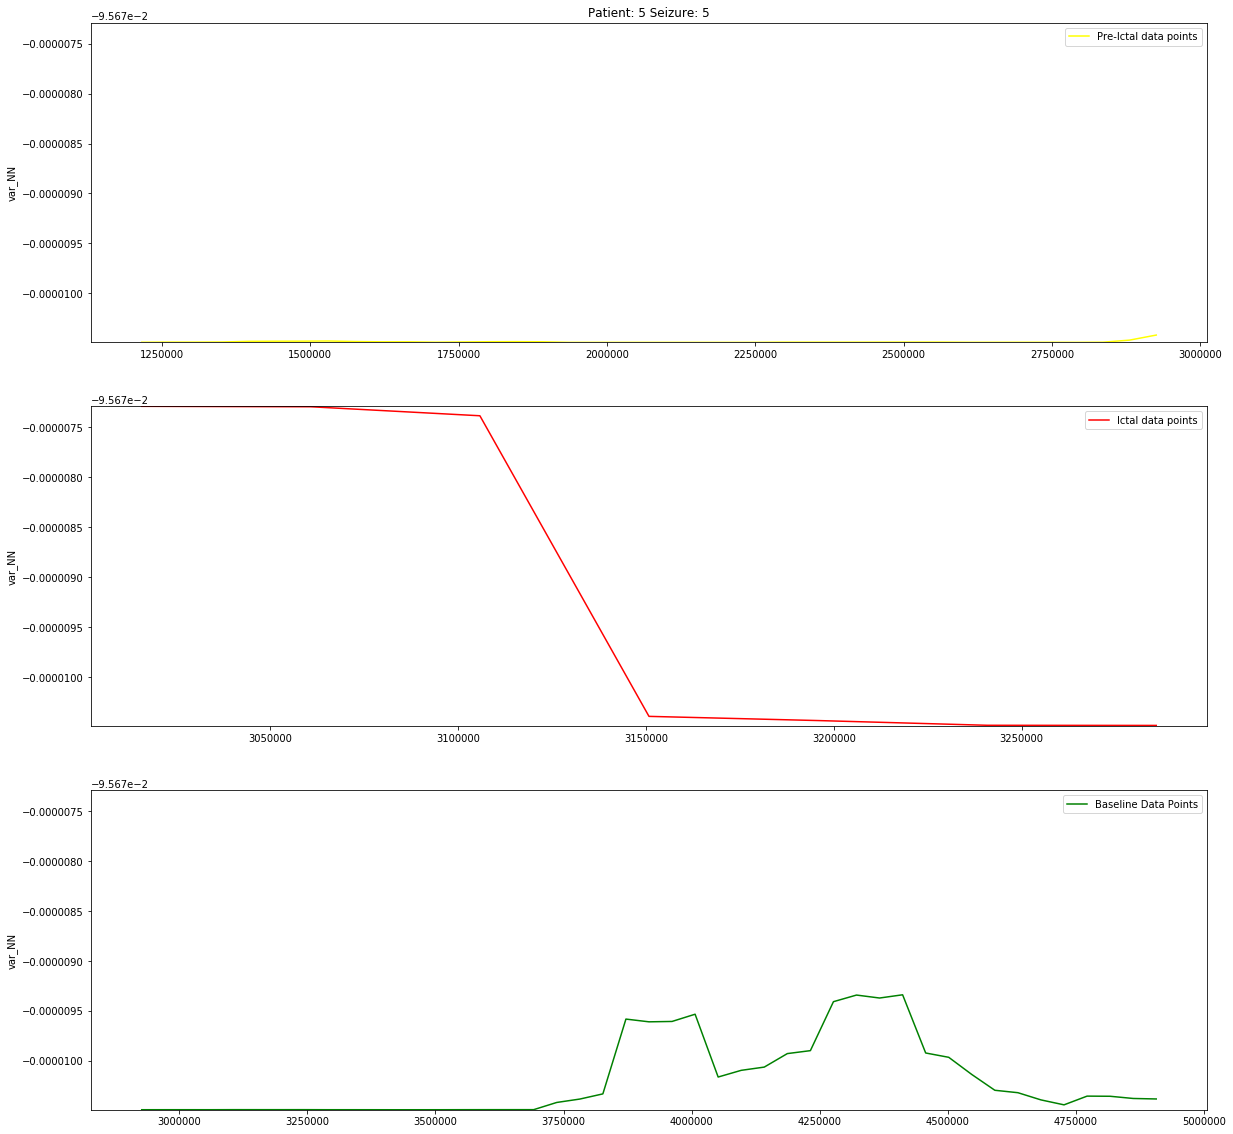

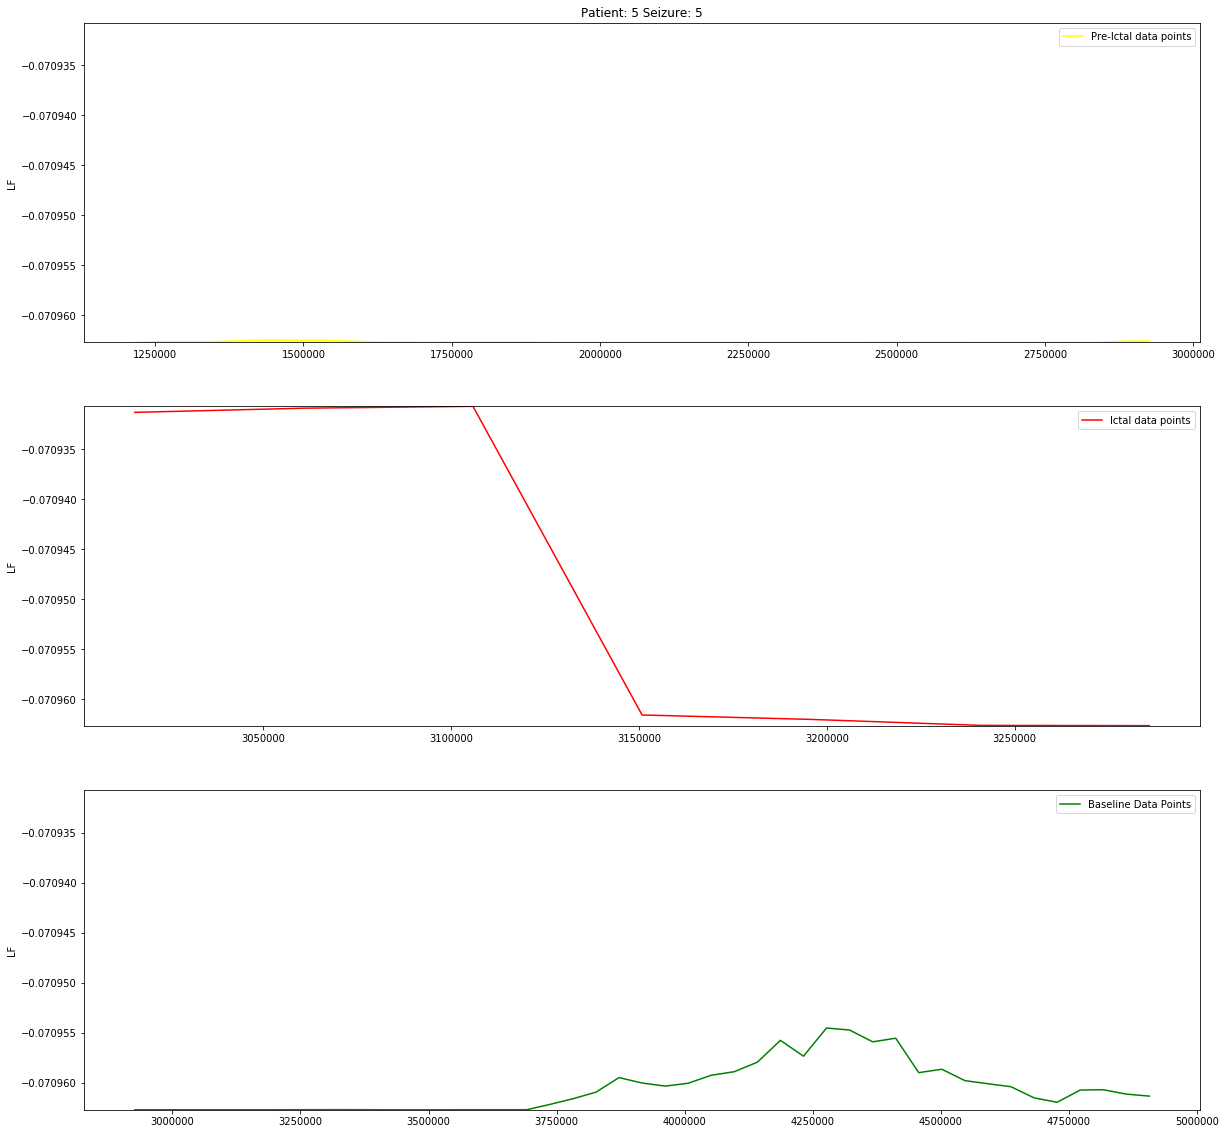

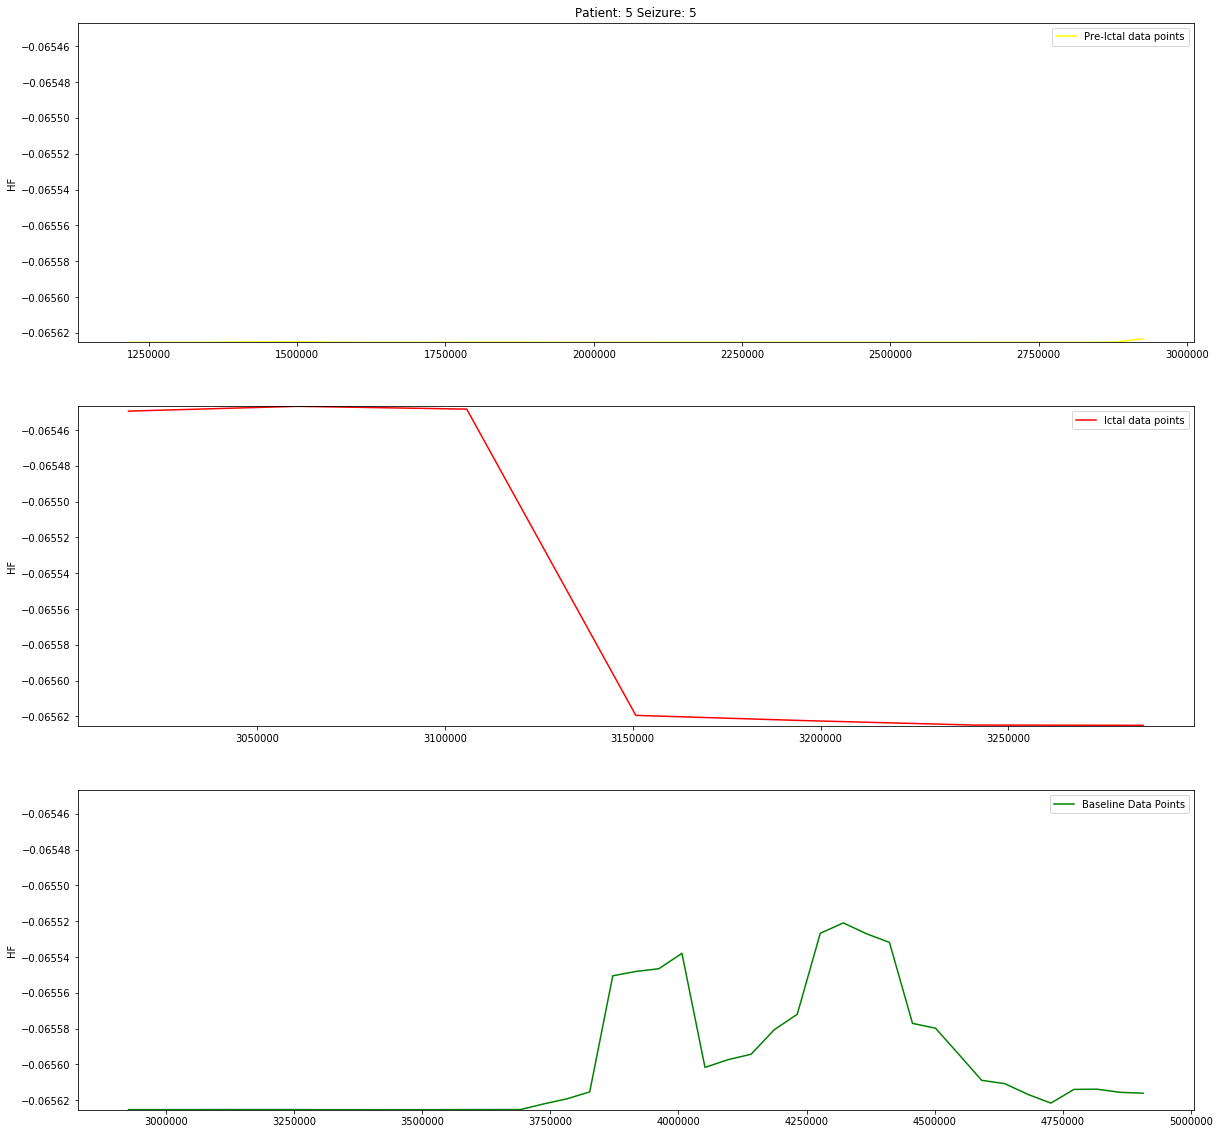

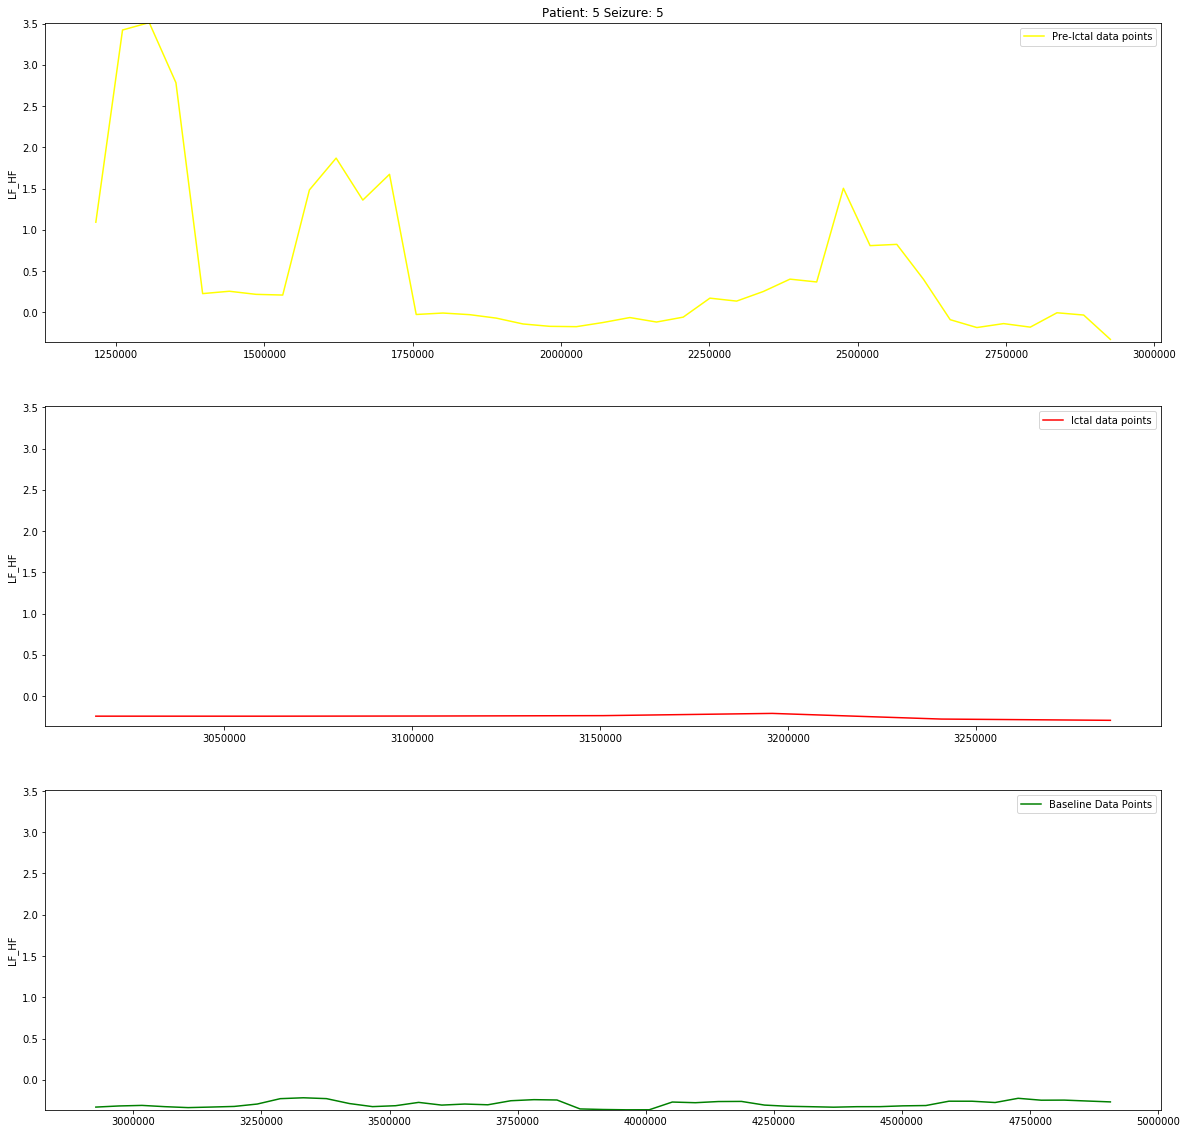

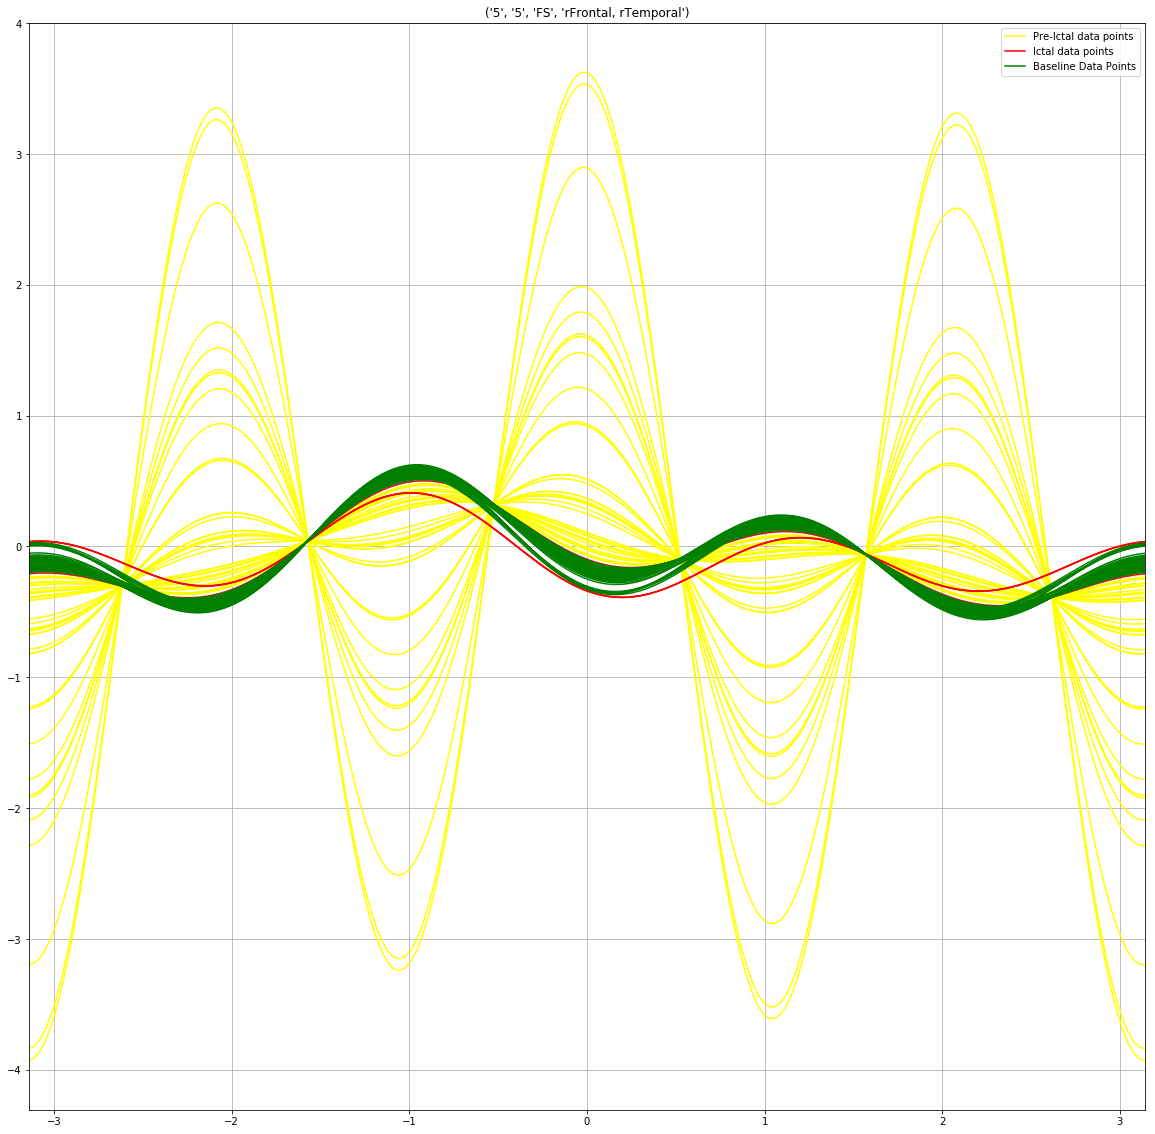

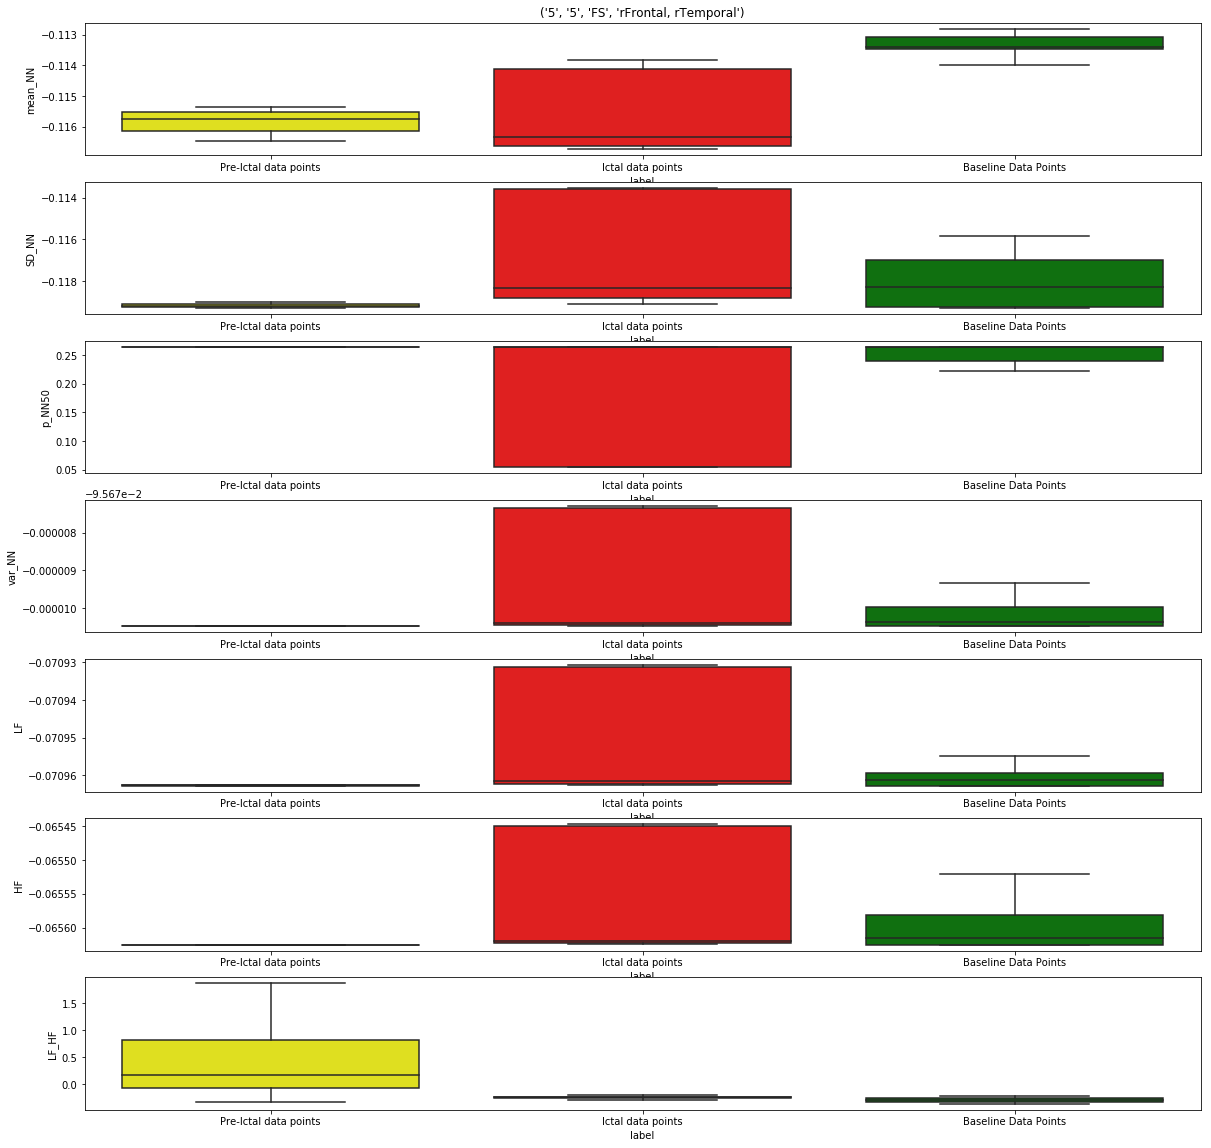

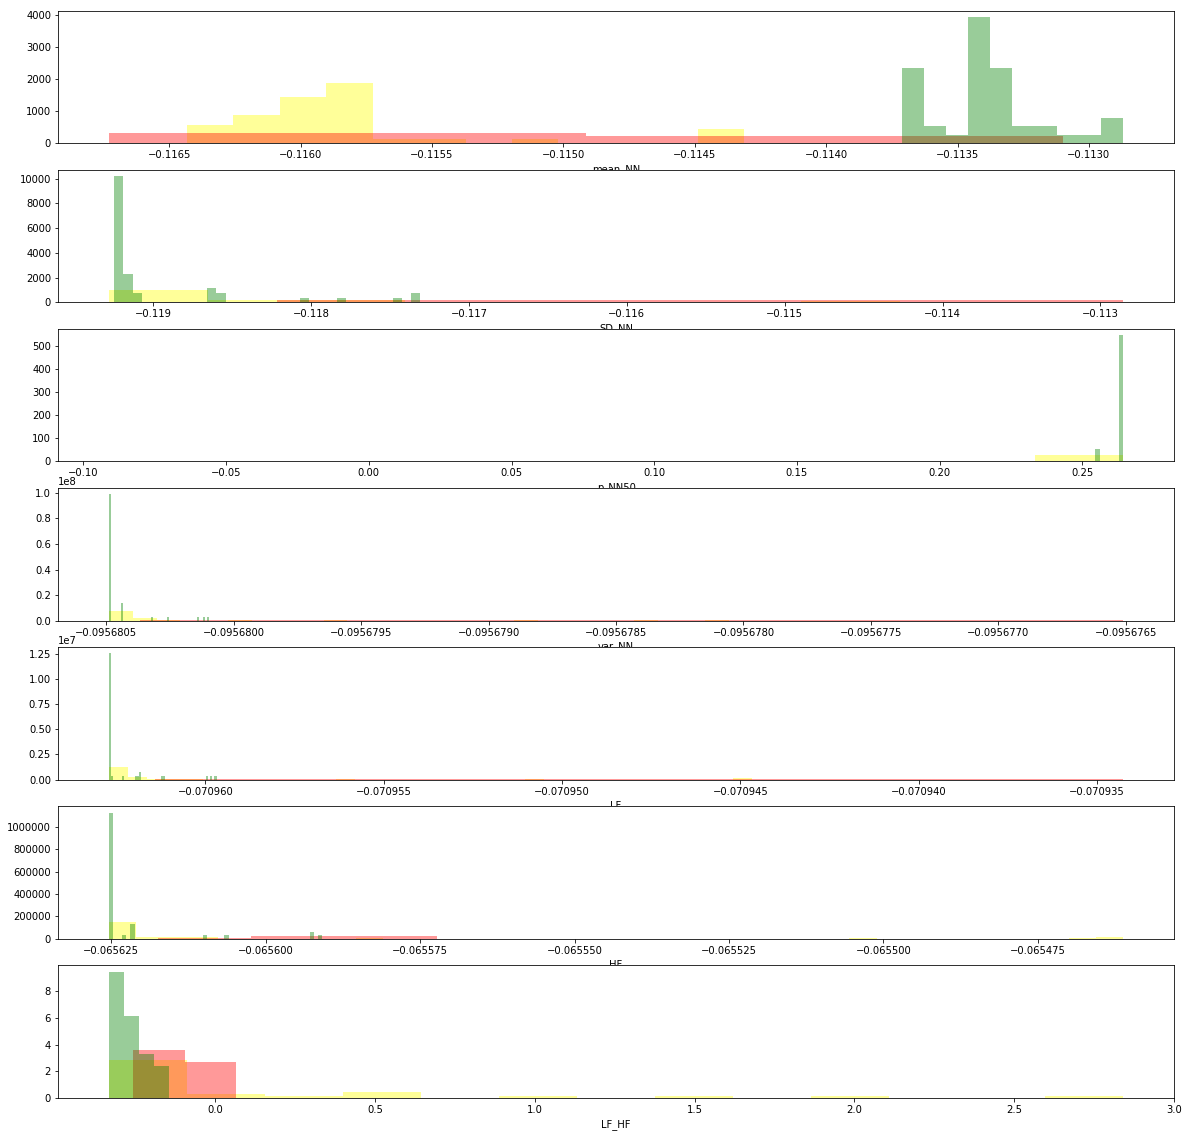

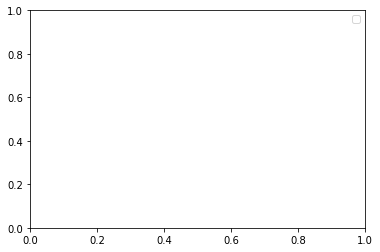

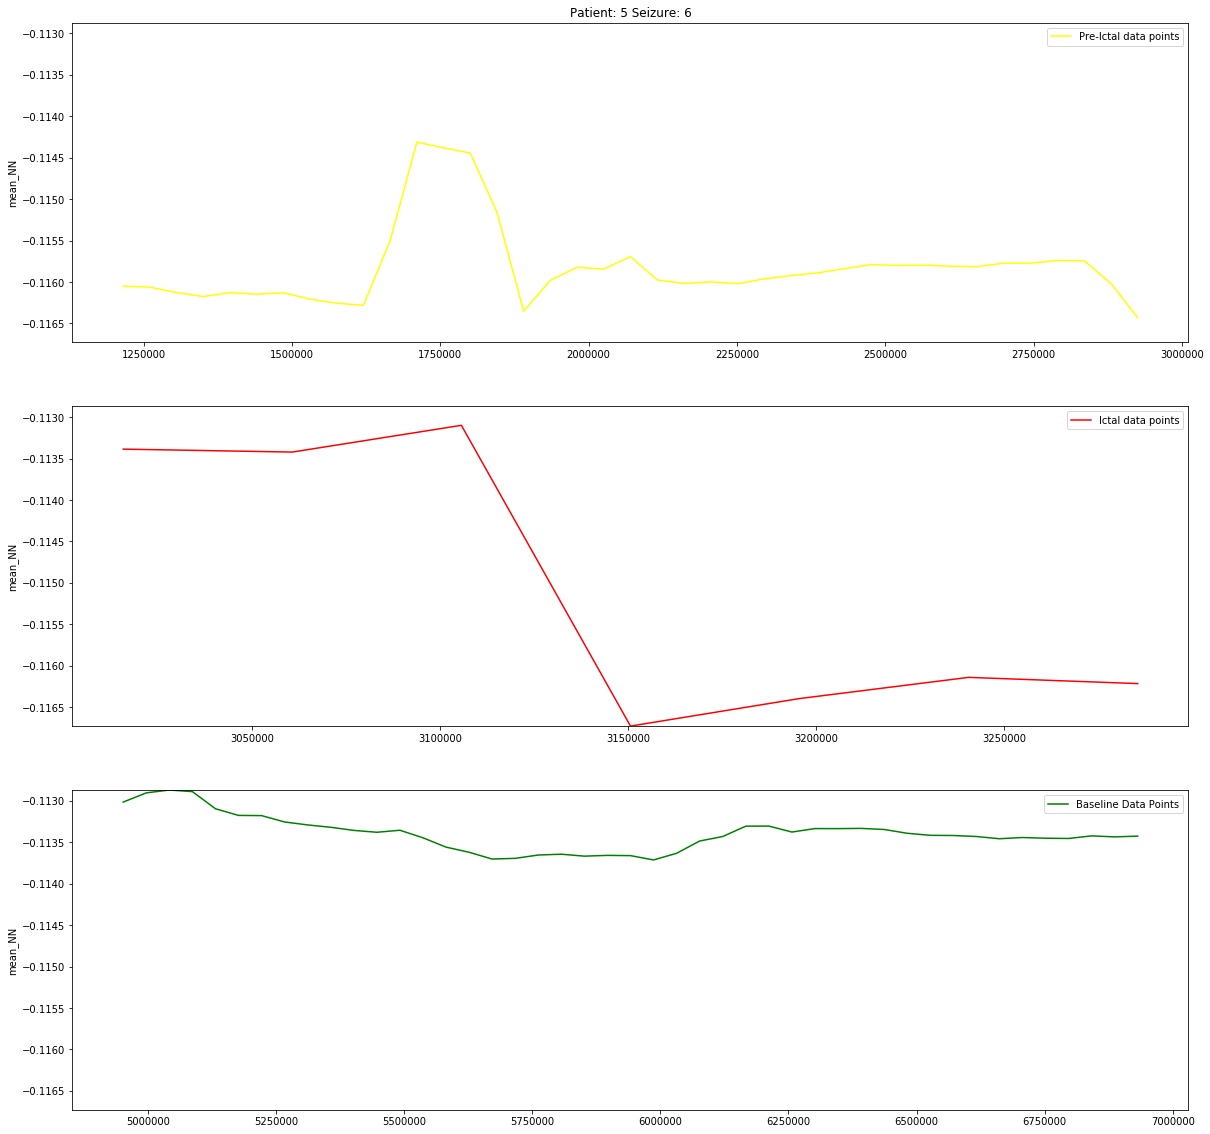

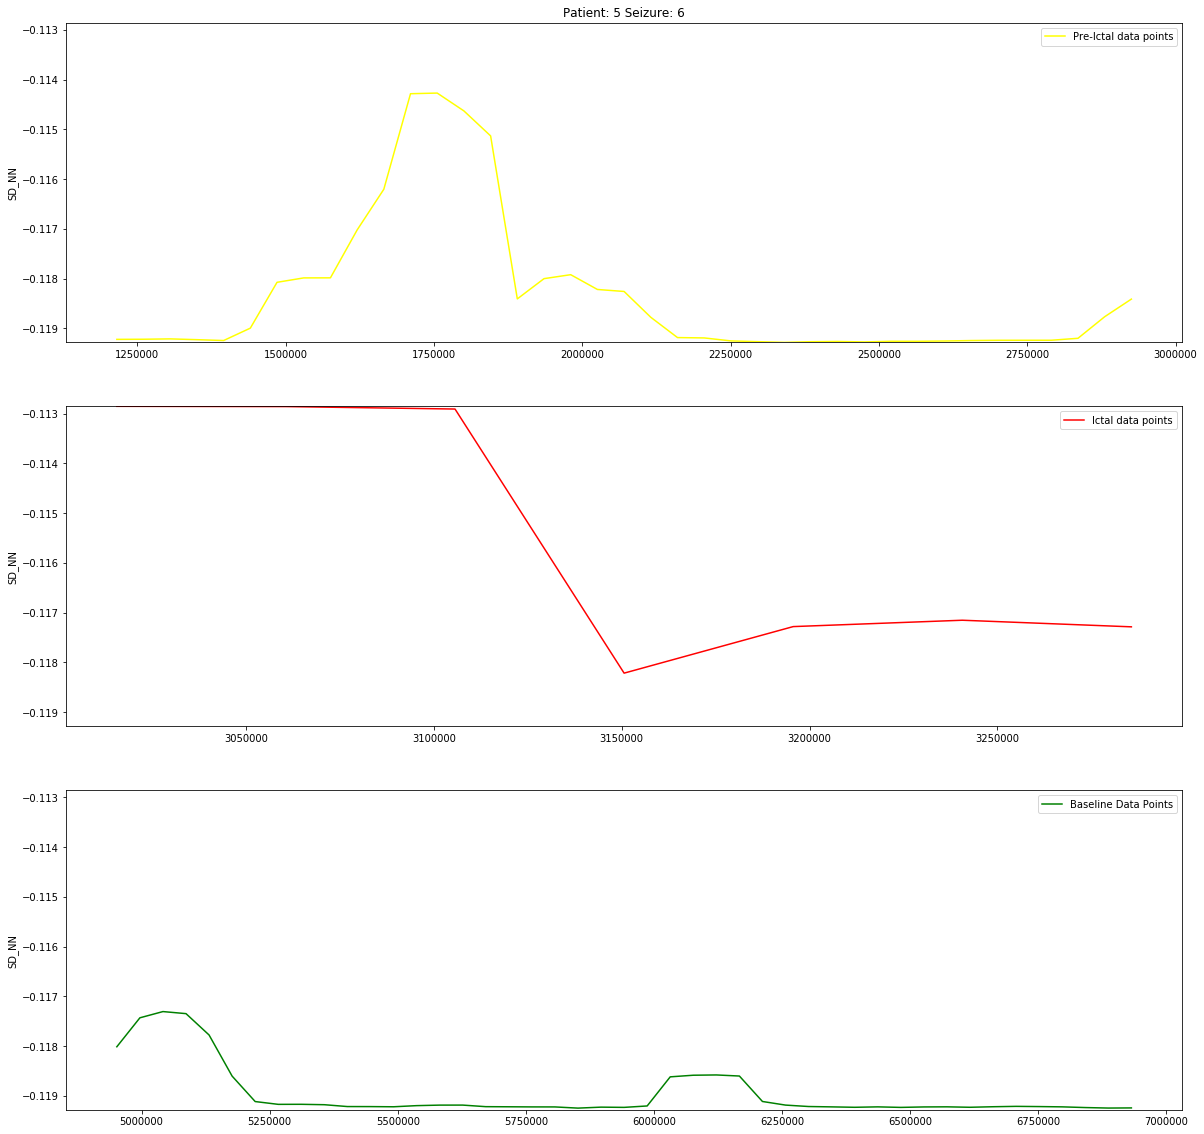

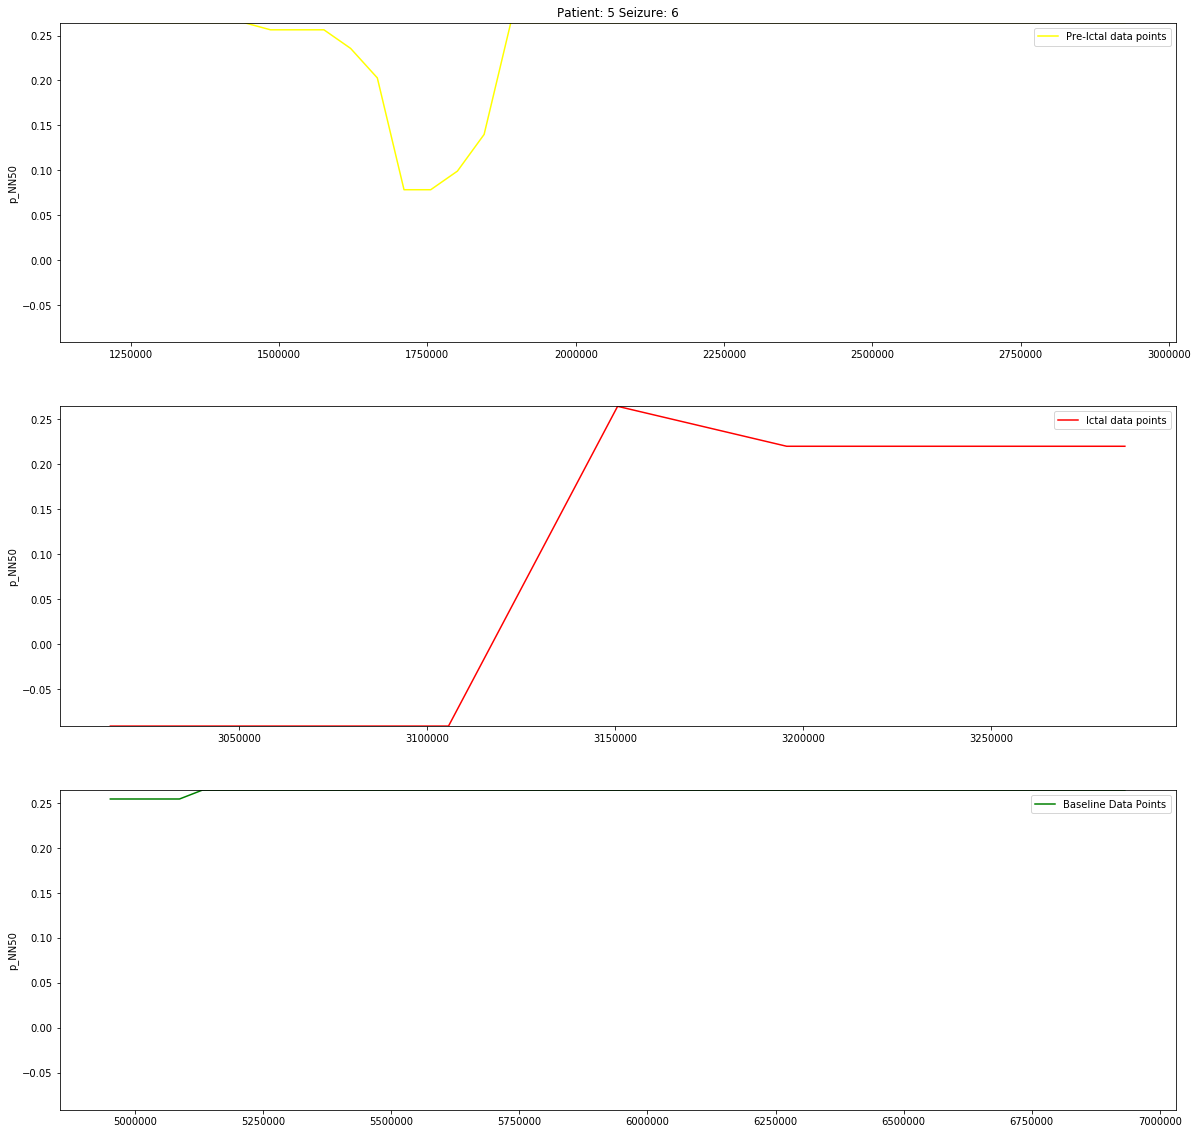

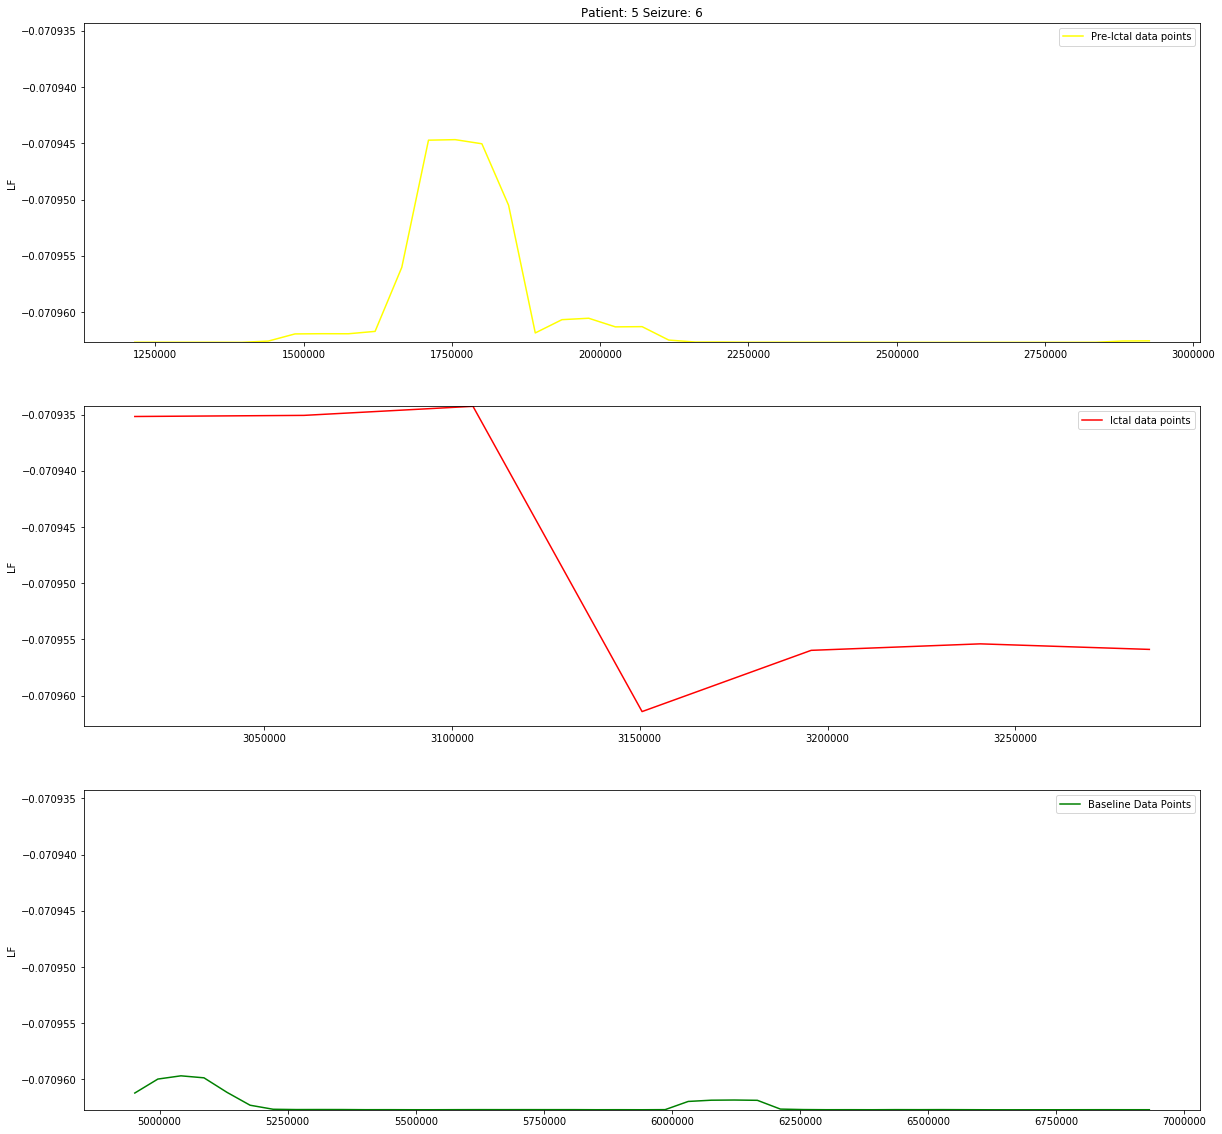

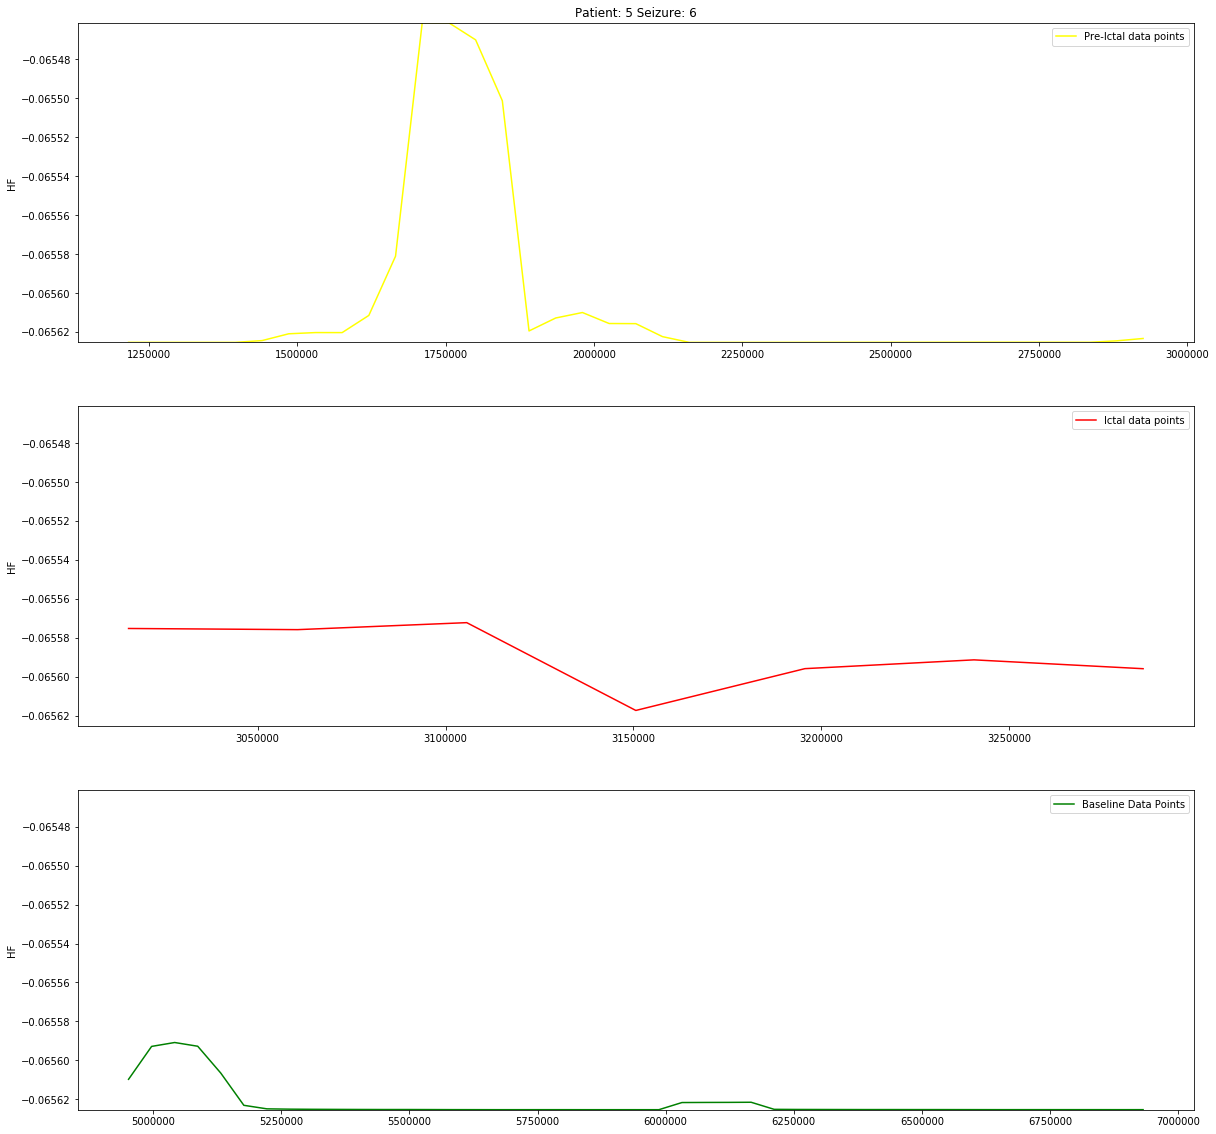

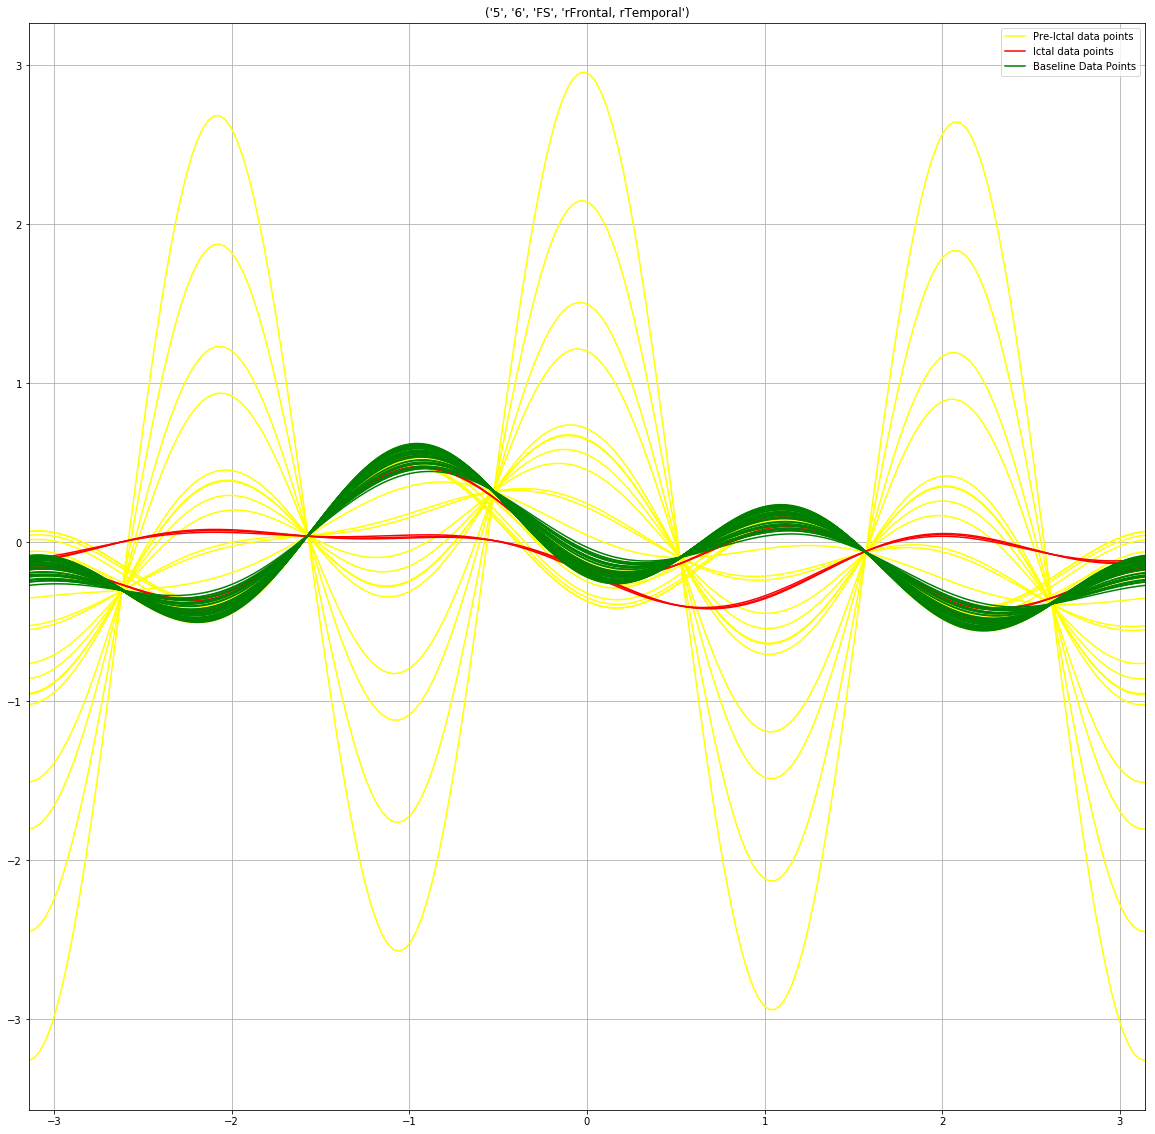

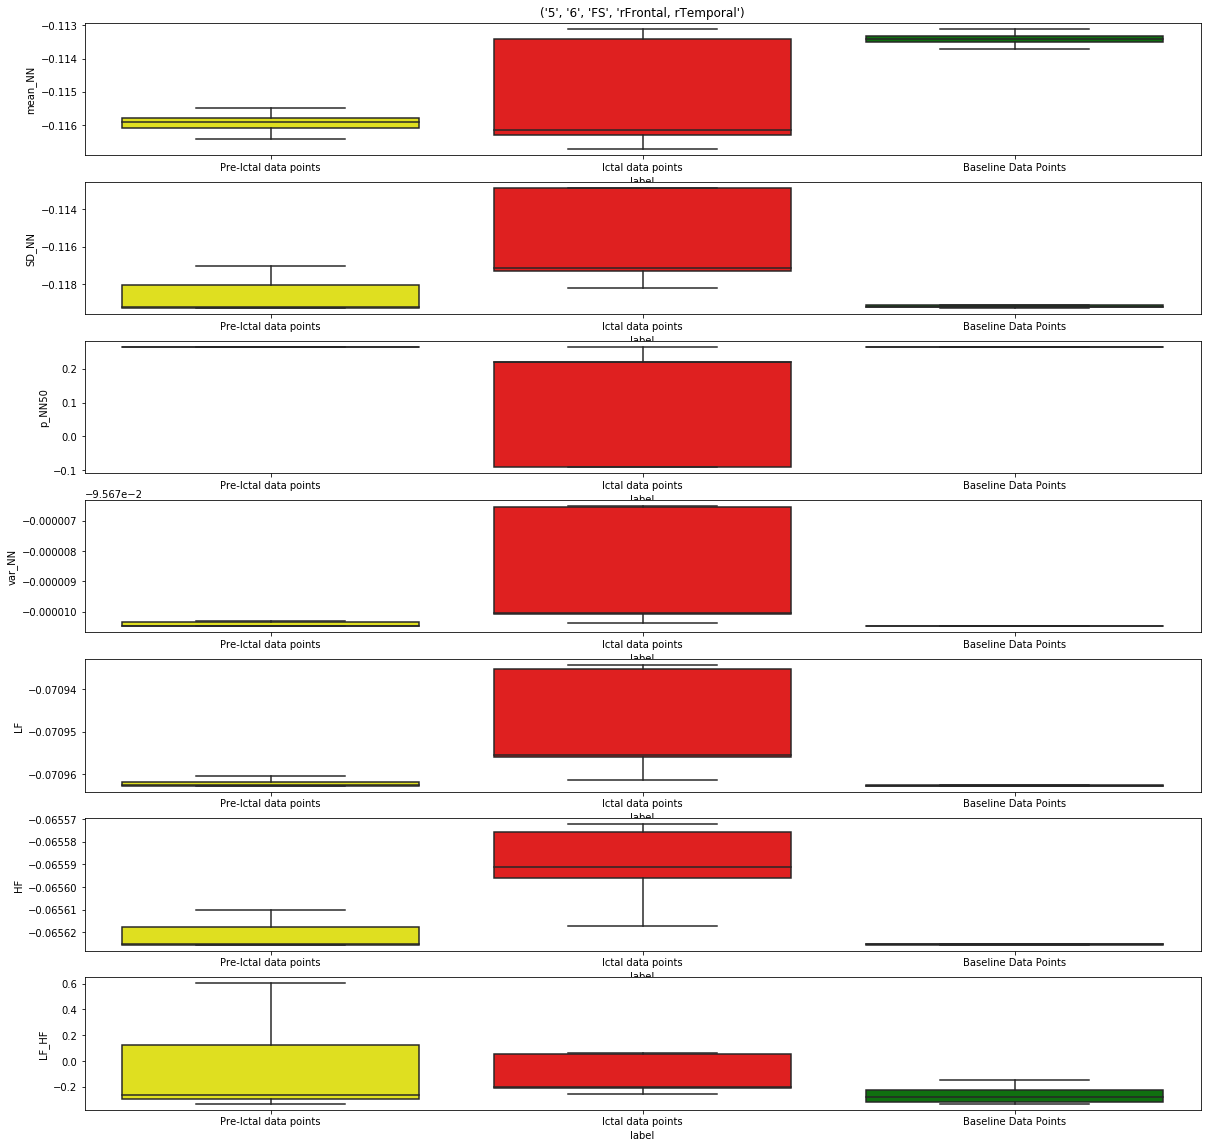

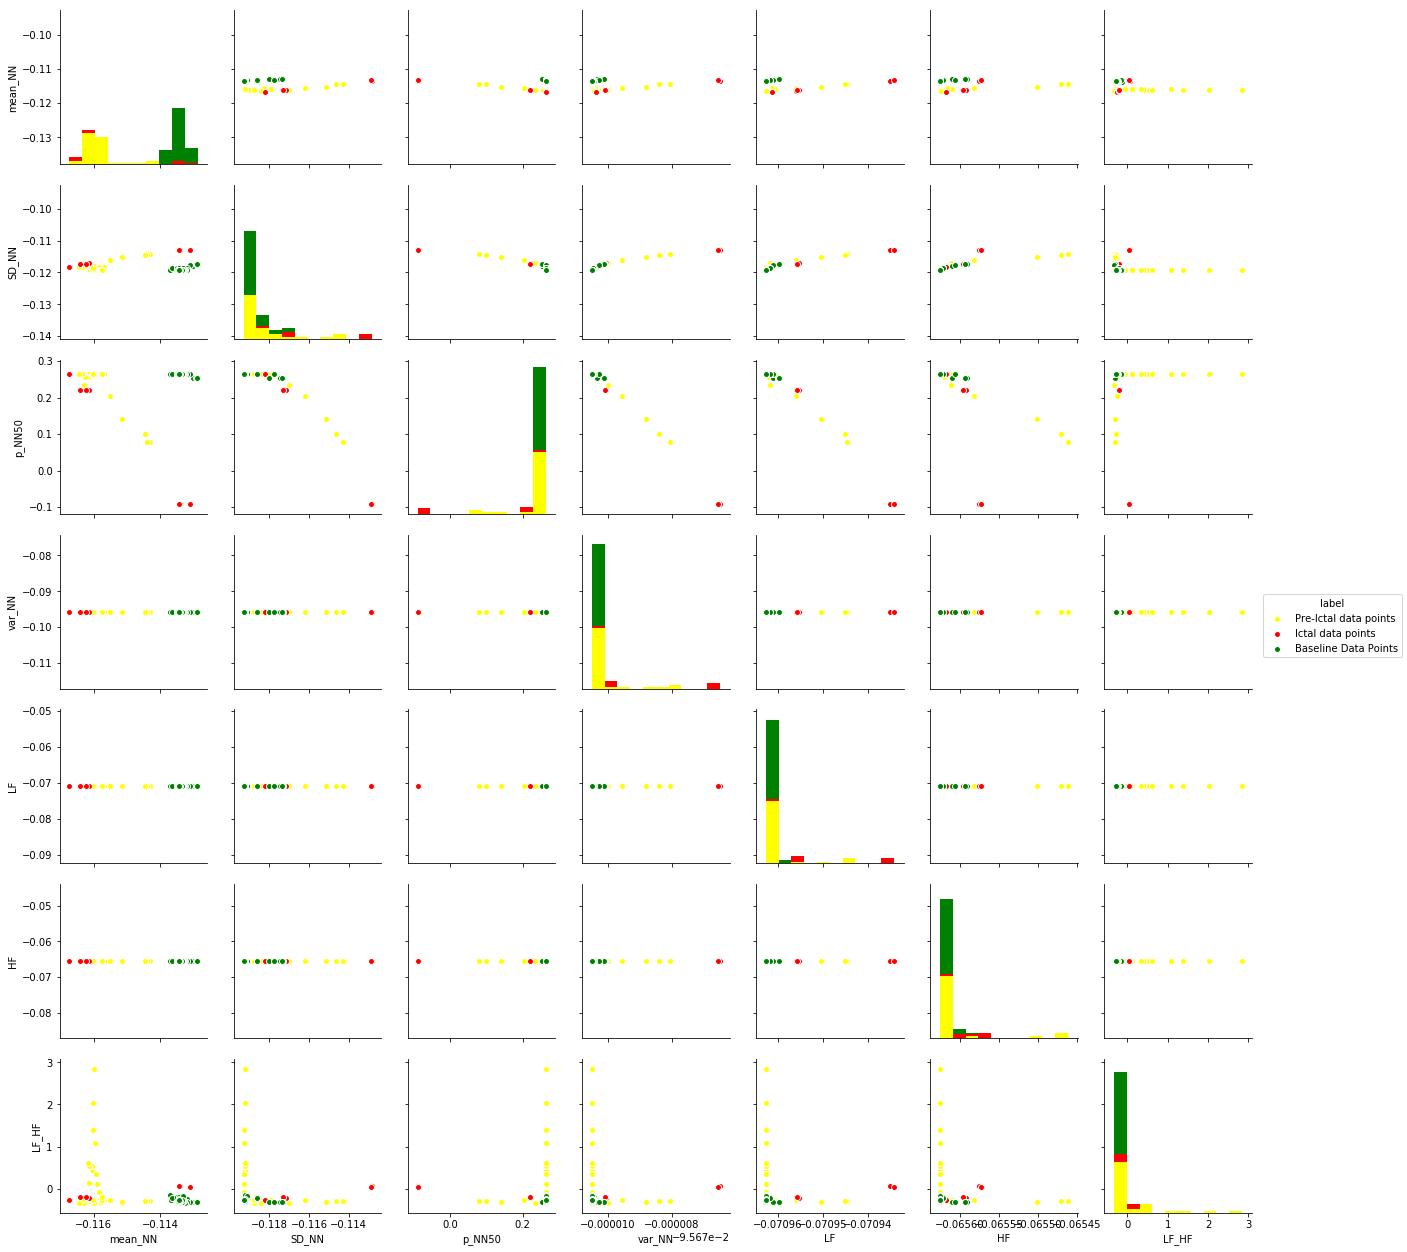

In [ ]:
path_to_save = path


import classification.eda.hist as plt_hist
import classification.eda.andrews as plt_and
import classification.eda.series as plt_ts
import classification.eda.box as plt_box
import classification.eda.scatter as plt_sc
import matplotlib.pyplot as plt




for data_patient_seizure in data_groups_list:

    if flag_hist:
        plt_hist.histogram(path_to_save,
                                data_patient_seizure[1],
                                data_patient_seizure[0],
                                features,
                                'time_sample',
                                'patient_nr',
                                'seizure_nr',
                                'label',
                                'color',
                                 bins=hist_bins,
                                 dist=dist)

    
    if flag_series:
        plt_ts.time_series_plot(path_to_save, data_patient_seizure[1],
                                features,
                                'time_sample',
                                'patient_nr',
                                'seizure_nr',
                                'label',
                                'color')
    if flag_andrews:
        plt_and.andrews_curves(path_to_save,
                                data_patient_seizure[1],
                                data_patient_seizure[0],
                                features,
                                'time_sample',
                                'patient_nr',
                                'seizure_nr',
                                'label',
                                'color')
    if flag_box:
        plt_box.box_plot(path_to_save,
                        data_patient_seizure[1],
                        data_patient_seizure[0],
                        features,
                        'time_sample',
                        'patient_nr',
                        'seizure_nr',
                        'label',
                        'color')
        
    if flag_pair:

        plt_sc.pair_plot(path_to_save,
                        data_patient_seizure[1],
                        data_patient_seizure[0],
                        features,
                        'time_sample',
                        'patient_nr',
                        'seizure_nr',
                        'label',
                        'color')
    

In [ ]:
import classification.cross_validation as cv

# ***********************************Learning****************************
# Learn from data_struct using nested cross_validation
# learninig is an optimization and respective test results
# for each partition of the dataset according to cv_out
learning_results = cv.nested_cross_validation(path_to_save,
                                       X,y, groups,
                                       pipe,
                                       param_grid, scoring,
                                       compute_all_new, cv_out, cv_in,
                                       search_function)
#************************************************************************
groups = data_groups.groups.keys()

for learning_result, group in zip(learning_results, groups):
        learning_result['group'] = group
        
cv_object = learning_results

cv.generate_classification_report(cv_object)



Fitting 6 folds for each of 16 candidates, totalling 96 fits


/home/franciscosargo/.virtualenvs/pre_epi_seizures/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:  9.8min finished


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/3a784126-3daf-11e8-932f-b06ebfc25cc2/hp_opt_results__0.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
    mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0        3.310978         0.020968            0.692308            0.464126   
1        3.229965         0.053217            0.668498            0.497055   
2        3.800122         0.098936            0.652015            0.468439   
3        4.272844         0.158072            0.653846            0.456928   
4        5.368311         0.192238            0.631868            0.407522   
5        5.408807         0.232519            0.633700            0.434109   
6        4.935317         0.277329            0.637363            0.439907   
7        4.894729         0.326312            0.648352            0.464077   
8        5.553624         0.376852            0.609890            0.422663   
9  

classification/cross_validation.py:58: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block2_values] [items->['param_ANN__batch_size', 'param_ANN__epochs', 'param_ANN__hidden_layers_nr', 'param_ANN__hidden_nodes_activation', 'param_ANN__hidden_nodes_per_layer', 'params']]

  for i, (train, test) in enumerate(cv_out)]
[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 15.9min finished


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/3a784126-3daf-11e8-932f-b06ebfc25cc2/hp_opt_results__1.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
    mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0        7.344623         0.888250            0.671506            0.466140   
1        8.360994         1.064838            0.673321            0.477368   
2        7.682126         1.052119            0.682396            0.496597   
3        6.676864         1.018310            0.676951            0.512537   
4        7.469305         1.082903            0.549909            0.318467   
5        6.621629         1.104342            0.678766            0.483061   
6        7.795679         1.174622            0.673321            0.498329   
7        6.975133         1.215811            0.649728            0.501285   
8        7.717537         1.278962            0.533575            0.277580   
9  

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 24.1min finished


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/3a784126-3daf-11e8-932f-b06ebfc25cc2/hp_opt_results__2.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
    mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0       10.294268         1.941516            0.686025            0.460664   
1       10.386780         1.991328            0.644283            0.443751   
2       10.637000         2.074697            0.666062            0.482295   
3       10.785312         2.114796            0.647913            0.440717   
4       11.617598         2.184736            0.595281            0.362822   
5       11.899164         2.245811            0.651543            0.447492   
6       12.055115         2.332032            0.633394            0.422774   
7       12.515894         2.400289            0.635209            0.430075   
8       13.268279         2.475460            0.609800            0.374563   
9  

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed: 34.4min finished


ready to return optimization objects
/mnt/pre_epi_seizures/EDAnalysis/3a784126-3daf-11e8-932f-b06ebfc25cc2/hp_opt_results__3.h5
Trying to save file
..Succes in opening the object

these are the results in a dataframe
    mean_fit_time  mean_score_time  mean_test_accuracy  mean_test_f1_macro  \
0       14.687117         3.256318            0.622505            0.397266   
1       14.797454         3.353939            0.604356            0.408814   
2       14.859832         3.386673            0.607985            0.428199   
3       15.069393         3.446316            0.584392            0.408468   
4       16.140786         3.574209            0.624319            0.399187   
5       16.092019         3.597701            0.602541            0.408125   
6       17.015224         3.788562            0.571688            0.398407   
7       18.371108         3.813845            0.589837            0.426361   
8       17.481841         3.843398            0.526316            0.282328   
9  

In [ ]:
import seaborn as sns
import itertools

if hyper_param_heat:
    for clf, test in learning_results:
        print clf.best_estimator_
        cv_results = clf.cv_results_
        keys = cv_results.keys()

        for grid in param_grid:
            estimator_params = [key 
                                for key in grid.keys()
                                if 'estimator' in key]
            print estimator_params
            param_bi_comb = itertools.combinations(estimator_params, r=2)

            for bi_comb in param_bi_comb:

                for key in keys:

                    if 'param' not in key and 'rank' not in key:
                        metric = cv_results[key]
                        df = metric.reshape(len([2**i for i in xrange(-5, 11)]), len([2**i for i in xrange(-15, 1)]))

                        #df = pd.DataFrame(df, columns=[str(2**i) for i in xrange(-15, 1)])
                        #df['ix'] = [str(2**i) for i in xrange(-5, 11)]
                        #df.set_index('ix')

                        plt.figure()
                        sns.heatmap(df,
                                    xticklabels=[2**i for i in xrange(-5, 11)],
                                    yticklabels=[2**i for i in xrange(-15, 1)],
                                    cbar_kws={'label': key},
                                   )
                        plt.title(key)
                        plt.xlabel(bi_comb[0])
                        plt.ylabel(bi_comb[1])
                        #plt.savefig(path_to_save + '/' + key)
                        plt.show()
                        
hyper_param_list=False                        
if hyper_param_list:
    for learning_result in learning_results:

        cv_results = learning_result['cv_results']
        keys = list(cv_results.keys())
        print keys
        
        for grid in param_grid:
            params = grid.keys()
            print params
            for param in params:
                
                key_param_variation = keys[keys.index('param_' + param)]
                param_variation = cv_results[key_param_variation]
                
                print param_variation
                stop
                
                

        

In [ ]:
from classification.cross_validation import *

In [ ]:
report = generate_classification_report(cv_object)
report.to_hdf(path_to_save + 'classification_resport.h5', '/report' )

pd.read_hdf(path_to_save + 'classification_resport.h5', '/report' )

In [ ]:
string = report.to_latex()
print string.replace('\_', " ")

In [ ]:
import numpy as np
import pandas as pd
arrays = [['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
s = pd.DataFrame(np.random.randn(8, 4), index=arrays)
s


In [ ]:
print s.to_latex()

In [ ]:
del classification_report

In [ ]:
best_params

In [ ]:
learning_results